In [1]:
import os 
import pandas as pd
from model import AfrikaPOS
from utils import load_data

/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = os.path.join('..', 'data_source', 'masakhane-pos', 'data')
LANGS = os.listdir(DATA_DIR)

BASE_MODEL = 'bert-base-uncased'
NUM_HIDDENS = 2
NUM_ATTENTIONS = 12

exec_counter = 0

In [3]:
DATA_DIRS = [os.path.join('..', 'data_source', 'masakhane-pos', 'data', lang) for lang in LANGS]

In [4]:
out_dir = os.path.join("models", "multilang")

model = AfrikaPOS(DATA_DIRS, NUM_HIDDENS, NUM_ATTENTIONS, BASE_MODEL)

n_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
print({'n_params': n_params, 'vocab_size': model.tokenizer.vocab_size})

model.train_model(out_dir, num_train_epochs=10, validate_on_test=False)




huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map: 100%|██████████| 2740/2740 [00:00<00:00, 15091.43 examples/s]


{'n_params': 38026001, 'vocab_size': 30522}


  0%|          | 140/43000 [00:33<1:46:52,  6.68it/s]

In [ ]:
results = {}
model_sizes = {}
for lang in LANGS:
    print("\n\n**********************\nTesting to language:", lang, "\n**********************")
    test_perfs = model.evaluate_on_test()
    results[lang] = test_perfs



**********************
Executing to language: ibo 
**********************



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  2%|▏         | 61/3050 [00:08<06:16,  7.93it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

{'eval_loss': 0.6296808123588562, 'eval_precision': 0.6074191433177142, 'eval_recall': 0.6020751797578957, 'eval_f1': 0.5712910945673706, 'eval_accuracy': 0.6020751797578957, 'eval_runtime': 2.5377, 'eval_samples_per_second': 252.982, 'eval_steps_per_second': 16.156, 'epoch': 1.0}


  4%|▍         | 122/3050 [00:16<06:54,  7.06it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.5404913425445557, 'eval_precision': 0.6945643635063183, 'eval_recall': 0.67306817147538, 'eval_f1': 0.6616625228711309, 'eval_accuracy': 0.67306817147538, 'eval_runtime': 1.1402, 'eval_samples_per_second': 563.045, 'eval_steps_per_second': 35.958, 'epoch': 2.0}


  6%|▌         | 183/3050 [00:24<05:30,  8.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4826309382915497, 'eval_precision': 0.7256349480988755, 'eval_recall': 0.7110676253754437, 'eval_f1': 0.6983590336405103, 'eval_accuracy': 0.7110676253754437, 'eval_runtime': 1.1118, 'eval_samples_per_second': 577.439, 'eval_steps_per_second': 36.877, 'epoch': 3.0}


  8%|▊         | 243/3050 [00:31<04:16, 10.95it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4472857713699341, 'eval_precision': 0.736345494959732, 'eval_recall': 0.7241285155183399, 'eval_f1': 0.7168322616196998, 'eval_accuracy': 0.7241285155183399, 'eval_runtime': 1.1085, 'eval_samples_per_second': 579.187, 'eval_steps_per_second': 36.989, 'epoch': 4.0}


 10%|█         | 305/3050 [00:39<05:47,  7.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4337491989135742, 'eval_precision': 0.7408158634770625, 'eval_recall': 0.7306817147538, 'eval_f1': 0.7280699936746206, 'eval_accuracy': 0.7306817147538, 'eval_runtime': 1.1175, 'eval_samples_per_second': 574.512, 'eval_steps_per_second': 36.69, 'epoch': 5.0}


 12%|█▏        | 366/3050 [00:46<05:07,  8.72it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.416003942489624, 'eval_precision': 0.7619404225272237, 'eval_recall': 0.7502047874761081, 'eval_f1': 0.7439477918845414, 'eval_accuracy': 0.7502047874761081, 'eval_runtime': 1.1804, 'eval_samples_per_second': 543.878, 'eval_steps_per_second': 34.734, 'epoch': 6.0}


 14%|█▍        | 427/3050 [00:53<05:14,  8.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.400470107793808, 'eval_precision': 0.7676692705134589, 'eval_recall': 0.7584417948484573, 'eval_f1': 0.7526245729934459, 'eval_accuracy': 0.7584417948484573, 'eval_runtime': 1.1183, 'eval_samples_per_second': 574.076, 'eval_steps_per_second': 36.662, 'epoch': 7.0}


 16%|█▌        | 488/3050 [01:00<03:35, 11.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4065589904785156, 'eval_precision': 0.7730121227332056, 'eval_recall': 0.7507053790843724, 'eval_f1': 0.7489046938761081, 'eval_accuracy': 0.7507053790843724, 'eval_runtime': 1.1128, 'eval_samples_per_second': 576.913, 'eval_steps_per_second': 36.843, 'epoch': 8.0}


 16%|█▋        | 502/3050 [01:03<05:22,  7.90it/s]

{'loss': 0.4377, 'learning_rate': 1.6721311475409837e-05, 'epoch': 8.2}


 18%|█▊        | 548/3050 [01:07<03:40, 11.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.38102099299430847, 'eval_precision': 0.782944520373602, 'eval_recall': 0.7732320014562665, 'eval_f1': 0.7659024660024483, 'eval_accuracy': 0.7732320014562665, 'eval_runtime': 1.116, 'eval_samples_per_second': 575.273, 'eval_steps_per_second': 36.739, 'epoch': 9.0}


 20%|██        | 610/3050 [01:15<04:49,  8.44it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3901016414165497, 'eval_precision': 0.7784462168915915, 'eval_recall': 0.7493401292436516, 'eval_f1': 0.7517201945304015, 'eval_accuracy': 0.7493401292436516, 'eval_runtime': 1.1181, 'eval_samples_per_second': 574.174, 'eval_steps_per_second': 36.668, 'epoch': 10.0}


 22%|██▏       | 671/3050 [01:22<04:48,  8.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.36411795020103455, 'eval_precision': 0.8046278024573706, 'eval_recall': 0.7865659415673069, 'eval_f1': 0.7811361611592018, 'eval_accuracy': 0.7865659415673069, 'eval_runtime': 1.1127, 'eval_samples_per_second': 576.954, 'eval_steps_per_second': 36.846, 'epoch': 11.0}


 24%|██▍       | 732/3050 [01:29<04:49,  8.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3889041841030121, 'eval_precision': 0.7882700293407751, 'eval_recall': 0.7645399108036771, 'eval_f1': 0.7647912041468312, 'eval_accuracy': 0.7645399108036771, 'eval_runtime': 1.111, 'eval_samples_per_second': 577.849, 'eval_steps_per_second': 36.903, 'epoch': 12.0}


 26%|██▌       | 792/3050 [01:36<03:11, 11.78it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.36951661109924316, 'eval_precision': 0.8027462982349419, 'eval_recall': 0.7930736324747428, 'eval_f1': 0.7852121604827977, 'eval_accuracy': 0.7930736324747428, 'eval_runtime': 1.1112, 'eval_samples_per_second': 577.778, 'eval_steps_per_second': 36.899, 'epoch': 13.0}


 28%|██▊       | 854/3050 [01:43<03:09, 11.57it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3575176000595093, 'eval_precision': 0.8053640409242198, 'eval_recall': 0.8014926731591882, 'eval_f1': 0.7957047751980518, 'eval_accuracy': 0.8014926731591882, 'eval_runtime': 1.1256, 'eval_samples_per_second': 570.36, 'eval_steps_per_second': 36.425, 'epoch': 14.0}


 30%|███       | 915/3050 [01:51<04:30,  7.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.36699870228767395, 'eval_precision': 0.8043890056686049, 'eval_recall': 0.8011741148630199, 'eval_f1': 0.7929076891834453, 'eval_accuracy': 0.8011741148630199, 'eval_runtime': 1.1972, 'eval_samples_per_second': 536.247, 'eval_steps_per_second': 34.246, 'epoch': 15.0}


 32%|███▏      | 975/3050 [01:58<03:12, 10.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3680923283100128, 'eval_precision': 0.8028746780544285, 'eval_recall': 0.7970328570128333, 'eval_f1': 0.7908006172920478, 'eval_accuracy': 0.7970328570128333, 'eval_runtime': 1.13, 'eval_samples_per_second': 568.14, 'eval_steps_per_second': 36.283, 'epoch': 16.0}


 33%|███▎      | 1001/3050 [02:03<03:46,  9.05it/s]

{'loss': 0.2293, 'learning_rate': 1.3442622950819673e-05, 'epoch': 16.39}


 34%|███▍      | 1037/3050 [02:06<02:53, 11.61it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3622485101222992, 'eval_precision': 0.8033819239217113, 'eval_recall': 0.8023118230636206, 'eval_f1': 0.796638177897854, 'eval_accuracy': 0.8023118230636206, 'eval_runtime': 1.1091, 'eval_samples_per_second': 578.847, 'eval_steps_per_second': 36.967, 'epoch': 17.0}


 36%|███▌      | 1097/3050 [02:13<02:53, 11.26it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.36143213510513306, 'eval_precision': 0.8048426847027634, 'eval_recall': 0.799672340038227, 'eval_f1': 0.7961337813584448, 'eval_accuracy': 0.799672340038227, 'eval_runtime': 1.1223, 'eval_samples_per_second': 572.05, 'eval_steps_per_second': 36.533, 'epoch': 18.0}


 38%|███▊      | 1159/3050 [02:20<04:06,  7.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.35809341073036194, 'eval_precision': 0.8086927987652637, 'eval_recall': 0.8094566305633931, 'eval_f1': 0.8024981724834722, 'eval_accuracy': 0.8094566305633931, 'eval_runtime': 1.1144, 'eval_samples_per_second': 576.109, 'eval_steps_per_second': 36.792, 'epoch': 19.0}


 40%|████      | 1220/3050 [02:27<02:44, 11.13it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3628506362438202, 'eval_precision': 0.8069224776651887, 'eval_recall': 0.801265131519068, 'eval_f1': 0.7975821672743623, 'eval_accuracy': 0.801265131519068, 'eval_runtime': 1.1352, 'eval_samples_per_second': 565.563, 'eval_steps_per_second': 36.119, 'epoch': 20.0}


 42%|████▏     | 1280/3050 [02:34<02:32, 11.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.36431798338890076, 'eval_precision': 0.8091023871370508, 'eval_recall': 0.8047692727769181, 'eval_f1': 0.7995754051261676, 'eval_accuracy': 0.8047692727769181, 'eval_runtime': 1.1124, 'eval_samples_per_second': 577.108, 'eval_steps_per_second': 36.856, 'epoch': 21.0}


 44%|████▍     | 1342/3050 [02:42<02:25, 11.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.367702454328537, 'eval_precision': 0.807491763500746, 'eval_recall': 0.8025848730317648, 'eval_f1': 0.7992589498958403, 'eval_accuracy': 0.8025848730317648, 'eval_runtime': 1.1178, 'eval_samples_per_second': 574.318, 'eval_steps_per_second': 36.678, 'epoch': 22.0}


 46%|████▌     | 1402/3050 [02:48<02:25, 11.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.36762771010398865, 'eval_precision': 0.812070567569059, 'eval_recall': 0.8071812141621917, 'eval_f1': 0.8008921644262387, 'eval_accuracy': 0.8071812141621917, 'eval_runtime': 1.1212, 'eval_samples_per_second': 572.625, 'eval_steps_per_second': 36.57, 'epoch': 23.0}


 48%|████▊     | 1464/3050 [02:56<03:17,  8.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.37516263127326965, 'eval_precision': 0.8057526910517069, 'eval_recall': 0.7990352234458906, 'eval_f1': 0.7967639840653551, 'eval_accuracy': 0.7990352234458906, 'eval_runtime': 1.1427, 'eval_samples_per_second': 561.846, 'eval_steps_per_second': 35.881, 'epoch': 24.0}


 49%|████▉     | 1501/3050 [03:01<02:19, 11.07it/s]

{'loss': 0.1841, 'learning_rate': 1.0163934426229509e-05, 'epoch': 24.59}


 50%|█████     | 1525/3050 [03:03<03:20,  7.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3705979585647583, 'eval_precision': 0.8102808810086755, 'eval_recall': 0.8040866478565577, 'eval_f1': 0.8013588506962307, 'eval_accuracy': 0.8040866478565577, 'eval_runtime': 1.1058, 'eval_samples_per_second': 580.579, 'eval_steps_per_second': 37.077, 'epoch': 25.0}


 52%|█████▏    | 1586/3050 [15:23<4:09:41, 10.23s/it]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

{'eval_loss': 0.37526872754096985, 'eval_precision': 0.8144164168589534, 'eval_recall': 0.8086829889869847, 'eval_f1': 0.8040127210685737, 'eval_accuracy': 0.8086829889869847, 'eval_runtime': 1.1872, 'eval_samples_per_second': 540.788, 'eval_steps_per_second': 34.536, 'epoch': 26.0}


 54%|█████▍    | 1647/3050 [15:31<03:00,  7.79it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

{'eval_loss': 0.3732336759567261, 'eval_precision': 0.814424312363533, 'eval_recall': 0.8106398470920179, 'eval_f1': 0.806238456060272, 'eval_accuracy': 0.8106398470920179, 'eval_runtime': 1.1568, 'eval_samples_per_second': 554.958, 'eval_steps_per_second': 35.441, 'epoch': 27.0}


 56%|█████▌    | 1707/3050 [15:38<02:07, 10.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3764400780200958, 'eval_precision': 0.8118257259653641, 'eval_recall': 0.807590789114408, 'eval_f1': 0.8030621958862648, 'eval_accuracy': 0.807590789114408, 'eval_runtime': 1.1726, 'eval_samples_per_second': 547.505, 'eval_steps_per_second': 34.965, 'epoch': 28.0}


 58%|█████▊    | 1768/3050 [15:45<01:57, 10.92it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.37227708101272583, 'eval_precision': 0.8117063011314699, 'eval_recall': 0.807590789114408, 'eval_f1': 0.8046321273319789, 'eval_accuracy': 0.807590789114408, 'eval_runtime': 1.1673, 'eval_samples_per_second': 549.995, 'eval_steps_per_second': 35.124, 'epoch': 29.0}


 60%|██████    | 1830/3050 [15:53<02:39,  7.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.38117715716362, 'eval_precision': 0.8133463585791871, 'eval_recall': 0.8087284973150086, 'eval_f1': 0.8052529959674358, 'eval_accuracy': 0.8087284973150086, 'eval_runtime': 1.1423, 'eval_samples_per_second': 562.002, 'eval_steps_per_second': 35.891, 'epoch': 30.0}


 62%|██████▏   | 1890/3050 [16:00<01:48, 10.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3821924030780792, 'eval_precision': 0.8119146031186504, 'eval_recall': 0.806089014289615, 'eval_f1': 0.8030984777665962, 'eval_accuracy': 0.806089014289615, 'eval_runtime': 1.2053, 'eval_samples_per_second': 532.645, 'eval_steps_per_second': 34.016, 'epoch': 31.0}


 64%|██████▍   | 1951/3050 [16:08<01:38, 11.15it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.39202067255973816, 'eval_precision': 0.8117052112428299, 'eval_recall': 0.8054063893692546, 'eval_f1': 0.8023154074971465, 'eval_accuracy': 0.8054063893692546, 'eval_runtime': 1.184, 'eval_samples_per_second': 542.238, 'eval_steps_per_second': 34.629, 'epoch': 32.0}


 66%|██████▌   | 2001/3050 [16:14<01:36, 10.90it/s]

{'loss': 0.1546, 'learning_rate': 6.885245901639345e-06, 'epoch': 32.79}


 66%|██████▌   | 2013/3050 [16:15<01:31, 11.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3833502531051636, 'eval_precision': 0.8133478499048354, 'eval_recall': 0.8077728224265041, 'eval_f1': 0.8051553730909774, 'eval_accuracy': 0.8077728224265041, 'eval_runtime': 1.1489, 'eval_samples_per_second': 558.789, 'eval_steps_per_second': 35.686, 'epoch': 33.0}


 68%|██████▊   | 2073/3050 [16:22<01:28, 11.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3958297669887543, 'eval_precision': 0.8114148744895793, 'eval_recall': 0.8029944479839811, 'eval_f1': 0.8016118507898202, 'eval_accuracy': 0.8029944479839811, 'eval_runtime': 1.1599, 'eval_samples_per_second': 553.51, 'eval_steps_per_second': 35.349, 'epoch': 34.0}


 70%|███████   | 2135/3050 [16:30<01:51,  8.17it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3839571475982666, 'eval_precision': 0.8151472153457325, 'eval_recall': 0.8121416219168108, 'eval_f1': 0.8084059422514521, 'eval_accuracy': 0.8121416219168108, 'eval_runtime': 1.1402, 'eval_samples_per_second': 563.042, 'eval_steps_per_second': 35.958, 'epoch': 35.0}


 72%|███████▏  | 2196/3050 [16:37<01:14, 11.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3966209888458252, 'eval_precision': 0.8124473400701762, 'eval_recall': 0.8062710476017111, 'eval_f1': 0.8034356785432631, 'eval_accuracy': 0.8062710476017111, 'eval_runtime': 1.2254, 'eval_samples_per_second': 523.903, 'eval_steps_per_second': 33.458, 'epoch': 36.0}


 74%|███████▍  | 2257/3050 [16:45<01:38,  8.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.398286372423172, 'eval_precision': 0.8130394608158952, 'eval_recall': 0.804359697824702, 'eval_f1': 0.8025916954285509, 'eval_accuracy': 0.804359697824702, 'eval_runtime': 1.1639, 'eval_samples_per_second': 551.58, 'eval_steps_per_second': 35.226, 'epoch': 37.0}


 76%|███████▌  | 2318/3050 [16:52<01:02, 11.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3901347517967224, 'eval_precision': 0.8143898169014626, 'eval_recall': 0.8102302721398016, 'eval_f1': 0.8071223751536493, 'eval_accuracy': 0.8102302721398016, 'eval_runtime': 1.1496, 'eval_samples_per_second': 558.445, 'eval_steps_per_second': 35.664, 'epoch': 38.0}


 78%|███████▊  | 2378/3050 [16:59<01:02, 10.68it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.4003331959247589, 'eval_precision': 0.8135117853918563, 'eval_recall': 0.8056339310093747, 'eval_f1': 0.8039181924398027, 'eval_accuracy': 0.8056339310093747, 'eval_runtime': 1.1754, 'eval_samples_per_second': 546.215, 'eval_steps_per_second': 34.883, 'epoch': 39.0}


 80%|████████  | 2440/3050 [17:07<01:34,  6.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3948698341846466, 'eval_precision': 0.8150681588263453, 'eval_recall': 0.8094566305633931, 'eval_f1': 0.8064070680337903, 'eval_accuracy': 0.8094566305633931, 'eval_runtime': 1.2184, 'eval_samples_per_second': 526.909, 'eval_steps_per_second': 33.65, 'epoch': 40.0}


 82%|████████▏ | 2500/3050 [17:14<00:50, 10.95it/s]

{'loss': 0.1332, 'learning_rate': 3.6065573770491806e-06, 'epoch': 40.98}


/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

{'eval_loss': 0.395184725522995, 'eval_precision': 0.8131206598111865, 'eval_recall': 0.8056339310093747, 'eval_f1': 0.8043569311136292, 'eval_accuracy': 0.8056339310093747, 'eval_runtime': 1.1556, 'eval_samples_per_second': 555.545, 'eval_steps_per_second': 35.479, 'epoch': 41.0}


 84%|████████▍ | 2561/3050 [17:21<00:44, 11.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.39952975511550903, 'eval_precision': 0.8136037419564127, 'eval_recall': 0.8064985892418313, 'eval_f1': 0.8043916820217236, 'eval_accuracy': 0.8064985892418313, 'eval_runtime': 1.153, 'eval_samples_per_second': 556.788, 'eval_steps_per_second': 35.558, 'epoch': 42.0}


 86%|████████▌ | 2623/3050 [17:29<00:36, 11.81it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.39935436844825745, 'eval_precision': 0.8136582877591358, 'eval_recall': 0.8070901975061436, 'eval_f1': 0.805127260018527, 'eval_accuracy': 0.8070901975061436, 'eval_runtime': 1.1487, 'eval_samples_per_second': 558.892, 'eval_steps_per_second': 35.692, 'epoch': 43.0}


 88%|████████▊ | 2683/3050 [17:36<00:33, 10.81it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.40224453806877136, 'eval_precision': 0.8155920295689733, 'eval_recall': 0.8083189223627923, 'eval_f1': 0.8063073584582993, 'eval_accuracy': 0.8083189223627923, 'eval_runtime': 1.1639, 'eval_samples_per_second': 551.608, 'eval_steps_per_second': 35.227, 'epoch': 44.0}


 90%|████████▉ | 2744/3050 [17:43<00:28, 10.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.40298333764076233, 'eval_precision': 0.8141177004283406, 'eval_recall': 0.8065896058978793, 'eval_f1': 0.8048657698772969, 'eval_accuracy': 0.8065896058978793, 'eval_runtime': 1.1633, 'eval_samples_per_second': 551.871, 'eval_steps_per_second': 35.244, 'epoch': 45.0}


 92%|█████████▏| 2806/3050 [17:50<00:21, 11.57it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.4020695090293884, 'eval_precision': 0.8152154554855755, 'eval_recall': 0.807681805770456, 'eval_f1': 0.8059122675215055, 'eval_accuracy': 0.807681805770456, 'eval_runtime': 1.1538, 'eval_samples_per_second': 556.43, 'eval_steps_per_second': 35.535, 'epoch': 46.0}


 94%|█████████▍| 2866/3050 [17:57<00:16, 10.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.3956623077392578, 'eval_precision': 0.8166140391090917, 'eval_recall': 0.8111404387002822, 'eval_f1': 0.8086956168907068, 'eval_accuracy': 0.8111404387002822, 'eval_runtime': 1.2047, 'eval_samples_per_second': 532.893, 'eval_steps_per_second': 34.032, 'epoch': 47.0}


 96%|█████████▌| 2927/3050 [18:05<00:11, 11.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.40224358439445496, 'eval_precision': 0.8143889758432576, 'eval_recall': 0.8074542641303358, 'eval_f1': 0.8055648285363571, 'eval_accuracy': 0.8074542641303358, 'eval_runtime': 1.1737, 'eval_samples_per_second': 547.005, 'eval_steps_per_second': 34.933, 'epoch': 48.0}


 98%|█████████▊| 2989/3050 [18:12<00:05, 11.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.4020240306854248, 'eval_precision': 0.8145168692403649, 'eval_recall': 0.807818330754528, 'eval_f1': 0.805798375363808, 'eval_accuracy': 0.807818330754528, 'eval_runtime': 1.1446, 'eval_samples_per_second': 560.894, 'eval_steps_per_second': 35.82, 'epoch': 49.0}


 98%|█████████▊| 3001/3050 [18:15<00:06,  7.72it/s]

{'loss': 0.1233, 'learning_rate': 3.278688524590164e-07, 'epoch': 49.18}


100%|█████████▉| 3049/3050 [18:19<00:00, 11.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

{'eval_loss': 0.40282365679740906, 'eval_precision': 0.8143976220394942, 'eval_recall': 0.8074542641303358, 'eval_f1': 0.805534921826497, 'eval_accuracy': 0.8074542641303358, 'eval_runtime': 1.1528, 'eval_samples_per_second': 556.913, 'eval_steps_per_second': 35.566, 'epoch': 50.0}


100%|██████████| 3050/3050 [18:21<00:00,  2.77it/s]


{'train_runtime': 1101.9599, 'train_samples_per_second': 43.695, 'train_steps_per_second': 2.768, 'train_loss': 0.20884938630901398, 'epoch': 50.0}


 88%|████████▊ | 36/41 [00:00<00:00, 44.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: sna 
**********************





  2%|▏         | 56/2800 [00:06<04:15, 10.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

{'eval_loss': 0.6851401329040527, 'eval_precision': 0.4637433725774735, 'eval_recall': 0.4824606654629868, 'eval_f1': 0.418346667226643, 'eval_accuracy': 0.4824606654629868, 'eval_runtime': 3.2362, 'eval_samples_per_second': 184.167, 'eval_steps_per_second': 11.742, 'epoch': 1.0}


  4%|▍         | 112/2800 [00:15<03:59, 11.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.5572400093078613, 'eval_precision': 0.660948685738846, 'eval_recall': 0.5922104720144442, 'eval_f1': 0.55733484488725, 'eval_accuracy': 0.5922104720144442, 'eval_runtime': 0.9824, 'eval_samples_per_second': 606.7, 'eval_steps_per_second': 38.682, 'epoch': 2.0}


  6%|▌         | 168/2800 [00:21<03:44, 11.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4833548069000244, 'eval_precision': 0.6812137026060964, 'eval_recall': 0.6463115811194222, 'eval_f1': 0.6163731703812683, 'eval_accuracy': 0.6463115811194222, 'eval_runtime': 0.9858, 'eval_samples_per_second': 604.585, 'eval_steps_per_second': 38.547, 'epoch': 3.0}


  8%|▊         | 224/2800 [00:28<03:45, 11.43it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.43370547890663147, 'eval_precision': 0.7156232770062164, 'eval_recall': 0.6910626773278308, 'eval_f1': 0.6708851627790484, 'eval_accuracy': 0.6910626773278308, 'eval_runtime': 0.9732, 'eval_samples_per_second': 612.423, 'eval_steps_per_second': 39.047, 'epoch': 4.0}


 10%|█         | 280/2800 [00:35<03:42, 11.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4009794294834137, 'eval_precision': 0.7249061592874817, 'eval_recall': 0.7206603043590405, 'eval_f1': 0.7058354561233005, 'eval_accuracy': 0.7206603043590405, 'eval_runtime': 0.9722, 'eval_samples_per_second': 613.037, 'eval_steps_per_second': 39.086, 'epoch': 5.0}


 12%|█▏        | 336/2800 [00:42<03:47, 10.82it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.386714369058609, 'eval_precision': 0.7434802508579988, 'eval_recall': 0.7349754965179263, 'eval_f1': 0.7220451021611357, 'eval_accuracy': 0.7349754965179263, 'eval_runtime': 1.0454, 'eval_samples_per_second': 570.134, 'eval_steps_per_second': 36.351, 'epoch': 6.0}


 14%|█▍        | 392/2800 [00:48<03:44, 10.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37923458218574524, 'eval_precision': 0.7535320256939891, 'eval_recall': 0.7465824090791849, 'eval_f1': 0.7330153999906444, 'eval_accuracy': 0.7465824090791849, 'eval_runtime': 0.9903, 'eval_samples_per_second': 601.836, 'eval_steps_per_second': 38.372, 'epoch': 7.0}


 16%|█▌        | 447/2800 [00:55<03:30, 11.17it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37273284792900085, 'eval_precision': 0.7597419168963633, 'eval_recall': 0.7563193190611297, 'eval_f1': 0.7478762125117302, 'eval_accuracy': 0.7563193190611297, 'eval_runtime': 1.0032, 'eval_samples_per_second': 594.118, 'eval_steps_per_second': 37.88, 'epoch': 8.0}


 18%|█▊        | 501/2800 [01:01<03:39, 10.48it/s]

{'loss': 0.5027, 'learning_rate': 1.642857142857143e-05, 'epoch': 8.93}


 18%|█▊        | 503/2800 [01:02<03:35, 10.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3673820495605469, 'eval_precision': 0.7674312522876232, 'eval_recall': 0.7646376063966985, 'eval_f1': 0.7548282043162684, 'eval_accuracy': 0.7646376063966985, 'eval_runtime': 0.9982, 'eval_samples_per_second': 597.089, 'eval_steps_per_second': 38.069, 'epoch': 9.0}


 20%|█▉        | 559/2800 [01:08<03:36, 10.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.35812073945999146, 'eval_precision': 0.7672721121721461, 'eval_recall': 0.7689579571833892, 'eval_f1': 0.7618226863107131, 'eval_accuracy': 0.7689579571833892, 'eval_runtime': 1.0078, 'eval_samples_per_second': 591.364, 'eval_steps_per_second': 37.704, 'epoch': 10.0}


 22%|██▏       | 616/2800 [01:15<03:23, 10.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37009260058403015, 'eval_precision': 0.771039802506773, 'eval_recall': 0.7725045137993294, 'eval_f1': 0.7647835966614758, 'eval_accuracy': 0.7725045137993294, 'eval_runtime': 0.9879, 'eval_samples_per_second': 603.302, 'eval_steps_per_second': 38.466, 'epoch': 11.0}


 24%|██▍       | 671/2800 [01:22<03:15, 10.87it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37094107270240784, 'eval_precision': 0.7750669652278124, 'eval_recall': 0.7758576218725819, 'eval_f1': 0.7693604776429575, 'eval_accuracy': 0.7758576218725819, 'eval_runtime': 0.9989, 'eval_samples_per_second': 596.638, 'eval_steps_per_second': 38.041, 'epoch': 12.0}


 26%|██▌       | 727/2800 [01:29<03:02, 11.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37754109501838684, 'eval_precision': 0.7731548377183912, 'eval_recall': 0.7745034820737684, 'eval_f1': 0.768848609477538, 'eval_accuracy': 0.7745034820737684, 'eval_runtime': 0.9723, 'eval_samples_per_second': 612.973, 'eval_steps_per_second': 39.082, 'epoch': 13.0}


 28%|██▊       | 784/2800 [01:36<02:58, 11.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3767666518688202, 'eval_precision': 0.7767106791085854, 'eval_recall': 0.7775341759092081, 'eval_f1': 0.7711939233251641, 'eval_accuracy': 0.7775341759092081, 'eval_runtime': 0.9728, 'eval_samples_per_second': 612.65, 'eval_steps_per_second': 39.062, 'epoch': 14.0}


 30%|██▉       | 839/2800 [01:42<02:46, 11.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3886602520942688, 'eval_precision': 0.7766041172690061, 'eval_recall': 0.7777921072994584, 'eval_f1': 0.7723034465510004, 'eval_accuracy': 0.7777921072994584, 'eval_runtime': 0.9716, 'eval_samples_per_second': 613.414, 'eval_steps_per_second': 39.11, 'epoch': 15.0}


 32%|███▏      | 895/2800 [01:48<02:47, 11.38it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.39367055892944336, 'eval_precision': 0.7762137504452274, 'eval_recall': 0.775406241939644, 'eval_f1': 0.7720311985070121, 'eval_accuracy': 0.775406241939644, 'eval_runtime': 0.9981, 'eval_samples_per_second': 597.109, 'eval_steps_per_second': 38.071, 'epoch': 16.0}


 34%|███▍      | 952/2800 [01:55<02:41, 11.44it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3982500433921814, 'eval_precision': 0.7783488625157159, 'eval_recall': 0.7795976270312097, 'eval_f1': 0.7729723007593483, 'eval_accuracy': 0.7795976270312097, 'eval_runtime': 1.0322, 'eval_samples_per_second': 577.434, 'eval_steps_per_second': 36.816, 'epoch': 17.0}


 36%|███▌      | 1001/2800 [02:01<02:40, 11.23it/s]

{'loss': 0.1726, 'learning_rate': 1.2857142857142859e-05, 'epoch': 17.86}


 36%|███▌      | 1007/2800 [02:01<02:41, 11.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.40197867155075073, 'eval_precision': 0.779775454009243, 'eval_recall': 0.7785659014702089, 'eval_f1': 0.7739986531767007, 'eval_accuracy': 0.7785659014702089, 'eval_runtime': 0.9821, 'eval_samples_per_second': 606.878, 'eval_steps_per_second': 38.694, 'epoch': 18.0}


 38%|███▊      | 1063/2800 [02:08<02:31, 11.48it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.41072356700897217, 'eval_precision': 0.7786941488446812, 'eval_recall': 0.7781145215372711, 'eval_f1': 0.7717296757059496, 'eval_accuracy': 0.7781145215372711, 'eval_runtime': 0.9958, 'eval_samples_per_second': 598.502, 'eval_steps_per_second': 38.16, 'epoch': 19.0}


 40%|███▉      | 1119/2800 [02:14<02:35, 10.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4144909977912903, 'eval_precision': 0.7789907775762634, 'eval_recall': 0.7792107299458344, 'eval_f1': 0.7747337484011491, 'eval_accuracy': 0.7792107299458344, 'eval_runtime': 0.992, 'eval_samples_per_second': 600.81, 'eval_steps_per_second': 38.307, 'epoch': 20.0}


 42%|████▏     | 1175/2800 [02:21<02:25, 11.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4103531241416931, 'eval_precision': 0.7804950901024171, 'eval_recall': 0.7833376321898375, 'eval_f1': 0.7770198594718067, 'eval_accuracy': 0.7833376321898375, 'eval_runtime': 0.9761, 'eval_samples_per_second': 610.571, 'eval_steps_per_second': 38.929, 'epoch': 21.0}


 44%|████▍     | 1231/2800 [02:27<02:22, 11.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.42006775736808777, 'eval_precision': 0.7811061441559062, 'eval_recall': 0.779984524116585, 'eval_f1': 0.7751243493763784, 'eval_accuracy': 0.779984524116585, 'eval_runtime': 0.996, 'eval_samples_per_second': 598.394, 'eval_steps_per_second': 38.153, 'epoch': 22.0}


 46%|████▌     | 1287/2800 [02:34<02:10, 11.60it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.428237646818161, 'eval_precision': 0.7779265955432525, 'eval_recall': 0.7772762445189579, 'eval_f1': 0.7724745536071409, 'eval_accuracy': 0.7772762445189579, 'eval_runtime': 0.9825, 'eval_samples_per_second': 606.608, 'eval_steps_per_second': 38.676, 'epoch': 23.0}


 48%|████▊     | 1343/2800 [02:40<02:06, 11.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4228518009185791, 'eval_precision': 0.7794526152929111, 'eval_recall': 0.7797910755738974, 'eval_f1': 0.7752159642653164, 'eval_accuracy': 0.7797910755738974, 'eval_runtime': 0.9693, 'eval_samples_per_second': 614.904, 'eval_steps_per_second': 39.205, 'epoch': 24.0}


 50%|█████     | 1400/2800 [02:47<02:02, 11.42it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.44006049633026123, 'eval_precision': 0.7789296789197232, 'eval_recall': 0.7774696930616456, 'eval_f1': 0.7732382622774778, 'eval_accuracy': 0.7774696930616456, 'eval_runtime': 0.9836, 'eval_samples_per_second': 605.937, 'eval_steps_per_second': 38.634, 'epoch': 25.0}


 52%|█████▏    | 1455/2800 [02:53<01:57, 11.41it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.43775078654289246, 'eval_precision': 0.7801416763445858, 'eval_recall': 0.7795331441836472, 'eval_f1': 0.7754672042914993, 'eval_accuracy': 0.7795331441836472, 'eval_runtime': 0.9962, 'eval_samples_per_second': 598.257, 'eval_steps_per_second': 38.144, 'epoch': 26.0}


 54%|█████▎    | 1501/2800 [02:59<01:59, 10.88it/s]

{'loss': 0.1123, 'learning_rate': 9.285714285714288e-06, 'epoch': 26.79}


 54%|█████▍    | 1511/2800 [02:59<01:49, 11.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4402608275413513, 'eval_precision': 0.781838269405317, 'eval_recall': 0.7819190095434614, 'eval_f1': 0.7772893607205993, 'eval_accuracy': 0.7819190095434614, 'eval_runtime': 1.0027, 'eval_samples_per_second': 594.412, 'eval_steps_per_second': 37.899, 'epoch': 27.0}


 56%|█████▌    | 1568/2800 [03:06<01:51, 11.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.44337308406829834, 'eval_precision': 0.7791237090425402, 'eval_recall': 0.7780500386897086, 'eval_f1': 0.7734102778295933, 'eval_accuracy': 0.7780500386897086, 'eval_runtime': 0.9924, 'eval_samples_per_second': 600.549, 'eval_steps_per_second': 38.29, 'epoch': 28.0}


 58%|█████▊    | 1624/2800 [03:13<01:46, 11.08it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4464835226535797, 'eval_precision': 0.7782629219048166, 'eval_recall': 0.7778565901470209, 'eval_f1': 0.7736825660043187, 'eval_accuracy': 0.7778565901470209, 'eval_runtime': 1.0512, 'eval_samples_per_second': 566.981, 'eval_steps_per_second': 36.15, 'epoch': 29.0}


 60%|██████    | 1680/2800 [03:19<01:38, 11.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4556662440299988, 'eval_precision': 0.7813386826181704, 'eval_recall': 0.7781145215372711, 'eval_f1': 0.7745640832242934, 'eval_accuracy': 0.7781145215372711, 'eval_runtime': 0.9861, 'eval_samples_per_second': 604.406, 'eval_steps_per_second': 38.536, 'epoch': 30.0}


 62%|██████▏   | 1736/2800 [03:26<01:42, 10.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.45106741786003113, 'eval_precision': 0.7781572973939297, 'eval_recall': 0.7785014186226463, 'eval_f1': 0.7730727971347064, 'eval_accuracy': 0.7785014186226463, 'eval_runtime': 0.9987, 'eval_samples_per_second': 596.803, 'eval_steps_per_second': 38.051, 'epoch': 31.0}


 64%|██████▍   | 1792/2800 [03:33<01:28, 11.43it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4573744237422943, 'eval_precision': 0.7792037108216041, 'eval_recall': 0.7790172814031467, 'eval_f1': 0.7741898121658964, 'eval_accuracy': 0.7790172814031467, 'eval_runtime': 0.9661, 'eval_samples_per_second': 616.938, 'eval_steps_per_second': 39.335, 'epoch': 32.0}


 66%|██████▌   | 1848/2800 [03:39<01:23, 11.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46235257387161255, 'eval_precision': 0.7810122362749707, 'eval_recall': 0.7794041784885221, 'eval_f1': 0.7746560172958799, 'eval_accuracy': 0.7794041784885221, 'eval_runtime': 0.9855, 'eval_samples_per_second': 604.749, 'eval_steps_per_second': 38.558, 'epoch': 33.0}


 68%|██████▊   | 1904/2800 [03:46<01:22, 10.81it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4605367183685303, 'eval_precision': 0.7787471473395892, 'eval_recall': 0.7776631416043333, 'eval_f1': 0.7734319460837706, 'eval_accuracy': 0.7776631416043333, 'eval_runtime': 0.9863, 'eval_samples_per_second': 604.273, 'eval_steps_per_second': 38.527, 'epoch': 34.0}


 70%|██████▉   | 1959/2800 [03:52<01:14, 11.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4626239538192749, 'eval_precision': 0.7795849155284704, 'eval_recall': 0.7798555584214599, 'eval_f1': 0.7749558532789518, 'eval_accuracy': 0.7798555584214599, 'eval_runtime': 0.9972, 'eval_samples_per_second': 597.674, 'eval_steps_per_second': 38.107, 'epoch': 35.0}


 72%|███████▏  | 2002/2800 [03:57<01:11, 11.11it/s]

{'loss': 0.0868, 'learning_rate': 5.7142857142857145e-06, 'epoch': 35.71}


 72%|███████▏  | 2016/2800 [03:58<01:07, 11.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4659402370452881, 'eval_precision': 0.77943969630903, 'eval_recall': 0.7787593500128965, 'eval_f1': 0.7739896274509055, 'eval_accuracy': 0.7787593500128965, 'eval_runtime': 0.9774, 'eval_samples_per_second': 609.777, 'eval_steps_per_second': 38.878, 'epoch': 36.0}


 74%|███████▍  | 2072/2800 [04:05<01:02, 11.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46667036414146423, 'eval_precision': 0.7786416879492974, 'eval_recall': 0.7775986587567707, 'eval_f1': 0.7733237963229461, 'eval_accuracy': 0.7775986587567707, 'eval_runtime': 0.9899, 'eval_samples_per_second': 602.064, 'eval_steps_per_second': 38.387, 'epoch': 37.0}


 76%|███████▌  | 2128/2800 [04:11<00:56, 11.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4709772765636444, 'eval_precision': 0.7791255837286424, 'eval_recall': 0.7772762445189579, 'eval_f1': 0.7734534390851585, 'eval_accuracy': 0.7772762445189579, 'eval_runtime': 0.9754, 'eval_samples_per_second': 611.027, 'eval_steps_per_second': 38.958, 'epoch': 38.0}


 78%|███████▊  | 2183/2800 [04:18<00:55, 11.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46921709179878235, 'eval_precision': 0.7804756022893325, 'eval_recall': 0.7788883157080216, 'eval_f1': 0.7750289207188917, 'eval_accuracy': 0.7788883157080216, 'eval_runtime': 0.9727, 'eval_samples_per_second': 612.721, 'eval_steps_per_second': 39.066, 'epoch': 39.0}


 80%|███████▉  | 2239/2800 [04:24<00:48, 11.46it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46832531690597534, 'eval_precision': 0.7817640595060392, 'eval_recall': 0.7814031467629611, 'eval_f1': 0.7774766247632885, 'eval_accuracy': 0.7814031467629611, 'eval_runtime': 0.9685, 'eval_samples_per_second': 615.411, 'eval_steps_per_second': 39.238, 'epoch': 40.0}


 82%|████████▏ | 2295/2800 [04:30<00:45, 11.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4755115807056427, 'eval_precision': 0.7805375688953721, 'eval_recall': 0.7787593500128965, 'eval_f1': 0.7744610616371037, 'eval_accuracy': 0.7787593500128965, 'eval_runtime': 0.9673, 'eval_samples_per_second': 616.16, 'eval_steps_per_second': 39.285, 'epoch': 41.0}


 84%|████████▍ | 2351/2800 [04:37<00:39, 11.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.47970303893089294, 'eval_precision': 0.7787230505809889, 'eval_recall': 0.7759221047201444, 'eval_f1': 0.7722021058061638, 'eval_accuracy': 0.7759221047201444, 'eval_runtime': 0.9712, 'eval_samples_per_second': 613.649, 'eval_steps_per_second': 39.125, 'epoch': 42.0}


 86%|████████▌ | 2408/2800 [04:43<00:34, 11.38it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.47920727729797363, 'eval_precision': 0.7792494877837575, 'eval_recall': 0.7772117616713954, 'eval_f1': 0.7732571797028804, 'eval_accuracy': 0.7772117616713954, 'eval_runtime': 1.042, 'eval_samples_per_second': 571.98, 'eval_steps_per_second': 36.469, 'epoch': 43.0}


 88%|████████▊ | 2464/2800 [04:49<00:29, 11.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.48121750354766846, 'eval_precision': 0.7801131252066363, 'eval_recall': 0.778694867165334, 'eval_f1': 0.7745074589419884, 'eval_accuracy': 0.778694867165334, 'eval_runtime': 0.971, 'eval_samples_per_second': 613.793, 'eval_steps_per_second': 39.134, 'epoch': 44.0}


 89%|████████▉ | 2502/2800 [04:54<00:26, 11.18it/s]

{'loss': 0.0735, 'learning_rate': 2.1428571428571427e-06, 'epoch': 44.64}


 90%|█████████ | 2520/2800 [04:56<00:24, 11.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.47566959261894226, 'eval_precision': 0.7793001823398414, 'eval_recall': 0.7790817642507093, 'eval_f1': 0.7748630874769129, 'eval_accuracy': 0.7790817642507093, 'eval_runtime': 0.9801, 'eval_samples_per_second': 608.096, 'eval_steps_per_second': 38.771, 'epoch': 45.0}


 92%|█████████▏| 2576/2800 [05:02<00:18, 11.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.48038119077682495, 'eval_precision': 0.7802763749502135, 'eval_recall': 0.7794686613360846, 'eval_f1': 0.7749463756308753, 'eval_accuracy': 0.7794686613360846, 'eval_runtime': 0.9746, 'eval_samples_per_second': 611.545, 'eval_steps_per_second': 38.991, 'epoch': 46.0}


 94%|█████████▍| 2631/2800 [05:08<00:15, 11.25it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.48387402296066284, 'eval_precision': 0.7806629271635034, 'eval_recall': 0.7789527985555842, 'eval_f1': 0.774963886128337, 'eval_accuracy': 0.7789527985555842, 'eval_runtime': 0.9802, 'eval_samples_per_second': 608.022, 'eval_steps_per_second': 38.766, 'epoch': 47.0}


 96%|█████████▌| 2687/2800 [05:15<00:10, 10.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4816816747188568, 'eval_precision': 0.7807561122018023, 'eval_recall': 0.779984524116585, 'eval_f1': 0.7756481879693683, 'eval_accuracy': 0.779984524116585, 'eval_runtime': 0.9904, 'eval_samples_per_second': 601.775, 'eval_steps_per_second': 38.368, 'epoch': 48.0}


 98%|█████████▊| 2743/2800 [05:21<00:05, 11.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4796953797340393, 'eval_precision': 0.7800720566965497, 'eval_recall': 0.7796621098787723, 'eval_f1': 0.77528322884209, 'eval_accuracy': 0.7796621098787723, 'eval_runtime': 0.9816, 'eval_samples_per_second': 607.174, 'eval_steps_per_second': 38.712, 'epoch': 49.0}


100%|██████████| 2800/2800 [05:28<00:00, 11.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4802181124687195, 'eval_precision': 0.780208094766313, 'eval_recall': 0.7794686613360846, 'eval_f1': 0.7752291028853091, 'eval_accuracy': 0.7794686613360846, 'eval_runtime': 0.9611, 'eval_samples_per_second': 620.123, 'eval_steps_per_second': 39.538, 'epoch': 50.0}


100%|██████████| 2800/2800 [05:29<00:00,  8.50it/s]


{'train_runtime': 329.5432, 'train_samples_per_second': 135.946, 'train_steps_per_second': 8.497, 'train_loss': 0.17657909257071358, 'epoch': 50.0}


 97%|█████████▋| 37/38 [00:00<00:00, 45.38it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: bbj 
**********************





  2%|▏         | 56/2850 [00:07<04:52,  9.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

{'eval_loss': 0.6855480074882507, 'eval_precision': 0.3796006878475123, 'eval_recall': 0.43121983326020186, 'eval_f1': 0.36977537933234494, 'eval_accuracy': 0.43121983326020186, 'eval_runtime': 2.4448, 'eval_samples_per_second': 245.012, 'eval_steps_per_second': 15.543, 'epoch': 1.0}


  4%|▍         | 114/2850 [09:22<7:24:42,  9.75s/it] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.5383808016777039, 'eval_precision': 0.576772976000958, 'eval_recall': 0.5220491443615621, 'eval_f1': 0.48724932735339876, 'eval_accuracy': 0.5220491443615621, 'eval_runtime': 0.7981, 'eval_samples_per_second': 750.559, 'eval_steps_per_second': 47.615, 'epoch': 2.0}


  6%|▌         | 170/2850 [09:27<02:55, 15.29it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.4613017737865448, 'eval_precision': 0.626055560579799, 'eval_recall': 0.5905002193944713, 'eval_f1': 0.5687905010409772, 'eval_accuracy': 0.5905002193944713, 'eval_runtime': 0.7172, 'eval_samples_per_second': 835.249, 'eval_steps_per_second': 52.987, 'epoch': 3.0}


  8%|▊         | 228/2850 [09:33<03:23, 12.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4248468577861786, 'eval_precision': 0.6513778603297119, 'eval_recall': 0.6253839403247038, 'eval_f1': 0.6117782825652445, 'eval_accuracy': 0.6253839403247038, 'eval_runtime': 0.6994, 'eval_samples_per_second': 856.428, 'eval_steps_per_second': 54.331, 'epoch': 4.0}


 10%|▉         | 284/2850 [09:38<02:45, 15.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.40225088596343994, 'eval_precision': 0.6619171743881133, 'eval_recall': 0.6444712593242651, 'eval_f1': 0.6354040537808844, 'eval_accuracy': 0.6444712593242651, 'eval_runtime': 0.7683, 'eval_samples_per_second': 779.672, 'eval_steps_per_second': 49.462, 'epoch': 5.0}


 12%|█▏        | 342/2850 [09:43<03:43, 11.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.38918888568878174, 'eval_precision': 0.6701354896079984, 'eval_recall': 0.661035541904344, 'eval_f1': 0.6572086535562621, 'eval_accuracy': 0.661035541904344, 'eval_runtime': 0.8945, 'eval_samples_per_second': 669.632, 'eval_steps_per_second': 42.481, 'epoch': 6.0}


 14%|█▍        | 398/2850 [09:49<04:23,  9.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3943937122821808, 'eval_precision': 0.6791807110167303, 'eval_recall': 0.663339183852567, 'eval_f1': 0.6551790412381514, 'eval_accuracy': 0.663339183852567, 'eval_runtime': 0.7378, 'eval_samples_per_second': 811.847, 'eval_steps_per_second': 51.503, 'epoch': 7.0}


 16%|█▌        | 456/2850 [09:54<02:40, 14.87it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3820582628250122, 'eval_precision': 0.6859928903860891, 'eval_recall': 0.6738701184730145, 'eval_f1': 0.6732793852785628, 'eval_accuracy': 0.6738701184730145, 'eval_runtime': 0.6899, 'eval_samples_per_second': 868.28, 'eval_steps_per_second': 55.083, 'epoch': 8.0}


 18%|█▊        | 502/2850 [09:59<02:33, 15.29it/s]

{'loss': 0.5165, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 512/2850 [09:59<03:18, 11.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.38461747765541077, 'eval_precision': 0.6924800113197013, 'eval_recall': 0.6833040807371654, 'eval_f1': 0.6801617360377443, 'eval_accuracy': 0.6833040807371654, 'eval_runtime': 0.7704, 'eval_samples_per_second': 777.545, 'eval_steps_per_second': 49.327, 'epoch': 9.0}


 20%|██        | 570/2850 [10:05<05:22,  7.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.38867849111557007, 'eval_precision': 0.6931554634450915, 'eval_recall': 0.6823168056164984, 'eval_f1': 0.6819272512609572, 'eval_accuracy': 0.6823168056164984, 'eval_runtime': 0.7509, 'eval_samples_per_second': 797.676, 'eval_steps_per_second': 50.604, 'epoch': 10.0}


 22%|██▏       | 626/2850 [10:10<02:32, 14.59it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3921063244342804, 'eval_precision': 0.6979528432885574, 'eval_recall': 0.687362878455463, 'eval_f1': 0.6838994063961824, 'eval_accuracy': 0.687362878455463, 'eval_runtime': 0.7237, 'eval_samples_per_second': 827.662, 'eval_steps_per_second': 52.506, 'epoch': 11.0}


 24%|██▍       | 684/2850 [10:15<03:03, 11.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.387764036655426, 'eval_precision': 0.692893810625062, 'eval_recall': 0.6875822729267222, 'eval_f1': 0.6856425999860031, 'eval_accuracy': 0.6875822729267222, 'eval_runtime': 0.6822, 'eval_samples_per_second': 878.018, 'eval_steps_per_second': 55.701, 'epoch': 12.0}


 26%|██▌       | 740/2850 [10:20<02:20, 15.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3916929066181183, 'eval_precision': 0.6976437843134682, 'eval_recall': 0.6909828872312418, 'eval_f1': 0.6903234477592513, 'eval_accuracy': 0.6909828872312418, 'eval_runtime': 0.7723, 'eval_samples_per_second': 775.557, 'eval_steps_per_second': 49.201, 'epoch': 13.0}


 28%|██▊       | 798/2850 [10:26<04:46,  7.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4025426506996155, 'eval_precision': 0.7022275913829316, 'eval_recall': 0.6956998683633172, 'eval_f1': 0.6900435670540266, 'eval_accuracy': 0.6956998683633172, 'eval_runtime': 0.7627, 'eval_samples_per_second': 785.399, 'eval_steps_per_second': 49.825, 'epoch': 14.0}


 30%|██▉       | 854/2850 [10:31<02:08, 15.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3960718512535095, 'eval_precision': 0.7047757498525208, 'eval_recall': 0.7017332163229487, 'eval_f1': 0.6978292878149754, 'eval_accuracy': 0.7017332163229487, 'eval_runtime': 0.7732, 'eval_samples_per_second': 774.669, 'eval_steps_per_second': 49.144, 'epoch': 15.0}


 32%|███▏      | 912/2850 [10:37<02:07, 15.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4162173867225647, 'eval_precision': 0.7048605346731203, 'eval_recall': 0.6963580517770952, 'eval_f1': 0.6933241254796207, 'eval_accuracy': 0.6963580517770952, 'eval_runtime': 0.6953, 'eval_samples_per_second': 861.485, 'eval_steps_per_second': 54.652, 'epoch': 16.0}


 34%|███▍      | 968/2850 [10:42<02:03, 15.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4106683135032654, 'eval_precision': 0.7058570753673913, 'eval_recall': 0.7005265467310223, 'eval_f1': 0.6992052444946537, 'eval_accuracy': 0.7005265467310223, 'eval_runtime': 0.6953, 'eval_samples_per_second': 861.47, 'eval_steps_per_second': 54.651, 'epoch': 17.0}


 35%|███▌      | 1002/2850 [10:45<02:00, 15.29it/s]

{'loss': 0.2329, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [10:47<02:42, 11.25it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.41229116916656494, 'eval_precision': 0.7046558053874543, 'eval_recall': 0.6974550241333919, 'eval_f1': 0.6968493062346446, 'eval_accuracy': 0.6974550241333919, 'eval_runtime': 0.7013, 'eval_samples_per_second': 854.184, 'eval_steps_per_second': 54.189, 'epoch': 18.0}


 38%|███▊      | 1082/2850 [10:52<01:49, 16.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4262661039829254, 'eval_precision': 0.705380694046445, 'eval_recall': 0.6971259324265029, 'eval_f1': 0.692598396434262, 'eval_accuracy': 0.6971259324265029, 'eval_runtime': 0.681, 'eval_samples_per_second': 879.559, 'eval_steps_per_second': 55.798, 'epoch': 19.0}


 40%|████      | 1140/2850 [10:57<01:48, 15.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.42193207144737244, 'eval_precision': 0.7092019219133501, 'eval_recall': 0.7041465555068013, 'eval_f1': 0.6989730453968557, 'eval_accuracy': 0.7041465555068013, 'eval_runtime': 0.6905, 'eval_samples_per_second': 867.477, 'eval_steps_per_second': 55.032, 'epoch': 20.0}


 42%|████▏     | 1196/2850 [11:01<01:46, 15.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4392952024936676, 'eval_precision': 0.7077766581626752, 'eval_recall': 0.700636243966652, 'eval_f1': 0.697289685758762, 'eval_accuracy': 0.700636243966652, 'eval_runtime': 0.7197, 'eval_samples_per_second': 832.275, 'eval_steps_per_second': 52.799, 'epoch': 21.0}


 44%|████▍     | 1254/2850 [11:07<03:46,  7.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4272007644176483, 'eval_precision': 0.7053819816399373, 'eval_recall': 0.700636243966652, 'eval_f1': 0.6985571460275413, 'eval_accuracy': 0.700636243966652, 'eval_runtime': 0.7902, 'eval_samples_per_second': 758.058, 'eval_steps_per_second': 48.09, 'epoch': 22.0}


 46%|████▌     | 1310/2850 [11:12<01:38, 15.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.43841812014579773, 'eval_precision': 0.7129538907340525, 'eval_recall': 0.7075471698113207, 'eval_f1': 0.7047719269663546, 'eval_accuracy': 0.7075471698113207, 'eval_runtime': 0.7063, 'eval_samples_per_second': 848.118, 'eval_steps_per_second': 53.804, 'epoch': 23.0}


 48%|████▊     | 1368/2850 [11:17<01:39, 14.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4453088343143463, 'eval_precision': 0.7112705511638573, 'eval_recall': 0.7059017112768758, 'eval_f1': 0.7036132723369908, 'eval_accuracy': 0.7059017112768758, 'eval_runtime': 0.7046, 'eval_samples_per_second': 850.086, 'eval_steps_per_second': 53.929, 'epoch': 24.0}


 50%|████▉     | 1424/2850 [11:22<01:34, 15.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4440799355506897, 'eval_precision': 0.7104505264206014, 'eval_recall': 0.7055726195699868, 'eval_f1': 0.7035997296662543, 'eval_accuracy': 0.7055726195699868, 'eval_runtime': 0.6735, 'eval_samples_per_second': 889.447, 'eval_steps_per_second': 56.426, 'epoch': 25.0}


 52%|█████▏    | 1482/2850 [11:27<01:29, 15.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.45347949862480164, 'eval_precision': 0.7094463258651194, 'eval_recall': 0.7031592803861343, 'eval_f1': 0.6992073531990944, 'eval_accuracy': 0.7031592803861343, 'eval_runtime': 0.6865, 'eval_samples_per_second': 872.555, 'eval_steps_per_second': 55.354, 'epoch': 26.0}


 53%|█████▎    | 1502/2850 [11:29<01:43, 12.98it/s]

{'loss': 0.1688, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1538/2850 [11:31<01:21, 16.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4536442160606384, 'eval_precision': 0.7101556861515689, 'eval_recall': 0.7039271610355419, 'eval_f1': 0.7017577454268347, 'eval_accuracy': 0.7039271610355419, 'eval_runtime': 0.7642, 'eval_samples_per_second': 783.802, 'eval_steps_per_second': 49.724, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [11:37<01:24, 14.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.45437830686569214, 'eval_precision': 0.711011436377095, 'eval_recall': 0.7066695919262834, 'eval_f1': 0.7036926763152077, 'eval_accuracy': 0.7066695919262834, 'eval_runtime': 0.6864, 'eval_samples_per_second': 872.663, 'eval_steps_per_second': 55.361, 'epoch': 28.0}


 58%|█████▊    | 1652/2850 [11:42<01:17, 15.46it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46121567487716675, 'eval_precision': 0.7095888986623715, 'eval_recall': 0.7044756472136903, 'eval_f1': 0.7017996129554649, 'eval_accuracy': 0.7044756472136903, 'eval_runtime': 0.6856, 'eval_samples_per_second': 873.683, 'eval_steps_per_second': 55.426, 'epoch': 29.0}


 60%|██████    | 1710/2850 [11:47<02:38,  7.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46827808022499084, 'eval_precision': 0.7122941830950049, 'eval_recall': 0.7064501974550241, 'eval_f1': 0.7039631034851269, 'eval_accuracy': 0.7064501974550241, 'eval_runtime': 0.7373, 'eval_samples_per_second': 812.445, 'eval_steps_per_second': 51.541, 'epoch': 30.0}


 62%|██████▏   | 1766/2850 [11:52<01:12, 15.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4663763642311096, 'eval_precision': 0.7102681913383305, 'eval_recall': 0.7054629223343571, 'eval_f1': 0.702633851910082, 'eval_accuracy': 0.7054629223343571, 'eval_runtime': 0.685, 'eval_samples_per_second': 874.505, 'eval_steps_per_second': 55.478, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [11:57<01:09, 14.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4690248668193817, 'eval_precision': 0.7128797163977814, 'eval_recall': 0.7085344449319877, 'eval_f1': 0.7064401646917797, 'eval_accuracy': 0.7085344449319877, 'eval_runtime': 0.7012, 'eval_samples_per_second': 854.251, 'eval_steps_per_second': 54.193, 'epoch': 32.0}


 66%|██████▌   | 1880/2850 [12:02<01:01, 15.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.47605395317077637, 'eval_precision': 0.7105011325482663, 'eval_recall': 0.7056823168056165, 'eval_f1': 0.7039415098105357, 'eval_accuracy': 0.7056823168056165, 'eval_runtime': 0.6971, 'eval_samples_per_second': 859.226, 'eval_steps_per_second': 54.509, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [12:07<00:59, 15.27it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4811154305934906, 'eval_precision': 0.7119887133431336, 'eval_recall': 0.7060114085125054, 'eval_f1': 0.7030986165887081, 'eval_accuracy': 0.7060114085125054, 'eval_runtime': 0.6988, 'eval_samples_per_second': 857.239, 'eval_steps_per_second': 54.382, 'epoch': 34.0}


 70%|███████   | 1995/2850 [12:12<00:53, 16.10it/s]

{'eval_loss': 0.4739624857902527, 'eval_precision': 0.7100223280215056, 'eval_recall': 0.7059017112768758, 'eval_f1': 0.7037227838535429, 'eval_accuracy': 0.7059017112768758, 'eval_runtime': 0.637, 'eval_samples_per_second': 940.317, 'eval_steps_per_second': 59.653, 'epoch': 35.0}


 70%|███████   | 2002/2850 [12:13<01:37,  8.66it/s]

{'loss': 0.132, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [17:32<54:11,  4.07s/it]

{'eval_loss': 0.4832678735256195, 'eval_precision': 0.7128339186092649, 'eval_recall': 0.7079859587538394, 'eval_f1': 0.7053047227139957, 'eval_accuracy': 0.7079859587538394, 'eval_runtime': 1.0624, 'eval_samples_per_second': 563.803, 'eval_steps_per_second': 35.767, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [17:37<00:53, 13.91it/s]

{'eval_loss': 0.4849187731742859, 'eval_precision': 0.7090461628894331, 'eval_recall': 0.7041465555068013, 'eval_f1': 0.701767199435942, 'eval_accuracy': 0.7041465555068013, 'eval_runtime': 0.7227, 'eval_samples_per_second': 828.84, 'eval_steps_per_second': 52.581, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [17:42<00:49, 13.94it/s]

{'eval_loss': 0.49088796973228455, 'eval_precision': 0.7112954873784096, 'eval_recall': 0.7060114085125054, 'eval_f1': 0.703413464665288, 'eval_accuracy': 0.7060114085125054, 'eval_runtime': 0.7307, 'eval_samples_per_second': 819.797, 'eval_steps_per_second': 52.007, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [17:48<00:44, 13.96it/s]

{'eval_loss': 0.4902630150318146, 'eval_precision': 0.7108388917091323, 'eval_recall': 0.7064501974550241, 'eval_f1': 0.7042989268387349, 'eval_accuracy': 0.7064501974550241, 'eval_runtime': 0.7046, 'eval_samples_per_second': 850.102, 'eval_steps_per_second': 53.93, 'epoch': 39.0}


 80%|████████  | 2280/2850 [17:53<00:36, 15.54it/s]

{'eval_loss': 0.4949903190135956, 'eval_precision': 0.7118126830892474, 'eval_recall': 0.7072180781044317, 'eval_f1': 0.7048029590342688, 'eval_accuracy': 0.7072180781044317, 'eval_runtime': 0.7082, 'eval_samples_per_second': 845.758, 'eval_steps_per_second': 53.654, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [17:58<00:45, 11.22it/s]

{'eval_loss': 0.49527910351753235, 'eval_precision': 0.7097915341721438, 'eval_recall': 0.7050241333918386, 'eval_f1': 0.7027867359683005, 'eval_accuracy': 0.7050241333918386, 'eval_runtime': 0.6776, 'eval_samples_per_second': 884.006, 'eval_steps_per_second': 56.081, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [18:03<00:29, 15.40it/s]

{'eval_loss': 0.4946061372756958, 'eval_precision': 0.7111058644050213, 'eval_recall': 0.7063405002193944, 'eval_f1': 0.704034377431129, 'eval_accuracy': 0.7063405002193944, 'eval_runtime': 0.792, 'eval_samples_per_second': 756.273, 'eval_steps_per_second': 47.977, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [18:07<00:26, 15.30it/s]

{'eval_loss': 0.49996453523635864, 'eval_precision': 0.7108057749487183, 'eval_recall': 0.7061211057481351, 'eval_f1': 0.7036545247384935, 'eval_accuracy': 0.7061211057481351, 'eval_runtime': 0.7015, 'eval_samples_per_second': 853.931, 'eval_steps_per_second': 54.173, 'epoch': 43.0}


 88%|████████▊ | 2503/2850 [18:11<00:22, 15.14it/s]

{'loss': 0.1094, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [18:12<00:22, 15.40it/s]

{'eval_loss': 0.49998939037323, 'eval_precision': 0.7112509502505416, 'eval_recall': 0.7062308029837648, 'eval_f1': 0.7039784702540821, 'eval_accuracy': 0.7062308029837648, 'eval_runtime': 0.7129, 'eval_samples_per_second': 840.18, 'eval_steps_per_second': 53.3, 'epoch': 44.0}


 90%|█████████ | 2565/2850 [18:18<00:39,  7.20it/s]

{'eval_loss': 0.49858558177948, 'eval_precision': 0.7093532448751911, 'eval_recall': 0.7051338306274681, 'eval_f1': 0.7028975638898489, 'eval_accuracy': 0.7051338306274681, 'eval_runtime': 0.7283, 'eval_samples_per_second': 822.507, 'eval_steps_per_second': 52.179, 'epoch': 45.0}


 92%|█████████▏| 2622/2850 [18:23<00:14, 15.59it/s]

{'eval_loss': 0.5023319721221924, 'eval_precision': 0.7110299847177168, 'eval_recall': 0.7060114085125054, 'eval_f1': 0.7039660325538084, 'eval_accuracy': 0.7060114085125054, 'eval_runtime': 0.7278, 'eval_samples_per_second': 822.987, 'eval_steps_per_second': 52.21, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [18:28<00:11, 15.21it/s]

{'eval_loss': 0.5003411173820496, 'eval_precision': 0.7095966786142107, 'eval_recall': 0.7055726195699868, 'eval_f1': 0.7034068925352837, 'eval_accuracy': 0.7055726195699868, 'eval_runtime': 0.6686, 'eval_samples_per_second': 895.961, 'eval_steps_per_second': 56.839, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [18:33<00:07, 15.45it/s]

{'eval_loss': 0.5015134215354919, 'eval_precision': 0.711168794306752, 'eval_recall': 0.7064501974550241, 'eval_f1': 0.7044898166738459, 'eval_accuracy': 0.7064501974550241, 'eval_runtime': 0.7869, 'eval_samples_per_second': 761.255, 'eval_steps_per_second': 48.293, 'epoch': 48.0}


 98%|█████████▊| 2793/2850 [18:38<00:03, 14.82it/s]

{'eval_loss': 0.5013834834098816, 'eval_precision': 0.7105091559270614, 'eval_recall': 0.7062308029837648, 'eval_f1': 0.7041438200756457, 'eval_accuracy': 0.7062308029837648, 'eval_runtime': 0.6926, 'eval_samples_per_second': 864.858, 'eval_steps_per_second': 54.866, 'epoch': 49.0}


100%|██████████| 2850/2850 [18:42<00:00, 15.13it/s]

{'eval_loss': 0.5020828247070312, 'eval_precision': 0.710425223735354, 'eval_recall': 0.7060114085125054, 'eval_f1': 0.7039078514791398, 'eval_accuracy': 0.7060114085125054, 'eval_runtime': 0.6945, 'eval_samples_per_second': 862.479, 'eval_steps_per_second': 54.715, 'epoch': 50.0}


100%|██████████| 2850/2850 [18:43<00:00,  2.54it/s]


{'train_runtime': 1123.3814, 'train_samples_per_second': 40.013, 'train_steps_per_second': 2.537, 'train_loss': 0.21573652033220259, 'epoch': 50.0}


 95%|█████████▍| 36/38 [00:00<00:00, 68.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: wol 
**********************





  2%|▏         | 59/2950 [00:11<09:25,  5.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

{'eval_loss': 0.5332052111625671, 'eval_precision': 0.6300590202141455, 'eval_recall': 0.5780935396651902, 'eval_f1': 0.563320350691507, 'eval_accuracy': 0.5780935396651902, 'eval_runtime': 3.4147, 'eval_samples_per_second': 183.035, 'eval_steps_per_second': 11.714, 'epoch': 1.0}


  4%|▍         | 118/2950 [00:22<09:06,  5.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.36595210433006287, 'eval_precision': 0.7650924319880746, 'eval_recall': 0.7269746303860093, 'eval_f1': 0.7146072939177089, 'eval_accuracy': 0.7269746303860093, 'eval_runtime': 1.1593, 'eval_samples_per_second': 539.107, 'eval_steps_per_second': 34.503, 'epoch': 2.0}


  6%|▌         | 176/2950 [00:30<04:28, 10.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.29458898305892944, 'eval_precision': 0.795301866175518, 'eval_recall': 0.7700627049416097, 'eval_f1': 0.7606787472570345, 'eval_accuracy': 0.7700627049416097, 'eval_runtime': 1.165, 'eval_samples_per_second': 536.459, 'eval_steps_per_second': 34.333, 'epoch': 3.0}


  8%|▊         | 235/2950 [00:38<04:22, 10.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25752758979797363, 'eval_precision': 0.8117808318249095, 'eval_recall': 0.8067077029281482, 'eval_f1': 0.8025667894296568, 'eval_accuracy': 0.8067077029281482, 'eval_runtime': 1.1726, 'eval_samples_per_second': 532.983, 'eval_steps_per_second': 34.111, 'epoch': 4.0}


 10%|█         | 295/2950 [00:48<09:50,  4.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.24026933312416077, 'eval_precision': 0.8253531288272716, 'eval_recall': 0.8175228671690732, 'eval_f1': 0.8137907975701915, 'eval_accuracy': 0.8175228671690732, 'eval_runtime': 1.1745, 'eval_samples_per_second': 532.136, 'eval_steps_per_second': 34.057, 'epoch': 5.0}


 12%|█▏        | 354/2950 [00:55<07:42,  5.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2277546375989914, 'eval_precision': 0.8353499409196555, 'eval_recall': 0.8333429212448944, 'eval_f1': 0.8303712204203665, 'eval_accuracy': 0.8333429212448944, 'eval_runtime': 1.1616, 'eval_samples_per_second': 538.056, 'eval_steps_per_second': 34.436, 'epoch': 6.0}


 14%|█▍        | 412/2950 [01:03<04:10, 10.14it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.22324611246585846, 'eval_precision': 0.8421063669375527, 'eval_recall': 0.8411666570787552, 'eval_f1': 0.8392925724527038, 'eval_accuracy': 0.8411666570787552, 'eval_runtime': 1.1637, 'eval_samples_per_second': 537.076, 'eval_steps_per_second': 34.373, 'epoch': 7.0}


 16%|█▌        | 472/2950 [01:11<04:16,  9.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.21912968158721924, 'eval_precision': 0.849298233607242, 'eval_recall': 0.8482425358108496, 'eval_f1': 0.8462215524213945, 'eval_accuracy': 0.8482425358108496, 'eval_runtime': 1.1594, 'eval_samples_per_second': 539.082, 'eval_steps_per_second': 34.501, 'epoch': 8.0}


 17%|█▋        | 501/2950 [01:16<04:45,  8.57it/s]

{'loss': 0.3267, 'learning_rate': 1.6610169491525424e-05, 'epoch': 8.47}


 18%|█▊        | 530/2950 [01:19<03:51, 10.48it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2154628485441208, 'eval_precision': 0.8513879275996341, 'eval_recall': 0.8505436345855146, 'eval_f1': 0.848906646854027, 'eval_accuracy': 0.8505436345855146, 'eval_runtime': 1.1986, 'eval_samples_per_second': 521.459, 'eval_steps_per_second': 33.373, 'epoch': 9.0}


 20%|██        | 590/2950 [01:27<03:36, 10.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.22067344188690186, 'eval_precision': 0.8547216606449948, 'eval_recall': 0.8545130299718116, 'eval_f1': 0.853188921146225, 'eval_accuracy': 0.8545130299718116, 'eval_runtime': 1.1366, 'eval_samples_per_second': 549.883, 'eval_steps_per_second': 35.193, 'epoch': 10.0}


 22%|██▏       | 648/2950 [01:35<03:54,  9.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.22269213199615479, 'eval_precision': 0.8571150270938651, 'eval_recall': 0.8560087441753437, 'eval_f1': 0.8541995063391663, 'eval_accuracy': 0.8560087441753437, 'eval_runtime': 1.1374, 'eval_samples_per_second': 549.481, 'eval_steps_per_second': 35.167, 'epoch': 11.0}


 24%|██▍       | 708/2950 [01:43<06:20,  5.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2245999574661255, 'eval_precision': 0.8589626071055886, 'eval_recall': 0.8573894034401427, 'eval_f1': 0.856105011747341, 'eval_accuracy': 0.8573894034401427, 'eval_runtime': 1.1518, 'eval_samples_per_second': 542.651, 'eval_steps_per_second': 34.73, 'epoch': 12.0}


 26%|██▌       | 767/2950 [01:51<07:13,  5.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2236158698797226, 'eval_precision': 0.8595531316265813, 'eval_recall': 0.8586550077662084, 'eval_f1': 0.8573355251848545, 'eval_accuracy': 0.8586550077662084, 'eval_runtime': 1.1543, 'eval_samples_per_second': 541.469, 'eval_steps_per_second': 34.654, 'epoch': 13.0}


 28%|██▊       | 825/2950 [01:58<03:22, 10.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2235220968723297, 'eval_precision': 0.8606897951703987, 'eval_recall': 0.8607259966634068, 'eval_f1': 0.8593416296525447, 'eval_accuracy': 0.8607259966634068, 'eval_runtime': 1.1563, 'eval_samples_per_second': 540.503, 'eval_steps_per_second': 34.592, 'epoch': 14.0}


 30%|██▉       | 884/2950 [02:06<03:21, 10.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.23051245510578156, 'eval_precision': 0.8610075391227253, 'eval_recall': 0.8607835241327734, 'eval_f1': 0.859278042158729, 'eval_accuracy': 0.8607835241327734, 'eval_runtime': 1.1599, 'eval_samples_per_second': 538.824, 'eval_steps_per_second': 34.485, 'epoch': 15.0}


 32%|███▏      | 943/2950 [02:14<03:14, 10.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.22809165716171265, 'eval_precision': 0.8606258305838853, 'eval_recall': 0.8606684691940402, 'eval_f1': 0.8592148179936356, 'eval_accuracy': 0.8606684691940402, 'eval_runtime': 1.1919, 'eval_samples_per_second': 524.353, 'eval_steps_per_second': 33.559, 'epoch': 16.0}


 34%|███▍      | 1001/2950 [02:22<03:04, 10.56it/s]

{'loss': 0.1064, 'learning_rate': 1.3220338983050848e-05, 'epoch': 16.95}


 34%|███▍      | 1003/2950 [02:23<07:13,  4.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.23928378522396088, 'eval_precision': 0.8598643258119698, 'eval_recall': 0.8589426451130415, 'eval_f1': 0.8578349066769342, 'eval_accuracy': 0.8589426451130415, 'eval_runtime': 1.1257, 'eval_samples_per_second': 555.232, 'eval_steps_per_second': 35.535, 'epoch': 17.0}


 36%|███▌      | 1061/2950 [02:30<02:57, 10.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.23572993278503418, 'eval_precision': 0.8628412077626803, 'eval_recall': 0.8627394580912385, 'eval_f1': 0.8613015825072095, 'eval_accuracy': 0.8627394580912385, 'eval_runtime': 1.1545, 'eval_samples_per_second': 541.364, 'eval_steps_per_second': 34.647, 'epoch': 18.0}


 38%|███▊      | 1121/2950 [02:38<02:50, 10.73it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.23861189186573029, 'eval_precision': 0.862147643227025, 'eval_recall': 0.8616464361732727, 'eval_f1': 0.8599239595231806, 'eval_accuracy': 0.8616464361732727, 'eval_runtime': 1.1675, 'eval_samples_per_second': 535.348, 'eval_steps_per_second': 34.262, 'epoch': 19.0}


 40%|███▉      | 1179/2950 [02:46<02:55, 10.10it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.24153335392475128, 'eval_precision': 0.861175135932626, 'eval_recall': 0.8606684691940402, 'eval_f1': 0.8590802080668293, 'eval_accuracy': 0.8606684691940402, 'eval_runtime': 1.225, 'eval_samples_per_second': 510.197, 'eval_steps_per_second': 32.653, 'epoch': 20.0}


 42%|████▏     | 1238/2950 [02:53<02:43, 10.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.24292798340320587, 'eval_precision': 0.8616604688341729, 'eval_recall': 0.8614163262958062, 'eval_f1': 0.860007496608134, 'eval_accuracy': 0.8614163262958062, 'eval_runtime': 1.1405, 'eval_samples_per_second': 547.991, 'eval_steps_per_second': 35.071, 'epoch': 21.0}


 44%|████▍     | 1297/2950 [03:01<02:40, 10.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.24196076393127441, 'eval_precision': 0.8622551662385738, 'eval_recall': 0.8624518207444054, 'eval_f1': 0.8613683949342056, 'eval_accuracy': 0.8624518207444054, 'eval_runtime': 1.1454, 'eval_samples_per_second': 545.671, 'eval_steps_per_second': 34.923, 'epoch': 22.0}


 46%|████▌     | 1356/2950 [03:08<02:31, 10.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.24642416834831238, 'eval_precision': 0.8622920846714307, 'eval_recall': 0.8620491284588391, 'eval_f1': 0.8605718394954899, 'eval_accuracy': 0.8620491284588391, 'eval_runtime': 1.1523, 'eval_samples_per_second': 542.413, 'eval_steps_per_second': 34.714, 'epoch': 23.0}


 48%|████▊     | 1416/2950 [03:17<07:13,  3.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2519364655017853, 'eval_precision': 0.8615804918236126, 'eval_recall': 0.8609561065408733, 'eval_f1': 0.8593360495442226, 'eval_accuracy': 0.8609561065408733, 'eval_runtime': 1.2779, 'eval_samples_per_second': 489.078, 'eval_steps_per_second': 31.301, 'epoch': 24.0}


 50%|████▉     | 1474/2950 [03:24<02:19, 10.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2539002001285553, 'eval_precision': 0.8614157996447763, 'eval_recall': 0.8603233043778404, 'eval_f1': 0.8589409106487869, 'eval_accuracy': 0.8603233043778404, 'eval_runtime': 1.2219, 'eval_samples_per_second': 511.483, 'eval_steps_per_second': 32.735, 'epoch': 25.0}


 51%|█████     | 1501/2950 [03:29<02:21, 10.23it/s]

{'loss': 0.0758, 'learning_rate': 9.830508474576272e-06, 'epoch': 25.42}


 52%|█████▏    | 1533/2950 [03:33<02:14, 10.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2572803497314453, 'eval_precision': 0.8607341509491164, 'eval_recall': 0.8595754472760744, 'eval_f1': 0.8582117605745695, 'eval_accuracy': 0.8595754472760744, 'eval_runtime': 1.163, 'eval_samples_per_second': 537.393, 'eval_steps_per_second': 34.393, 'epoch': 26.0}


 54%|█████▍    | 1593/2950 [03:40<02:07, 10.68it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2579944133758545, 'eval_precision': 0.8625751715587088, 'eval_recall': 0.8619916009894725, 'eval_f1': 0.8604375877095827, 'eval_accuracy': 0.8619916009894725, 'eval_runtime': 1.1525, 'eval_samples_per_second': 542.319, 'eval_steps_per_second': 34.708, 'epoch': 27.0}


 56%|█████▌    | 1652/2950 [03:48<02:42,  8.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2608000934123993, 'eval_precision': 0.8626065402425558, 'eval_recall': 0.8615313812345395, 'eval_f1': 0.8600212100804295, 'eval_accuracy': 0.8615313812345395, 'eval_runtime': 1.1669, 'eval_samples_per_second': 535.628, 'eval_steps_per_second': 34.28, 'epoch': 28.0}


 58%|█████▊    | 1710/2950 [03:55<01:59, 10.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2651440501213074, 'eval_precision': 0.8593684213128526, 'eval_recall': 0.8588851176436748, 'eval_f1': 0.8573338359902156, 'eval_accuracy': 0.8588851176436748, 'eval_runtime': 1.1877, 'eval_samples_per_second': 526.244, 'eval_steps_per_second': 33.68, 'epoch': 29.0}


 60%|█████▉    | 1769/2950 [04:04<01:57, 10.06it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26527082920074463, 'eval_precision': 0.8622991576746292, 'eval_recall': 0.8619916009894725, 'eval_f1': 0.8606527919635909, 'eval_accuracy': 0.8619916009894725, 'eval_runtime': 1.2635, 'eval_samples_per_second': 494.656, 'eval_steps_per_second': 31.658, 'epoch': 30.0}


 62%|██████▏   | 1828/2950 [04:13<01:53,  9.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26790693402290344, 'eval_precision': 0.8621487744749564, 'eval_recall': 0.8620491284588391, 'eval_f1': 0.8606616212979158, 'eval_accuracy': 0.8620491284588391, 'eval_runtime': 1.1619, 'eval_samples_per_second': 537.911, 'eval_steps_per_second': 34.426, 'epoch': 31.0}


 64%|██████▍   | 1887/2950 [04:20<01:49,  9.67it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2686099112033844, 'eval_precision': 0.8609426989730937, 'eval_recall': 0.8608985790715067, 'eval_f1': 0.8595458291849447, 'eval_accuracy': 0.8608985790715067, 'eval_runtime': 1.1607, 'eval_samples_per_second': 538.483, 'eval_steps_per_second': 34.463, 'epoch': 32.0}


 66%|██████▌   | 1947/2950 [04:29<03:46,  4.43it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.269352525472641, 'eval_precision': 0.8621901255962422, 'eval_recall': 0.8618190185813726, 'eval_f1': 0.8605435939115925, 'eval_accuracy': 0.8618190185813726, 'eval_runtime': 1.1672, 'eval_samples_per_second': 535.471, 'eval_steps_per_second': 34.27, 'epoch': 33.0}


 68%|██████▊   | 2001/2950 [04:36<01:33, 10.11it/s]

{'loss': 0.0613, 'learning_rate': 6.440677966101695e-06, 'epoch': 33.9}


 68%|██████▊   | 2005/2950 [04:36<01:32, 10.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2726675570011139, 'eval_precision': 0.861297627007281, 'eval_recall': 0.8610136340102399, 'eval_f1': 0.85968750357786, 'eval_accuracy': 0.8610136340102399, 'eval_runtime': 1.1998, 'eval_samples_per_second': 520.917, 'eval_steps_per_second': 33.339, 'epoch': 34.0}


 70%|███████   | 2065/2950 [04:46<03:11,  4.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2741602659225464, 'eval_precision': 0.8608804363573715, 'eval_recall': 0.8607835241327734, 'eval_f1': 0.8594347664485903, 'eval_accuracy': 0.8607835241327734, 'eval_runtime': 1.1833, 'eval_samples_per_second': 528.165, 'eval_steps_per_second': 33.803, 'epoch': 35.0}


 72%|███████▏  | 2123/2950 [04:53<01:19, 10.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27684634923934937, 'eval_precision': 0.8612830508693607, 'eval_recall': 0.8607835241327734, 'eval_f1': 0.8592680971267819, 'eval_accuracy': 0.8607835241327734, 'eval_runtime': 1.1952, 'eval_samples_per_second': 522.932, 'eval_steps_per_second': 33.468, 'epoch': 36.0}


 74%|███████▍  | 2182/2950 [05:02<01:25,  8.99it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27635300159454346, 'eval_precision': 0.8607326023078791, 'eval_recall': 0.8607835241327734, 'eval_f1': 0.8594513944477951, 'eval_accuracy': 0.8607835241327734, 'eval_runtime': 1.135, 'eval_samples_per_second': 550.66, 'eval_steps_per_second': 35.242, 'epoch': 37.0}


 76%|███████▌  | 2241/2950 [05:09<01:08, 10.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27940633893013, 'eval_precision': 0.8613616241657919, 'eval_recall': 0.8609561065408733, 'eval_f1': 0.8595261317425074, 'eval_accuracy': 0.8609561065408733, 'eval_runtime': 1.1625, 'eval_samples_per_second': 537.645, 'eval_steps_per_second': 34.409, 'epoch': 38.0}


 78%|███████▊  | 2301/2950 [05:17<02:31,  4.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2797105610370636, 'eval_precision': 0.861130508054485, 'eval_recall': 0.8609561065408733, 'eval_f1': 0.8595784923668627, 'eval_accuracy': 0.8609561065408733, 'eval_runtime': 1.2985, 'eval_samples_per_second': 481.339, 'eval_steps_per_second': 30.806, 'epoch': 39.0}


 80%|████████  | 2360/2950 [05:26<02:05,  4.72it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2798682153224945, 'eval_precision': 0.8605436144305165, 'eval_recall': 0.8601507219697405, 'eval_f1': 0.8587153773540931, 'eval_accuracy': 0.8601507219697405, 'eval_runtime': 1.179, 'eval_samples_per_second': 530.125, 'eval_steps_per_second': 33.928, 'epoch': 40.0}


 82%|████████▏ | 2419/2950 [05:34<00:52, 10.15it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28235411643981934, 'eval_precision': 0.8608930793677403, 'eval_recall': 0.860553414255307, 'eval_f1': 0.8590064640738193, 'eval_accuracy': 0.860553414255307, 'eval_runtime': 1.1877, 'eval_samples_per_second': 526.226, 'eval_steps_per_second': 33.678, 'epoch': 41.0}


 84%|████████▍ | 2477/2950 [05:41<00:47,  9.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28423675894737244, 'eval_precision': 0.860576107875854, 'eval_recall': 0.8599206120922741, 'eval_f1': 0.8585226633556632, 'eval_accuracy': 0.8599206120922741, 'eval_runtime': 1.1691, 'eval_samples_per_second': 534.607, 'eval_steps_per_second': 34.215, 'epoch': 42.0}


 85%|████████▍ | 2501/2950 [05:46<00:51,  8.66it/s]

{'loss': 0.0516, 'learning_rate': 3.0508474576271192e-06, 'epoch': 42.37}


 86%|████████▌ | 2536/2950 [05:49<00:40, 10.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2848551869392395, 'eval_precision': 0.8605628668348121, 'eval_recall': 0.8602082494391071, 'eval_f1': 0.8588655494672937, 'eval_accuracy': 0.8602082494391071, 'eval_runtime': 1.1706, 'eval_samples_per_second': 533.92, 'eval_steps_per_second': 34.171, 'epoch': 43.0}


 88%|████████▊ | 2596/2950 [05:58<01:20,  4.38it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28470614552497864, 'eval_precision': 0.8602185693582581, 'eval_recall': 0.8599781395616407, 'eval_f1': 0.8585006309288529, 'eval_accuracy': 0.8599781395616407, 'eval_runtime': 1.1576, 'eval_samples_per_second': 539.898, 'eval_steps_per_second': 34.553, 'epoch': 44.0}


 90%|█████████ | 2655/2950 [06:06<01:20,  3.67it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2848767042160034, 'eval_precision': 0.861107568609574, 'eval_recall': 0.8608985790715067, 'eval_f1': 0.8594644765035857, 'eval_accuracy': 0.8608985790715067, 'eval_runtime': 1.1895, 'eval_samples_per_second': 525.451, 'eval_steps_per_second': 33.629, 'epoch': 45.0}


 92%|█████████▏| 2714/2950 [06:14<00:23, 10.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28548890352249146, 'eval_precision': 0.8606628981576667, 'eval_recall': 0.8606109417246736, 'eval_f1': 0.859210344966603, 'eval_accuracy': 0.8606109417246736, 'eval_runtime': 1.1813, 'eval_samples_per_second': 529.095, 'eval_steps_per_second': 33.862, 'epoch': 46.0}


 94%|█████████▍| 2772/2950 [06:22<00:16, 10.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2864949703216553, 'eval_precision': 0.8607798450869578, 'eval_recall': 0.860553414255307, 'eval_f1': 0.8591110330023674, 'eval_accuracy': 0.860553414255307, 'eval_runtime': 1.2352, 'eval_samples_per_second': 506.0, 'eval_steps_per_second': 32.384, 'epoch': 47.0}


 96%|█████████▌| 2832/2950 [06:31<00:11, 10.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28744906187057495, 'eval_precision': 0.8607703521925935, 'eval_recall': 0.8603233043778404, 'eval_f1': 0.8588832641689791, 'eval_accuracy': 0.8603233043778404, 'eval_runtime': 1.1628, 'eval_samples_per_second': 537.514, 'eval_steps_per_second': 34.401, 'epoch': 48.0}


 98%|█████████▊| 2890/2950 [06:38<00:05, 10.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28690415620803833, 'eval_precision': 0.8608235150178198, 'eval_recall': 0.860553414255307, 'eval_f1': 0.8590790534159034, 'eval_accuracy': 0.860553414255307, 'eval_runtime': 1.1679, 'eval_samples_per_second': 535.128, 'eval_steps_per_second': 34.248, 'epoch': 49.0}


100%|█████████▉| 2949/2950 [06:45<00:00, 10.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28748348355293274, 'eval_precision': 0.8606117958122244, 'eval_recall': 0.8603233043778404, 'eval_f1': 0.8588749325310933, 'eval_accuracy': 0.8603233043778404, 'eval_runtime': 1.2971, 'eval_samples_per_second': 481.845, 'eval_steps_per_second': 30.838, 'epoch': 50.0}


100%|██████████| 2950/2950 [06:48<00:00,  7.22it/s]


{'train_runtime': 408.6883, 'train_samples_per_second': 114.757, 'train_steps_per_second': 7.218, 'train_loss': 0.1125675990217823, 'epoch': 50.0}


 98%|█████████▊| 39/40 [00:00<00:00, 39.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: bam 
**********************


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 59fd9bba-cf1c-4903-a2f7-ac4dd5e7ced5)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json


Map: 100%|██████████| 154/154 [00:00<00:00, 12103.19 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 59/2950 [00:17<14:51,  3.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.3666061460971832, 'eval_precision': 0.755535902477259, 'eval_recall': 0.7489739176486164, 'eval_f1': 0.7088047902449438, 'eval_accuracy': 0.7489739176486164, 'eval_runtime': 5.0358, 'eval_samples_per_second': 122.92, 'eval_steps_per_second': 7.745, 'epoch': 1.0}


  4%|▍         | 117/2950 [00:29<04:23, 10.74it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27222785353660583, 'eval_precision': 0.7876998925024171, 'eval_recall': 0.79617370581226, 'eval_f1': 0.7663321249310359, 'eval_accuracy': 0.79617370581226, 'eval_runtime': 1.0979, 'eval_samples_per_second': 563.815, 'eval_steps_per_second': 35.523, 'epoch': 2.0}


  6%|▌         | 177/2950 [00:38<12:18,  3.75it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.23625536262989044, 'eval_precision': 0.8276327808579518, 'eval_recall': 0.8225208526413346, 'eval_f1': 0.8005897089600491, 'eval_accuracy': 0.8225208526413346, 'eval_runtime': 1.0957, 'eval_samples_per_second': 564.933, 'eval_steps_per_second': 35.594, 'epoch': 3.0}


  8%|▊         | 236/2950 [00:47<16:13,  2.79it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.21936754882335663, 'eval_precision': 0.834455256033893, 'eval_recall': 0.8378789884813981, 'eval_f1': 0.8235413418628009, 'eval_accuracy': 0.8378789884813981, 'eval_runtime': 1.135, 'eval_samples_per_second': 545.391, 'eval_steps_per_second': 34.362, 'epoch': 4.0}


 10%|█         | 295/2950 [00:56<15:29,  2.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.21054473519325256, 'eval_precision': 0.8411590307156152, 'eval_recall': 0.842512908777969, 'eval_f1': 0.8308891060939552, 'eval_accuracy': 0.842512908777969, 'eval_runtime': 1.101, 'eval_samples_per_second': 562.224, 'eval_steps_per_second': 35.423, 'epoch': 5.0}


 12%|█▏        | 354/2950 [01:05<11:00,  3.93it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2041167914867401, 'eval_precision': 0.8491464276080298, 'eval_recall': 0.851582152786972, 'eval_f1': 0.844067131885293, 'eval_accuracy': 0.851582152786972, 'eval_runtime': 1.1043, 'eval_samples_per_second': 560.541, 'eval_steps_per_second': 35.317, 'epoch': 6.0}


 14%|█▍        | 412/2950 [01:12<04:09, 10.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2004677951335907, 'eval_precision': 0.8548361253876655, 'eval_recall': 0.8574076525883755, 'eval_f1': 0.8528650133898621, 'eval_accuracy': 0.8574076525883755, 'eval_runtime': 1.1567, 'eval_samples_per_second': 535.123, 'eval_steps_per_second': 33.715, 'epoch': 7.0}


 16%|█▌        | 472/2950 [01:22<13:40,  3.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.20186740159988403, 'eval_precision': 0.8560155402035595, 'eval_recall': 0.857010459420098, 'eval_f1': 0.8536005190672313, 'eval_accuracy': 0.857010459420098, 'eval_runtime': 1.204, 'eval_samples_per_second': 514.107, 'eval_steps_per_second': 32.391, 'epoch': 8.0}


 17%|█▋        | 501/2950 [01:27<05:50,  6.98it/s]

{'loss': 0.2662, 'learning_rate': 1.6610169491525424e-05, 'epoch': 8.47}


 18%|█▊        | 531/2950 [01:32<11:16,  3.57it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2002229392528534, 'eval_precision': 0.8585551329020894, 'eval_recall': 0.8597908115980405, 'eval_f1': 0.8562476789114466, 'eval_accuracy': 0.8597908115980405, 'eval_runtime': 1.1084, 'eval_samples_per_second': 558.478, 'eval_steps_per_second': 35.187, 'epoch': 9.0}


 20%|██        | 590/2950 [01:40<09:40,  4.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.19988560676574707, 'eval_precision': 0.857430140587702, 'eval_recall': 0.859062624122865, 'eval_f1': 0.8564048091550612, 'eval_accuracy': 0.859062624122865, 'eval_runtime': 1.0878, 'eval_samples_per_second': 569.037, 'eval_steps_per_second': 35.852, 'epoch': 10.0}


 22%|██▏       | 649/2950 [01:49<09:29,  4.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.19681252539157867, 'eval_precision': 0.8593323394254856, 'eval_recall': 0.8619091751621872, 'eval_f1': 0.8579044896230743, 'eval_accuracy': 0.8619091751621872, 'eval_runtime': 1.1362, 'eval_samples_per_second': 544.779, 'eval_steps_per_second': 34.324, 'epoch': 11.0}


 24%|██▍       | 708/2950 [01:57<11:57,  3.12it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.19714215397834778, 'eval_precision': 0.8618608667410524, 'eval_recall': 0.8637627432808156, 'eval_f1': 0.8610607492556165, 'eval_accuracy': 0.8637627432808156, 'eval_runtime': 1.0949, 'eval_samples_per_second': 565.361, 'eval_steps_per_second': 35.62, 'epoch': 12.0}


 26%|██▌       | 766/2950 [02:05<03:33, 10.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.199701189994812, 'eval_precision': 0.8623012082440297, 'eval_recall': 0.8635641466966768, 'eval_f1': 0.8610247086726128, 'eval_accuracy': 0.8635641466966768, 'eval_runtime': 1.1499, 'eval_samples_per_second': 538.326, 'eval_steps_per_second': 33.917, 'epoch': 13.0}


 28%|██▊       | 826/2950 [02:16<15:42,  2.25it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.19949287176132202, 'eval_precision': 0.8613592890212687, 'eval_recall': 0.862902158082881, 'eval_f1': 0.860754769095232, 'eval_accuracy': 0.862902158082881, 'eval_runtime': 1.2073, 'eval_samples_per_second': 512.733, 'eval_steps_per_second': 32.305, 'epoch': 14.0}


 30%|███       | 885/2950 [17:41<08:45,  3.93it/s]     /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con

{'eval_loss': 0.20077763497829437, 'eval_precision': 0.8629950946535094, 'eval_recall': 0.8642923341718523, 'eval_f1': 0.8619922486092757, 'eval_accuracy': 0.8642923341718523, 'eval_runtime': 1.0697, 'eval_samples_per_second': 578.67, 'eval_steps_per_second': 36.459, 'epoch': 15.0}


 32%|███▏      | 944/2950 [17:49<03:24,  9.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2023174911737442, 'eval_precision': 0.8614072397296484, 'eval_recall': 0.8636303455580564, 'eval_f1': 0.8600900762044081, 'eval_accuracy': 0.8636303455580564, 'eval_runtime': 1.0263, 'eval_samples_per_second': 603.117, 'eval_steps_per_second': 37.999, 'epoch': 16.0}


 34%|███▍      | 1002/2950 [17:56<03:09, 10.26it/s]

{'loss': 0.1047, 'learning_rate': 1.3220338983050848e-05, 'epoch': 16.95}


/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

{'eval_loss': 0.2043646275997162, 'eval_precision': 0.8623245552776657, 'eval_recall': 0.8621077717463259, 'eval_f1': 0.8601145430554139, 'eval_accuracy': 0.8621077717463259, 'eval_runtime': 1.0751, 'eval_samples_per_second': 575.734, 'eval_steps_per_second': 36.274, 'epoch': 17.0}


 36%|███▌      | 1061/2950 [18:03<03:02, 10.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.20674318075180054, 'eval_precision': 0.8617898613444944, 'eval_recall': 0.8625049649146035, 'eval_f1': 0.8604808303015934, 'eval_accuracy': 0.8625049649146035, 'eval_runtime': 1.096, 'eval_samples_per_second': 564.757, 'eval_steps_per_second': 35.582, 'epoch': 18.0}


 38%|███▊      | 1120/2950 [18:12<02:50, 10.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.20602509379386902, 'eval_precision': 0.861653735020831, 'eval_recall': 0.8627697603601218, 'eval_f1': 0.8601824088295367, 'eval_accuracy': 0.8627697603601218, 'eval_runtime': 1.047, 'eval_samples_per_second': 591.223, 'eval_steps_per_second': 37.25, 'epoch': 19.0}


 40%|████      | 1180/2950 [18:21<06:21,  4.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.20750848948955536, 'eval_precision': 0.8620598556244422, 'eval_recall': 0.8627697603601218, 'eval_f1': 0.8609308073948491, 'eval_accuracy': 0.8627697603601218, 'eval_runtime': 1.0739, 'eval_samples_per_second': 576.403, 'eval_steps_per_second': 36.316, 'epoch': 20.0}


 42%|████▏     | 1239/2950 [34:20<06:41,  4.27it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con

{'eval_loss': 0.20948557555675507, 'eval_precision': 0.8629428993896223, 'eval_recall': 0.8631007546670197, 'eval_f1': 0.8612225156015827, 'eval_accuracy': 0.8631007546670197, 'eval_runtime': 1.0765, 'eval_samples_per_second': 575.0, 'eval_steps_per_second': 36.228, 'epoch': 21.0}


 44%|████▍     | 1297/2950 [34:27<02:32, 10.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.21188931167125702, 'eval_precision': 0.8629228385831695, 'eval_recall': 0.8634317489739176, 'eval_f1': 0.8614213548224372, 'eval_accuracy': 0.8634317489739176, 'eval_runtime': 1.0902, 'eval_samples_per_second': 567.767, 'eval_steps_per_second': 35.772, 'epoch': 22.0}


 46%|████▌     | 1357/2950 [34:36<02:38, 10.06it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.21228840947151184, 'eval_precision': 0.8628067405350961, 'eval_recall': 0.8642923341718523, 'eval_f1': 0.8617426684278521, 'eval_accuracy': 0.8642923341718523, 'eval_runtime': 1.0157, 'eval_samples_per_second': 609.409, 'eval_steps_per_second': 38.396, 'epoch': 23.0}


 48%|████▊     | 1416/2950 [34:44<05:52,  4.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.21602343022823334, 'eval_precision': 0.8634245283805482, 'eval_recall': 0.8631669535283993, 'eval_f1': 0.8617050856863956, 'eval_accuracy': 0.8631669535283993, 'eval_runtime': 1.1006, 'eval_samples_per_second': 562.421, 'eval_steps_per_second': 35.435, 'epoch': 24.0}


 50%|█████     | 1475/2950 [34:51<02:17, 10.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.21480223536491394, 'eval_precision': 0.8630883926822216, 'eval_recall': 0.863365550112538, 'eval_f1': 0.8621824336885248, 'eval_accuracy': 0.863365550112538, 'eval_runtime': 1.0713, 'eval_samples_per_second': 577.819, 'eval_steps_per_second': 36.405, 'epoch': 25.0}


 51%|█████     | 1501/2950 [34:55<02:22, 10.20it/s]

{'loss': 0.0804, 'learning_rate': 9.830508474576272e-06, 'epoch': 25.42}


 52%|█████▏    | 1533/2950 [34:58<02:16, 10.41it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2197415977716446, 'eval_precision': 0.8621761552117697, 'eval_recall': 0.8623063683304647, 'eval_f1': 0.8611138806720617, 'eval_accuracy': 0.8623063683304647, 'eval_runtime': 1.0551, 'eval_samples_per_second': 586.674, 'eval_steps_per_second': 36.963, 'epoch': 26.0}


 54%|█████▍    | 1593/2950 [51:30<05:43,  3.95it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con

{'eval_loss': 0.2231348156929016, 'eval_precision': 0.8620999119247206, 'eval_recall': 0.8625711637759831, 'eval_f1': 0.8609394082656288, 'eval_accuracy': 0.8625711637759831, 'eval_runtime': 1.0869, 'eval_samples_per_second': 569.506, 'eval_steps_per_second': 35.882, 'epoch': 27.0}


 56%|█████▌    | 1651/2950 [51:37<01:57, 11.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.22563479840755463, 'eval_precision': 0.8597392753254249, 'eval_recall': 0.8605189990732159, 'eval_f1': 0.8585196480672171, 'eval_accuracy': 0.8605189990732159, 'eval_runtime': 1.077, 'eval_samples_per_second': 574.749, 'eval_steps_per_second': 36.212, 'epoch': 28.0}


 58%|█████▊    | 1710/2950 [51:45<01:54, 10.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.22509855031967163, 'eval_precision': 0.8612829331210751, 'eval_recall': 0.8618429763008076, 'eval_f1': 0.8603785750081326, 'eval_accuracy': 0.8618429763008076, 'eval_runtime': 1.0103, 'eval_samples_per_second': 612.664, 'eval_steps_per_second': 38.601, 'epoch': 29.0}


 60%|██████    | 1770/2950 [51:54<04:34,  4.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2271093726158142, 'eval_precision': 0.860811327629493, 'eval_recall': 0.8613795842711506, 'eval_f1': 0.860158817908918, 'eval_accuracy': 0.8613795842711506, 'eval_runtime': 1.0643, 'eval_samples_per_second': 581.623, 'eval_steps_per_second': 36.645, 'epoch': 30.0}


 62%|██████▏   | 1829/2950 [52:02<04:17,  4.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.22703085839748383, 'eval_precision': 0.8606993730381003, 'eval_recall': 0.8619753740235668, 'eval_f1': 0.8602692912926194, 'eval_accuracy': 0.8619753740235668, 'eval_runtime': 1.0692, 'eval_samples_per_second': 578.919, 'eval_steps_per_second': 36.475, 'epoch': 31.0}


 64%|██████▍   | 1888/2950 [52:10<04:03,  4.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.22876787185668945, 'eval_precision': 0.8595315734073341, 'eval_recall': 0.8617105785780484, 'eval_f1': 0.8595190198536425, 'eval_accuracy': 0.8617105785780484, 'eval_runtime': 1011.3696, 'eval_samples_per_second': 0.612, 'eval_steps_per_second': 0.039, 'epoch': 32.0}


 66%|██████▌   | 1947/2950 [1:09:08<01:43,  9.66it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

{'eval_loss': 0.23342157900333405, 'eval_precision': 0.860440741076191, 'eval_recall': 0.861313385409771, 'eval_f1': 0.8597647147191104, 'eval_accuracy': 0.861313385409771, 'eval_runtime': 1.0453, 'eval_samples_per_second': 592.148, 'eval_steps_per_second': 37.308, 'epoch': 33.0}


 68%|██████▊   | 2002/2950 [1:09:14<01:28, 10.66it/s]

{'loss': 0.0626, 'learning_rate': 6.440677966101695e-06, 'epoch': 33.9}


 68%|██████▊   | 2006/2950 [1:09:15<01:28, 10.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.23571644723415375, 'eval_precision': 0.8605404951776761, 'eval_recall': 0.8610485899642526, 'eval_f1': 0.8596543291601935, 'eval_accuracy': 0.8610485899642526, 'eval_runtime': 1.0308, 'eval_samples_per_second': 600.493, 'eval_steps_per_second': 37.834, 'epoch': 34.0}


 70%|███████   | 2065/2950 [1:09:23<03:30,  4.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.23666912317276, 'eval_precision': 0.8602051334099193, 'eval_recall': 0.8613795842711506, 'eval_f1': 0.8596190590015402, 'eval_accuracy': 0.8613795842711506, 'eval_runtime': 1.0728, 'eval_samples_per_second': 576.975, 'eval_steps_per_second': 36.352, 'epoch': 35.0}


 72%|███████▏  | 2123/2950 [1:09:30<01:15, 10.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2407684624195099, 'eval_precision': 0.8604373681683698, 'eval_recall': 0.8607837945187343, 'eval_f1': 0.8595602202358886, 'eval_accuracy': 0.8607837945187343, 'eval_runtime': 1.0406, 'eval_samples_per_second': 594.829, 'eval_steps_per_second': 37.477, 'epoch': 36.0}


 74%|███████▍  | 2183/2950 [1:09:38<03:01,  4.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.23919019103050232, 'eval_precision': 0.8610643938844148, 'eval_recall': 0.8620415728849464, 'eval_f1': 0.86043879116921, 'eval_accuracy': 0.8620415728849464, 'eval_runtime': 1.0571, 'eval_samples_per_second': 585.57, 'eval_steps_per_second': 36.894, 'epoch': 37.0}


 76%|███████▌  | 2242/2950 [1:09:45<01:10, 10.08it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2421003133058548, 'eval_precision': 0.8596765090102712, 'eval_recall': 0.8603204024890772, 'eval_f1': 0.8588653148636628, 'eval_accuracy': 0.8603204024890772, 'eval_runtime': 1.0424, 'eval_samples_per_second': 593.817, 'eval_steps_per_second': 37.413, 'epoch': 38.0}


 78%|███████▊  | 2301/2950 [1:26:26<02:30,  4.32it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

{'eval_loss': 0.2444339245557785, 'eval_precision': 0.8594518304998913, 'eval_recall': 0.8602542036276976, 'eval_f1': 0.8588081635603089, 'eval_accuracy': 0.8602542036276976, 'eval_runtime': 1.1775, 'eval_samples_per_second': 525.678, 'eval_steps_per_second': 33.12, 'epoch': 39.0}


 80%|███████▉  | 2359/2950 [1:26:34<00:55, 10.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.24528251588344574, 'eval_precision': 0.8599496429823003, 'eval_recall': 0.8608499933801138, 'eval_f1': 0.8592888258775335, 'eval_accuracy': 0.8608499933801138, 'eval_runtime': 1.0864, 'eval_samples_per_second': 569.76, 'eval_steps_per_second': 35.898, 'epoch': 40.0}


 82%|████████▏ | 2418/2950 [1:26:42<00:49, 10.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2451549470424652, 'eval_precision': 0.8593742577352508, 'eval_recall': 0.8605851979345955, 'eval_f1': 0.8588515871905923, 'eval_accuracy': 0.8605851979345955, 'eval_runtime': 1.0352, 'eval_samples_per_second': 597.955, 'eval_steps_per_second': 37.674, 'epoch': 41.0}


 84%|████████▍ | 2477/2950 [1:26:49<00:44, 10.61it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2465479075908661, 'eval_precision': 0.859508699803038, 'eval_recall': 0.8603866013504567, 'eval_f1': 0.8588745144239988, 'eval_accuracy': 0.8603866013504567, 'eval_runtime': 1.0442, 'eval_samples_per_second': 592.809, 'eval_steps_per_second': 37.35, 'epoch': 42.0}


 85%|████████▍ | 2502/2950 [1:26:52<00:43, 10.18it/s]

{'loss': 0.0536, 'learning_rate': 3.0508474576271192e-06, 'epoch': 42.37}


 86%|████████▌ | 2536/2950 [1:26:56<00:36, 11.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2472434639930725, 'eval_precision': 0.8597053343028914, 'eval_recall': 0.8607175956573547, 'eval_f1': 0.8591151762663695, 'eval_accuracy': 0.8607175956573547, 'eval_runtime': 1.1331, 'eval_samples_per_second': 546.278, 'eval_steps_per_second': 34.418, 'epoch': 43.0}


 88%|████████▊ | 2595/2950 [1:27:04<00:33, 10.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.24847431480884552, 'eval_precision': 0.8601438035561377, 'eval_recall': 0.8607175956573547, 'eval_f1': 0.8593813078458161, 'eval_accuracy': 0.8607175956573547, 'eval_runtime': 1.0256, 'eval_samples_per_second': 603.534, 'eval_steps_per_second': 38.026, 'epoch': 44.0}


 90%|█████████ | 2655/2950 [1:43:54<02:10,  2.26it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

{'eval_loss': 0.25014227628707886, 'eval_precision': 0.8607273521858809, 'eval_recall': 0.8611809876870118, 'eval_f1': 0.8597868442319703, 'eval_accuracy': 0.8611809876870118, 'eval_runtime': 1.0342, 'eval_samples_per_second': 598.539, 'eval_steps_per_second': 37.711, 'epoch': 45.0}


 92%|█████████▏| 2713/2950 [1:44:01<00:21, 10.81it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2480783313512802, 'eval_precision': 0.8595979847039611, 'eval_recall': 0.8612471865483914, 'eval_f1': 0.8594001386438679, 'eval_accuracy': 0.8612471865483914, 'eval_runtime': 1.0237, 'eval_samples_per_second': 604.683, 'eval_steps_per_second': 38.098, 'epoch': 46.0}


 94%|█████████▍| 2773/2950 [1:44:09<00:42,  4.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.25057336688041687, 'eval_precision': 0.860015910688364, 'eval_recall': 0.8607837945187343, 'eval_f1': 0.8592919118200515, 'eval_accuracy': 0.8607837945187343, 'eval_runtime': 1.0938, 'eval_samples_per_second': 565.891, 'eval_steps_per_second': 35.654, 'epoch': 47.0}


 96%|█████████▌| 2831/2950 [1:44:16<00:11, 10.53it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.249990776181221, 'eval_precision': 0.8595452638410203, 'eval_recall': 0.8606513967959751, 'eval_f1': 0.8590198106680262, 'eval_accuracy': 0.8606513967959751, 'eval_runtime': 1.0424, 'eval_samples_per_second': 593.827, 'eval_steps_per_second': 37.414, 'epoch': 48.0}


 98%|█████████▊| 2891/2950 [1:44:24<00:13,  4.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2505171000957489, 'eval_precision': 0.8600422309485597, 'eval_recall': 0.860982391102873, 'eval_f1': 0.8594081518803925, 'eval_accuracy': 0.860982391102873, 'eval_runtime': 1.0727, 'eval_samples_per_second': 577.026, 'eval_steps_per_second': 36.355, 'epoch': 49.0}


100%|█████████▉| 2949/2950 [1:44:31<00:00, 10.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.2502928078174591, 'eval_precision': 0.8596172542298507, 'eval_recall': 0.8606513967959751, 'eval_f1': 0.8590374551807707, 'eval_accuracy': 0.8606513967959751, 'eval_runtime': 1.0627, 'eval_samples_per_second': 582.476, 'eval_steps_per_second': 36.699, 'epoch': 50.0}


100%|██████████| 2950/2950 [1:44:34<00:00,  2.13s/it]


{'train_runtime': 6274.4739, 'train_samples_per_second': 7.403, 'train_steps_per_second': 0.47, 'train_loss': 0.10334684080996756, 'epoch': 50.0}


 97%|█████████▋| 38/39 [00:00<00:00, 45.17it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: ewe 
**********************





Map: 100%|██████████| 145/145 [00:00<00:00, 16953.06 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 55/2750 [15:39<15:16,  2.94it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 

{'eval_loss': 0.5401660799980164, 'eval_precision': 0.6596914302718316, 'eval_recall': 0.5915238095238096, 'eval_f1': 0.5469564196221115, 'eval_accuracy': 0.5915238095238096, 'eval_runtime': 3.4602, 'eval_samples_per_second': 168.2, 'eval_steps_per_second': 10.693, 'epoch': 1.0}


  4%|▍         | 109/2750 [15:47<04:05, 10.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4061875343322754, 'eval_precision': 0.7327594127059296, 'eval_recall': 0.7065714285714285, 'eval_f1': 0.6833707539173544, 'eval_accuracy': 0.7065714285714285, 'eval_runtime': 0.7027, 'eval_samples_per_second': 828.27, 'eval_steps_per_second': 52.656, 'epoch': 2.0}


  6%|▌         | 164/2750 [15:53<03:05, 13.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3465397357940674, 'eval_precision': 0.767006728774356, 'eval_recall': 0.7486666666666667, 'eval_f1': 0.7327120223152809, 'eval_accuracy': 0.7486666666666667, 'eval_runtime': 0.7147, 'eval_samples_per_second': 814.374, 'eval_steps_per_second': 51.773, 'epoch': 3.0}


  8%|▊         | 220/2750 [16:00<08:35,  4.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3132935166358948, 'eval_precision': 0.7746349427377688, 'eval_recall': 0.7692380952380953, 'eval_f1': 0.7575781332369864, 'eval_accuracy': 0.7692380952380953, 'eval_runtime': 0.8881, 'eval_samples_per_second': 655.317, 'eval_steps_per_second': 41.661, 'epoch': 4.0}


 10%|▉         | 274/2750 [16:05<02:55, 14.10it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2936128079891205, 'eval_precision': 0.789600913811487, 'eval_recall': 0.7911428571428571, 'eval_f1': 0.7841315318199037, 'eval_accuracy': 0.7911428571428571, 'eval_runtime': 0.7167, 'eval_samples_per_second': 812.044, 'eval_steps_per_second': 51.625, 'epoch': 5.0}


 12%|█▏        | 330/2750 [16:11<08:52,  4.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.282235324382782, 'eval_precision': 0.8027406886183307, 'eval_recall': 0.8047619047619048, 'eval_f1': 0.8008593898088618, 'eval_accuracy': 0.8047619047619048, 'eval_runtime': 0.7625, 'eval_samples_per_second': 763.284, 'eval_steps_per_second': 48.525, 'epoch': 6.0}


 14%|█▍        | 384/2750 [16:17<03:31, 11.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2757674753665924, 'eval_precision': 0.8072494386107797, 'eval_recall': 0.809047619047619, 'eval_f1': 0.8052088505609863, 'eval_accuracy': 0.809047619047619, 'eval_runtime': 0.7203, 'eval_samples_per_second': 808.012, 'eval_steps_per_second': 51.368, 'epoch': 7.0}


 16%|█▌        | 439/2750 [16:22<03:29, 11.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2689989507198334, 'eval_precision': 0.8133554024284605, 'eval_recall': 0.8163809523809524, 'eval_f1': 0.8139194706914774, 'eval_accuracy': 0.8163809523809524, 'eval_runtime': 0.7904, 'eval_samples_per_second': 736.296, 'eval_steps_per_second': 46.809, 'epoch': 8.0}


 18%|█▊        | 495/2750 [16:30<07:59,  4.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2677955627441406, 'eval_precision': 0.8220342768992069, 'eval_recall': 0.8236190476190476, 'eval_f1': 0.8218455023581405, 'eval_accuracy': 0.8236190476190476, 'eval_runtime': 0.8681, 'eval_samples_per_second': 670.449, 'eval_steps_per_second': 42.623, 'epoch': 9.0}


 18%|█▊        | 502/2750 [16:32<06:51,  5.47it/s]

{'loss': 0.3977, 'learning_rate': 1.6363636363636366e-05, 'epoch': 9.09}


 20%|██        | 550/2750 [16:36<08:39,  4.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2681504189968109, 'eval_precision': 0.8243096586396187, 'eval_recall': 0.824952380952381, 'eval_f1': 0.8234336059730449, 'eval_accuracy': 0.824952380952381, 'eval_runtime': 0.8457, 'eval_samples_per_second': 688.178, 'eval_steps_per_second': 43.75, 'epoch': 10.0}


 22%|██▏       | 605/2750 [16:43<02:32, 14.10it/s]

{'eval_loss': 0.271152138710022, 'eval_precision': 0.8314549426816126, 'eval_recall': 0.8260952380952381, 'eval_f1': 0.8260800057197251, 'eval_accuracy': 0.8260952380952381, 'eval_runtime': 0.8248, 'eval_samples_per_second': 705.592, 'eval_steps_per_second': 44.857, 'epoch': 11.0}


 24%|██▍       | 660/2750 [16:49<02:20, 14.86it/s]

{'eval_loss': 0.26906639337539673, 'eval_precision': 0.8334409911708122, 'eval_recall': 0.8317142857142857, 'eval_f1': 0.8299947903707523, 'eval_accuracy': 0.8317142857142857, 'eval_runtime': 0.8019, 'eval_samples_per_second': 725.768, 'eval_steps_per_second': 46.14, 'epoch': 12.0}


 26%|██▌       | 715/2750 [16:55<02:41, 12.59it/s]

{'eval_loss': 0.27000632882118225, 'eval_precision': 0.8367585286989307, 'eval_recall': 0.8344761904761905, 'eval_f1': 0.8334162479179452, 'eval_accuracy': 0.8344761904761905, 'eval_runtime': 0.726, 'eval_samples_per_second': 801.635, 'eval_steps_per_second': 50.963, 'epoch': 13.0}


 28%|██▊       | 770/2750 [17:01<02:18, 14.26it/s]

{'eval_loss': 0.27468112111091614, 'eval_precision': 0.8390204571310086, 'eval_recall': 0.8340952380952381, 'eval_f1': 0.8341723725431565, 'eval_accuracy': 0.8340952380952381, 'eval_runtime': 0.8304, 'eval_samples_per_second': 700.839, 'eval_steps_per_second': 44.555, 'epoch': 14.0}


 30%|███       | 825/2750 [17:06<02:34, 12.42it/s]

{'eval_loss': 0.27682358026504517, 'eval_precision': 0.8399359774369972, 'eval_recall': 0.8328571428571429, 'eval_f1': 0.8338159171398856, 'eval_accuracy': 0.8328571428571429, 'eval_runtime': 0.7078, 'eval_samples_per_second': 822.324, 'eval_steps_per_second': 52.278, 'epoch': 15.0}


 32%|███▏      | 880/2750 [17:12<02:05, 14.89it/s]

{'eval_loss': 0.2763141393661499, 'eval_precision': 0.8398647853552926, 'eval_recall': 0.8341904761904761, 'eval_f1': 0.834767057623213, 'eval_accuracy': 0.8341904761904761, 'eval_runtime': 0.7695, 'eval_samples_per_second': 756.295, 'eval_steps_per_second': 48.081, 'epoch': 16.0}


 34%|███▍      | 935/2750 [17:17<02:24, 12.54it/s]

{'eval_loss': 0.28251591324806213, 'eval_precision': 0.843422596965297, 'eval_recall': 0.8351428571428572, 'eval_f1': 0.836571153315504, 'eval_accuracy': 0.8351428571428572, 'eval_runtime': 0.7402, 'eval_samples_per_second': 786.238, 'eval_steps_per_second': 49.984, 'epoch': 17.0}


 36%|███▌      | 990/2750 [17:24<02:25, 12.12it/s]

{'eval_loss': 0.2816660404205322, 'eval_precision': 0.8419589407469869, 'eval_recall': 0.8374285714285714, 'eval_f1': 0.8374812631978076, 'eval_accuracy': 0.8374285714285714, 'eval_runtime': 0.8556, 'eval_samples_per_second': 680.248, 'eval_steps_per_second': 43.246, 'epoch': 18.0}


 36%|███▋      | 1002/2750 [17:25<03:21,  8.66it/s]

{'loss': 0.1431, 'learning_rate': 1.2727272727272728e-05, 'epoch': 18.18}


 38%|███▊      | 1045/2750 [34:38<09:17,  3.06it/s]

{'eval_loss': 0.28655046224594116, 'eval_precision': 0.8426490706292257, 'eval_recall': 0.8368571428571429, 'eval_f1': 0.8371829523957318, 'eval_accuracy': 0.8368571428571429, 'eval_runtime': 0.8377, 'eval_samples_per_second': 694.747, 'eval_steps_per_second': 44.168, 'epoch': 19.0}


 40%|████      | 1100/2750 [34:44<02:04, 13.21it/s]

{'eval_loss': 0.288989394903183, 'eval_precision': 0.841413289749839, 'eval_recall': 0.8371428571428572, 'eval_f1': 0.836956828551772, 'eval_accuracy': 0.8371428571428572, 'eval_runtime': 0.8816, 'eval_samples_per_second': 660.139, 'eval_steps_per_second': 41.968, 'epoch': 20.0}


 42%|████▏     | 1155/2750 [34:50<02:34, 10.35it/s]

{'eval_loss': 0.29672372341156006, 'eval_precision': 0.8436785114732087, 'eval_recall': 0.836, 'eval_f1': 0.837024717050481, 'eval_accuracy': 0.836, 'eval_runtime': 0.7658, 'eval_samples_per_second': 759.99, 'eval_steps_per_second': 48.315, 'epoch': 21.0}


 44%|████▍     | 1210/2750 [34:57<01:51, 13.87it/s]

{'eval_loss': 0.2959052622318268, 'eval_precision': 0.843684662603587, 'eval_recall': 0.8363809523809523, 'eval_f1': 0.837328697375738, 'eval_accuracy': 0.8363809523809523, 'eval_runtime': 0.9599, 'eval_samples_per_second': 606.293, 'eval_steps_per_second': 38.544, 'epoch': 22.0}


 46%|████▌     | 1265/2750 [35:02<01:47, 13.87it/s]

{'eval_loss': 0.2949696481227875, 'eval_precision': 0.8442291596032429, 'eval_recall': 0.838952380952381, 'eval_f1': 0.8391925733502837, 'eval_accuracy': 0.838952380952381, 'eval_runtime': 0.8178, 'eval_samples_per_second': 711.653, 'eval_steps_per_second': 45.243, 'epoch': 23.0}


 48%|████▊     | 1320/2750 [35:08<01:38, 14.47it/s]

{'eval_loss': 0.3000962734222412, 'eval_precision': 0.843438729296003, 'eval_recall': 0.8371428571428572, 'eval_f1': 0.8377217421416022, 'eval_accuracy': 0.8371428571428572, 'eval_runtime': 0.8155, 'eval_samples_per_second': 713.642, 'eval_steps_per_second': 45.369, 'epoch': 24.0}


 50%|█████     | 1375/2750 [35:14<05:05,  4.50it/s]

{'eval_loss': 0.3023885190486908, 'eval_precision': 0.8431177965509677, 'eval_recall': 0.8364761904761905, 'eval_f1': 0.8371550796420572, 'eval_accuracy': 0.8364761904761905, 'eval_runtime': 0.7539, 'eval_samples_per_second': 771.945, 'eval_steps_per_second': 49.076, 'epoch': 25.0}


 52%|█████▏    | 1430/2750 [35:21<01:39, 13.24it/s]

{'eval_loss': 0.30762043595314026, 'eval_precision': 0.843598118155092, 'eval_recall': 0.8342857142857143, 'eval_f1': 0.8358047386069292, 'eval_accuracy': 0.8342857142857143, 'eval_runtime': 0.8551, 'eval_samples_per_second': 680.633, 'eval_steps_per_second': 43.27, 'epoch': 26.0}


 54%|█████▍    | 1485/2750 [51:40<01:49, 11.54it/s]

{'eval_loss': 0.30774742364883423, 'eval_precision': 0.8447118448194463, 'eval_recall': 0.8397142857142857, 'eval_f1': 0.8397752859107389, 'eval_accuracy': 0.8397142857142857, 'eval_runtime': 0.7739, 'eval_samples_per_second': 751.995, 'eval_steps_per_second': 47.807, 'epoch': 27.0}


 55%|█████▍    | 1501/2750 [51:42<01:51, 11.25it/s]

{'loss': 0.0983, 'learning_rate': 9.090909090909091e-06, 'epoch': 27.27}


 56%|█████▌    | 1540/2750 [51:46<01:28, 13.68it/s]

{'eval_loss': 0.30625632405281067, 'eval_precision': 0.8452901783295538, 'eval_recall': 0.841047619047619, 'eval_f1': 0.8409552761153891, 'eval_accuracy': 0.841047619047619, 'eval_runtime': 0.733, 'eval_samples_per_second': 793.971, 'eval_steps_per_second': 50.476, 'epoch': 28.0}


 58%|█████▊    | 1595/2750 [51:52<01:33, 12.40it/s]

{'eval_loss': 0.3150458335876465, 'eval_precision': 0.8446372090027665, 'eval_recall': 0.8356190476190476, 'eval_f1': 0.837066314206252, 'eval_accuracy': 0.8356190476190476, 'eval_runtime': 0.7648, 'eval_samples_per_second': 760.984, 'eval_steps_per_second': 48.379, 'epoch': 29.0}


 60%|██████    | 1650/2750 [51:59<01:52,  9.76it/s]

{'eval_loss': 0.313924103975296, 'eval_precision': 0.8437576574895401, 'eval_recall': 0.8358095238095238, 'eval_f1': 0.8370868040187074, 'eval_accuracy': 0.8358095238095238, 'eval_runtime': 0.8001, 'eval_samples_per_second': 727.376, 'eval_steps_per_second': 46.242, 'epoch': 30.0}


 62%|██████▏   | 1705/2750 [52:04<01:13, 14.28it/s]

{'eval_loss': 0.31052520871162415, 'eval_precision': 0.8443997321959179, 'eval_recall': 0.8392380952380952, 'eval_f1': 0.8396577833117962, 'eval_accuracy': 0.8392380952380952, 'eval_runtime': 0.8229, 'eval_samples_per_second': 707.236, 'eval_steps_per_second': 44.962, 'epoch': 31.0}


 64%|██████▍   | 1760/2750 [52:11<01:07, 14.57it/s]

{'eval_loss': 0.3177468180656433, 'eval_precision': 0.8455129098060966, 'eval_recall': 0.8398095238095238, 'eval_f1': 0.8401861446045841, 'eval_accuracy': 0.8398095238095238, 'eval_runtime': 0.8355, 'eval_samples_per_second': 696.629, 'eval_steps_per_second': 44.287, 'epoch': 32.0}


 66%|██████▌   | 1815/2750 [52:16<01:35,  9.80it/s]

{'eval_loss': 0.3172543942928314, 'eval_precision': 0.844680414666175, 'eval_recall': 0.8404761904761905, 'eval_f1': 0.8404013910037763, 'eval_accuracy': 0.8404761904761905, 'eval_runtime': 0.7235, 'eval_samples_per_second': 804.434, 'eval_steps_per_second': 51.141, 'epoch': 33.0}


 68%|██████▊   | 1870/2750 [1:07:38<01:00, 14.51it/s]

{'eval_loss': 0.319752961397171, 'eval_precision': 0.845094332464673, 'eval_recall': 0.8393333333333334, 'eval_f1': 0.8398758327689761, 'eval_accuracy': 0.8393333333333334, 'eval_runtime': 1.098, 'eval_samples_per_second': 530.068, 'eval_steps_per_second': 33.698, 'epoch': 34.0}


 70%|███████   | 1925/2750 [1:07:43<01:34,  8.70it/s]

{'eval_loss': 0.3245648145675659, 'eval_precision': 0.844435918795318, 'eval_recall': 0.8371428571428572, 'eval_f1': 0.8382304479213986, 'eval_accuracy': 0.8371428571428572, 'eval_runtime': 0.7456, 'eval_samples_per_second': 780.577, 'eval_steps_per_second': 49.624, 'epoch': 35.0}


 72%|███████▏  | 1980/2750 [1:07:49<00:52, 14.54it/s]

{'eval_loss': 0.3263392448425293, 'eval_precision': 0.843431170991982, 'eval_recall': 0.8377142857142857, 'eval_f1': 0.8382064520322383, 'eval_accuracy': 0.8377142857142857, 'eval_runtime': 0.7297, 'eval_samples_per_second': 797.56, 'eval_steps_per_second': 50.704, 'epoch': 36.0}


 73%|███████▎  | 2003/2750 [1:07:51<00:55, 13.50it/s]

{'loss': 0.075, 'learning_rate': 5.4545454545454545e-06, 'epoch': 36.36}


 74%|███████▍  | 2035/2750 [1:07:54<00:59, 12.08it/s]

{'eval_loss': 0.3295731544494629, 'eval_precision': 0.8450899920483091, 'eval_recall': 0.8387619047619047, 'eval_f1': 0.8393480571917438, 'eval_accuracy': 0.8387619047619047, 'eval_runtime': 0.7526, 'eval_samples_per_second': 773.297, 'eval_steps_per_second': 49.162, 'epoch': 37.0}


 76%|███████▌  | 2090/2750 [1:08:01<00:45, 14.56it/s]

{'eval_loss': 0.32867154479026794, 'eval_precision': 0.8436607134178363, 'eval_recall': 0.8375238095238096, 'eval_f1': 0.8381554970508664, 'eval_accuracy': 0.8375238095238096, 'eval_runtime': 0.9566, 'eval_samples_per_second': 608.401, 'eval_steps_per_second': 38.678, 'epoch': 38.0}


 78%|███████▊  | 2145/2750 [1:08:06<00:50, 11.97it/s]

{'eval_loss': 0.3305666446685791, 'eval_precision': 0.8447465391550469, 'eval_recall': 0.8387619047619047, 'eval_f1': 0.8393292575804346, 'eval_accuracy': 0.8387619047619047, 'eval_runtime': 0.7652, 'eval_samples_per_second': 760.552, 'eval_steps_per_second': 48.351, 'epoch': 39.0}


 80%|████████  | 2200/2750 [1:08:11<00:41, 13.10it/s]

{'eval_loss': 0.33442482352256775, 'eval_precision': 0.844861616547449, 'eval_recall': 0.8381904761904762, 'eval_f1': 0.8389869956023887, 'eval_accuracy': 0.8381904761904762, 'eval_runtime': 0.7228, 'eval_samples_per_second': 805.238, 'eval_steps_per_second': 51.192, 'epoch': 40.0}


 82%|████████▏ | 2255/2750 [1:08:17<00:36, 13.66it/s]

{'eval_loss': 0.33474159240722656, 'eval_precision': 0.8455207670878413, 'eval_recall': 0.8393333333333334, 'eval_f1': 0.8399147031604791, 'eval_accuracy': 0.8393333333333334, 'eval_runtime': 0.8233, 'eval_samples_per_second': 706.871, 'eval_steps_per_second': 44.939, 'epoch': 41.0}


 84%|████████▍ | 2310/2750 [1:08:23<00:32, 13.49it/s]

{'eval_loss': 0.3353024423122406, 'eval_precision': 0.8451321083821142, 'eval_recall': 0.8387619047619047, 'eval_f1': 0.8394940715734494, 'eval_accuracy': 0.8387619047619047, 'eval_runtime': 0.7644, 'eval_samples_per_second': 761.399, 'eval_steps_per_second': 48.405, 'epoch': 42.0}


 86%|████████▌ | 2365/2750 [1:23:37<00:45,  8.44it/s]

{'eval_loss': 0.3384954035282135, 'eval_precision': 0.8444801427503134, 'eval_recall': 0.8375238095238096, 'eval_f1': 0.8384316681488334, 'eval_accuracy': 0.8375238095238096, 'eval_runtime': 0.7405, 'eval_samples_per_second': 785.927, 'eval_steps_per_second': 49.964, 'epoch': 43.0}


 88%|████████▊ | 2420/2750 [1:23:44<00:24, 13.69it/s]

{'eval_loss': 0.33593466877937317, 'eval_precision': 0.8455042508213731, 'eval_recall': 0.8401904761904762, 'eval_f1': 0.8404737946094124, 'eval_accuracy': 0.8401904761904762, 'eval_runtime': 0.9815, 'eval_samples_per_second': 592.948, 'eval_steps_per_second': 37.696, 'epoch': 44.0}


 90%|█████████ | 2475/2750 [1:23:49<00:19, 14.07it/s]

{'eval_loss': 0.337513267993927, 'eval_precision': 0.8455888009068495, 'eval_recall': 0.8397142857142857, 'eval_f1': 0.8402428193981678, 'eval_accuracy': 0.8397142857142857, 'eval_runtime': 0.8329, 'eval_samples_per_second': 698.725, 'eval_steps_per_second': 44.421, 'epoch': 45.0}


 91%|█████████ | 2503/2750 [1:23:52<00:18, 13.09it/s]

{'loss': 0.0605, 'learning_rate': 1.8181818181818183e-06, 'epoch': 45.45}


 92%|█████████▏| 2530/2750 [1:23:55<00:15, 14.25it/s]

{'eval_loss': 0.3377545177936554, 'eval_precision': 0.8456146466464975, 'eval_recall': 0.8401904761904762, 'eval_f1': 0.840560486695567, 'eval_accuracy': 0.8401904761904762, 'eval_runtime': 0.8729, 'eval_samples_per_second': 666.713, 'eval_steps_per_second': 42.386, 'epoch': 46.0}


 94%|█████████▍| 2585/2750 [1:24:00<00:13, 11.91it/s]

{'eval_loss': 0.3398170471191406, 'eval_precision': 0.8459365394868801, 'eval_recall': 0.8396190476190476, 'eval_f1': 0.8402835126500937, 'eval_accuracy': 0.8396190476190476, 'eval_runtime': 0.7541, 'eval_samples_per_second': 771.74, 'eval_steps_per_second': 49.063, 'epoch': 47.0}


 96%|█████████▌| 2640/2750 [1:24:06<00:07, 14.23it/s]

{'eval_loss': 0.339193195104599, 'eval_precision': 0.8460676273423492, 'eval_recall': 0.8403809523809523, 'eval_f1': 0.8408458944370852, 'eval_accuracy': 0.8403809523809523, 'eval_runtime': 0.7312, 'eval_samples_per_second': 795.906, 'eval_steps_per_second': 50.599, 'epoch': 48.0}


 98%|█████████▊| 2695/2750 [1:24:12<00:04, 13.51it/s]

{'eval_loss': 0.340625137090683, 'eval_precision': 0.8453188036681171, 'eval_recall': 0.8387619047619047, 'eval_f1': 0.8395448878524739, 'eval_accuracy': 0.8387619047619047, 'eval_runtime': 0.8052, 'eval_samples_per_second': 722.8, 'eval_steps_per_second': 45.951, 'epoch': 49.0}


100%|██████████| 2750/2750 [1:24:17<00:00, 14.05it/s]

{'eval_loss': 0.3403681218624115, 'eval_precision': 0.845062178690184, 'eval_recall': 0.8388571428571429, 'eval_f1': 0.8395168371025997, 'eval_accuracy': 0.8388571428571429, 'eval_runtime': 0.747, 'eval_samples_per_second': 779.102, 'eval_steps_per_second': 49.531, 'epoch': 50.0}


100%|██████████| 2750/2750 [1:24:18<00:00,  1.84s/it]


{'train_runtime': 5058.2215, 'train_samples_per_second': 8.63, 'train_steps_per_second': 0.544, 'train_loss': 0.14598954876986417, 'epoch': 50.0}


 92%|█████████▏| 34/37 [00:00<00:00, 64.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: mos 
**********************





Map: 100%|██████████| 151/151 [00:00<00:00, 15763.74 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [00:12<12:37,  3.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.4955034554004669, 'eval_precision': 0.648800327344237, 'eval_recall': 0.6096200485044463, 'eval_f1': 0.5720618561373034, 'eval_accuracy': 0.6096200485044463, 'eval_runtime': 5.3543, 'eval_samples_per_second': 112.806, 'eval_steps_per_second': 7.097, 'epoch': 1.0}


  4%|▍         | 114/2850 [00:25<10:17,  4.43it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36973050236701965, 'eval_precision': 0.744482477763382, 'eval_recall': 0.7074373484236055, 'eval_f1': 0.6820558668297226, 'eval_accuracy': 0.7074373484236055, 'eval_runtime': 0.9357, 'eval_samples_per_second': 645.534, 'eval_steps_per_second': 40.613, 'epoch': 2.0}


  6%|▌         | 170/2850 [00:31<04:19, 10.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3088294565677643, 'eval_precision': 0.7535747982852938, 'eval_recall': 0.7411479385610348, 'eval_f1': 0.7195978602364214, 'eval_accuracy': 0.7411479385610348, 'eval_runtime': 0.9394, 'eval_samples_per_second': 642.939, 'eval_steps_per_second': 40.45, 'epoch': 3.0}


  8%|▊         | 228/2850 [00:41<04:01, 10.84it/s]

{'eval_loss': 0.27700290083885193, 'eval_precision': 0.7777448351541413, 'eval_recall': 0.7658043654001617, 'eval_f1': 0.7505571958700523, 'eval_accuracy': 0.7658043654001617, 'eval_runtime': 0.9111, 'eval_samples_per_second': 662.927, 'eval_steps_per_second': 41.707, 'epoch': 4.0}


 10%|█         | 285/2850 [17:10<2:13:30,  3.12s/it]

{'eval_loss': 0.25905153155326843, 'eval_precision': 0.7919737604225283, 'eval_recall': 0.7877930476960388, 'eval_f1': 0.7788838839461977, 'eval_accuracy': 0.7877930476960388, 'eval_runtime': 0.9971, 'eval_samples_per_second': 605.784, 'eval_steps_per_second': 38.112, 'epoch': 5.0}


 12%|█▏        | 342/2850 [17:18<03:44, 11.18it/s]

{'eval_loss': 0.24651192128658295, 'eval_precision': 0.8031074335674772, 'eval_recall': 0.7973322554567502, 'eval_f1': 0.7914384215657589, 'eval_accuracy': 0.7973322554567502, 'eval_runtime': 0.9392, 'eval_samples_per_second': 643.084, 'eval_steps_per_second': 40.459, 'epoch': 6.0}


 14%|█▍        | 399/2850 [17:26<10:41,  3.82it/s]

{'eval_loss': 0.23712724447250366, 'eval_precision': 0.8124729804565992, 'eval_recall': 0.8112368633791431, 'eval_f1': 0.8057543461048625, 'eval_accuracy': 0.8112368633791431, 'eval_runtime': 0.9353, 'eval_samples_per_second': 645.784, 'eval_steps_per_second': 40.629, 'epoch': 7.0}


 16%|█▌        | 456/2850 [17:34<03:57, 10.08it/s]

{'eval_loss': 0.23187725245952606, 'eval_precision': 0.8194052193182976, 'eval_recall': 0.8172999191592563, 'eval_f1': 0.8142528510570222, 'eval_accuracy': 0.8172999191592563, 'eval_runtime': 0.8864, 'eval_samples_per_second': 681.435, 'eval_steps_per_second': 42.872, 'epoch': 8.0}


 18%|█▊        | 502/2850 [17:38<03:38, 10.75it/s]

{'loss': 0.3487, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [17:41<03:35, 10.83it/s]

{'eval_loss': 0.22846800088882446, 'eval_precision': 0.8217649297244893, 'eval_recall': 0.8206952303961197, 'eval_f1': 0.8173224635147874, 'eval_accuracy': 0.8206952303961197, 'eval_runtime': 0.9048, 'eval_samples_per_second': 667.568, 'eval_steps_per_second': 41.999, 'epoch': 9.0}


 20%|██        | 570/2850 [17:49<12:06,  3.14it/s]

{'eval_loss': 0.22430738806724548, 'eval_precision': 0.8257618620868546, 'eval_recall': 0.826192400970089, 'eval_f1': 0.8238081865755381, 'eval_accuracy': 0.826192400970089, 'eval_runtime': 0.9688, 'eval_samples_per_second': 623.454, 'eval_steps_per_second': 39.224, 'epoch': 10.0}


 22%|██▏       | 627/2850 [17:57<03:19, 11.17it/s]

{'eval_loss': 0.22657129168510437, 'eval_precision': 0.8285128664653214, 'eval_recall': 0.8284559417946645, 'eval_f1': 0.8259652396428226, 'eval_accuracy': 0.8284559417946645, 'eval_runtime': 0.974, 'eval_samples_per_second': 620.141, 'eval_steps_per_second': 39.015, 'epoch': 11.0}


 24%|██▍       | 684/2850 [18:05<09:41,  3.72it/s]

{'eval_loss': 0.22337941825389862, 'eval_precision': 0.8295806479916081, 'eval_recall': 0.8299919159256265, 'eval_f1': 0.8274769734381648, 'eval_accuracy': 0.8299919159256265, 'eval_runtime': 0.8904, 'eval_samples_per_second': 678.362, 'eval_steps_per_second': 42.678, 'epoch': 12.0}


 26%|██▌       | 741/2850 [18:13<03:12, 10.95it/s]

{'eval_loss': 0.2236451953649521, 'eval_precision': 0.832168421708864, 'eval_recall': 0.8320129345189976, 'eval_f1': 0.8305694345330675, 'eval_accuracy': 0.8320129345189976, 'eval_runtime': 0.9597, 'eval_samples_per_second': 629.354, 'eval_steps_per_second': 39.595, 'epoch': 13.0}


 28%|██▊       | 798/2850 [18:21<03:13, 10.62it/s]

{'eval_loss': 0.22570621967315674, 'eval_precision': 0.8323012026874488, 'eval_recall': 0.832821341956346, 'eval_f1': 0.8316493870180452, 'eval_accuracy': 0.832821341956346, 'eval_runtime': 0.9122, 'eval_samples_per_second': 662.139, 'eval_steps_per_second': 41.658, 'epoch': 14.0}


 30%|███       | 855/2850 [18:29<09:01,  3.69it/s]

{'eval_loss': 0.22511610388755798, 'eval_precision': 0.8358525333522623, 'eval_recall': 0.8329830234438157, 'eval_f1': 0.831739118742985, 'eval_accuracy': 0.8329830234438157, 'eval_runtime': 0.9287, 'eval_samples_per_second': 650.381, 'eval_steps_per_second': 40.918, 'epoch': 15.0}


 32%|███▏      | 912/2850 [18:36<12:29,  2.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_p

{'eval_loss': 0.2240552008152008, 'eval_precision': 0.8320036269697166, 'eval_recall': 0.8333063864187551, 'eval_f1': 0.8313628134671993, 'eval_accuracy': 0.8333063864187551, 'eval_runtime': 0.946, 'eval_samples_per_second': 638.462, 'eval_steps_per_second': 40.168, 'epoch': 16.0}


 34%|███▍      | 969/2850 [18:43<02:46, 11.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_p

{'eval_loss': 0.22644130885601044, 'eval_precision': 0.8377875002080903, 'eval_recall': 0.8378334680679063, 'eval_f1': 0.8362224365185184, 'eval_accuracy': 0.8378334680679063, 'eval_runtime': 0.8593, 'eval_samples_per_second': 702.879, 'eval_steps_per_second': 44.221, 'epoch': 17.0}


 35%|███▌      | 1001/2850 [34:57<1:35:10,  3.09s/it] 

{'loss': 0.1516, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1025/2850 [35:00<04:00,  7.60it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.23076418042182922, 'eval_precision': 0.8370707741973754, 'eval_recall': 0.8370250606305578, 'eval_f1': 0.8352101541658973, 'eval_accuracy': 0.8370250606305578, 'eval_runtime': 0.9922, 'eval_samples_per_second': 608.752, 'eval_steps_per_second': 38.299, 'epoch': 18.0}


 38%|███▊      | 1082/2850 [35:07<02:37, 11.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.22803427278995514, 'eval_precision': 0.8363735578720127, 'eval_recall': 0.8365400161681488, 'eval_f1': 0.835401927825799, 'eval_accuracy': 0.8365400161681488, 'eval_runtime': 0.9068, 'eval_samples_per_second': 666.095, 'eval_steps_per_second': 41.907, 'epoch': 19.0}


 40%|████      | 1140/2850 [35:15<06:44,  4.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.23193639516830444, 'eval_precision': 0.838190205232027, 'eval_recall': 0.8390460792239288, 'eval_f1': 0.8376165639135456, 'eval_accuracy': 0.8390460792239288, 'eval_runtime': 0.9188, 'eval_samples_per_second': 657.376, 'eval_steps_per_second': 41.358, 'epoch': 20.0}


 42%|████▏     | 1197/2850 [35:23<07:18,  3.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.23488955199718475, 'eval_precision': 0.8397471400306674, 'eval_recall': 0.838480194017785, 'eval_f1': 0.8373307333418115, 'eval_accuracy': 0.838480194017785, 'eval_runtime': 0.9791, 'eval_samples_per_second': 616.891, 'eval_steps_per_second': 38.811, 'epoch': 21.0}


 44%|████▍     | 1253/2850 [35:30<02:26, 10.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.23604631423950195, 'eval_precision': 0.8392153189591153, 'eval_recall': 0.8396119644300728, 'eval_f1': 0.8379794749099152, 'eval_accuracy': 0.8396119644300728, 'eval_runtime': 0.8958, 'eval_samples_per_second': 674.252, 'eval_steps_per_second': 42.42, 'epoch': 22.0}


 46%|████▌     | 1310/2850 [35:37<02:17, 11.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.24103985726833344, 'eval_precision': 0.8397366731645582, 'eval_recall': 0.8396119644300728, 'eval_f1': 0.8379055346961961, 'eval_accuracy': 0.8396119644300728, 'eval_runtime': 0.9443, 'eval_samples_per_second': 639.606, 'eval_steps_per_second': 40.24, 'epoch': 23.0}


 48%|████▊     | 1367/2850 [51:07<08:31,  2.90it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _w

{'eval_loss': 0.23884223401546478, 'eval_precision': 0.83912758991674, 'eval_recall': 0.8390460792239288, 'eval_f1': 0.8380205746954458, 'eval_accuracy': 0.8390460792239288, 'eval_runtime': 0.9525, 'eval_samples_per_second': 634.15, 'eval_steps_per_second': 39.897, 'epoch': 24.0}


 50%|████▉     | 1424/2850 [51:15<02:09, 11.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.24037493765354156, 'eval_precision': 0.8388334362764249, 'eval_recall': 0.8392886014551334, 'eval_f1': 0.8383519150571621, 'eval_accuracy': 0.8392886014551334, 'eval_runtime': 0.8883, 'eval_samples_per_second': 679.955, 'eval_steps_per_second': 42.779, 'epoch': 25.0}


 52%|█████▏    | 1481/2850 [51:22<02:12, 10.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.24542029201984406, 'eval_precision': 0.839827251755862, 'eval_recall': 0.839450282942603, 'eval_f1': 0.8377403180165444, 'eval_accuracy': 0.839450282942603, 'eval_runtime': 0.9769, 'eval_samples_per_second': 618.254, 'eval_steps_per_second': 38.897, 'epoch': 26.0}


 53%|█████▎    | 1501/2850 [51:26<02:34,  8.75it/s]

{'loss': 0.1107, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1539/2850 [51:31<05:12,  4.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.2472440004348755, 'eval_precision': 0.8390561729603643, 'eval_recall': 0.8390460792239288, 'eval_f1': 0.8378560456364785, 'eval_accuracy': 0.8390460792239288, 'eval_runtime': 0.8865, 'eval_samples_per_second': 681.329, 'eval_steps_per_second': 42.865, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [51:38<01:52, 11.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.2521270215511322, 'eval_precision': 0.8383298391084267, 'eval_recall': 0.8376717865804365, 'eval_f1': 0.8365891833970615, 'eval_accuracy': 0.8376717865804365, 'eval_runtime': 0.8973, 'eval_samples_per_second': 673.107, 'eval_steps_per_second': 42.348, 'epoch': 28.0}


 58%|█████▊    | 1653/2850 [51:45<01:51, 10.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'eval_loss': 0.2500733733177185, 'eval_precision': 0.8387856635565234, 'eval_recall': 0.8385610347615198, 'eval_f1': 0.837331072205065, 'eval_accuracy': 0.8385610347615198, 'eval_runtime': 0.8808, 'eval_samples_per_second': 685.764, 'eval_steps_per_second': 43.144, 'epoch': 29.0}


 60%|█████▉    | 1709/2850 [1:09:05<2:03:23,  6.49s/it]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  

{'eval_loss': 0.2523576021194458, 'eval_precision': 0.8397064311933973, 'eval_recall': 0.8395311236863379, 'eval_f1': 0.8384550750305029, 'eval_accuracy': 0.8395311236863379, 'eval_runtime': 0.8806, 'eval_samples_per_second': 685.912, 'eval_steps_per_second': 43.153, 'epoch': 30.0}


 62%|██████▏   | 1766/2850 [1:09:12<01:38, 10.96it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _w

{'eval_loss': 0.25557637214660645, 'eval_precision': 0.8378139022925843, 'eval_recall': 0.8379143088116411, 'eval_f1': 0.8362294097050852, 'eval_accuracy': 0.8379143088116411, 'eval_runtime': 0.9048, 'eval_samples_per_second': 667.573, 'eval_steps_per_second': 42.0, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [1:09:20<04:31,  3.78it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.25607895851135254, 'eval_precision': 0.8375438420847574, 'eval_recall': 0.8382376717865805, 'eval_f1': 0.8368772962482267, 'eval_accuracy': 0.8382376717865805, 'eval_runtime': 0.9784, 'eval_samples_per_second': 617.312, 'eval_steps_per_second': 38.838, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [1:09:27<01:29, 10.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.25923436880111694, 'eval_precision': 0.8384837040927217, 'eval_recall': 0.8386418755052546, 'eval_f1': 0.8370898416230652, 'eval_accuracy': 0.8386418755052546, 'eval_runtime': 0.867, 'eval_samples_per_second': 696.65, 'eval_steps_per_second': 43.829, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [1:09:34<03:48,  3.98it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2600976228713989, 'eval_precision': 0.8365891402305048, 'eval_recall': 0.8371867421180275, 'eval_f1': 0.836000655571563, 'eval_accuracy': 0.8371867421180275, 'eval_runtime': 0.9256, 'eval_samples_per_second': 652.53, 'eval_steps_per_second': 41.053, 'epoch': 34.0}


 70%|██████▉   | 1994/2850 [1:09:41<01:16, 11.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2628549635410309, 'eval_precision': 0.83796735490815, 'eval_recall': 0.8376717865804365, 'eval_f1': 0.8365206991188079, 'eval_accuracy': 0.8376717865804365, 'eval_runtime': 0.8797, 'eval_samples_per_second': 686.591, 'eval_steps_per_second': 43.196, 'epoch': 35.0}


 70%|███████   | 2002/2850 [1:09:43<02:12,  6.38it/s]

{'loss': 0.0867, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [1:09:49<03:28,  3.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2628340721130371, 'eval_precision': 0.8375235123300465, 'eval_recall': 0.8381568310428456, 'eval_f1': 0.8367045091207895, 'eval_accuracy': 0.8381568310428456, 'eval_runtime': 941.3291, 'eval_samples_per_second': 0.642, 'eval_steps_per_second': 0.04, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [1:25:38<03:28,  3.56it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  

{'eval_loss': 0.2656058073043823, 'eval_precision': 0.8393590364538115, 'eval_recall': 0.8393694421988682, 'eval_f1': 0.8382003238074935, 'eval_accuracy': 0.8393694421988682, 'eval_runtime': 0.954, 'eval_samples_per_second': 633.106, 'eval_steps_per_second': 39.831, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [1:25:45<01:02, 10.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.26703745126724243, 'eval_precision': 0.8377477753387801, 'eval_recall': 0.8382376717865805, 'eval_f1': 0.8367858047456831, 'eval_accuracy': 0.8382376717865805, 'eval_runtime': 0.8876, 'eval_samples_per_second': 680.494, 'eval_steps_per_second': 42.813, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [1:25:51<00:52, 11.84it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2703929841518402, 'eval_precision': 0.8383636460664836, 'eval_recall': 0.8379951495553759, 'eval_f1': 0.8369531735276533, 'eval_accuracy': 0.8379951495553759, 'eval_runtime': 0.8979, 'eval_samples_per_second': 672.673, 'eval_steps_per_second': 42.321, 'epoch': 39.0}


 80%|████████  | 2280/2850 [1:25:58<00:54, 10.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2701624035835266, 'eval_precision': 0.8380837797068375, 'eval_recall': 0.8375909458367017, 'eval_f1': 0.8365625456437505, 'eval_accuracy': 0.8375909458367017, 'eval_runtime': 0.8975, 'eval_samples_per_second': 672.981, 'eval_steps_per_second': 42.34, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [1:26:06<02:24,  3.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2709578275680542, 'eval_precision': 0.8390734307078649, 'eval_recall': 0.8387227162489895, 'eval_f1': 0.837686465148344, 'eval_accuracy': 0.8387227162489895, 'eval_runtime': 0.9046, 'eval_samples_per_second': 667.685, 'eval_steps_per_second': 42.007, 'epoch': 41.0}


 84%|████████▍ | 2393/2850 [1:26:13<00:42, 10.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.27035894989967346, 'eval_precision': 0.8384526573022965, 'eval_recall': 0.8383993532740501, 'eval_f1': 0.8371945699197958, 'eval_accuracy': 0.8383993532740501, 'eval_runtime': 0.9544, 'eval_samples_per_second': 632.857, 'eval_steps_per_second': 39.816, 'epoch': 42.0}


 86%|████████▌ | 2450/2850 [1:42:35<57:30,  8.63s/it]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  

{'eval_loss': 0.2733635902404785, 'eval_precision': 0.8400016065456625, 'eval_recall': 0.8390460792239288, 'eval_f1': 0.8379862445130873, 'eval_accuracy': 0.8390460792239288, 'eval_runtime': 0.8944, 'eval_samples_per_second': 675.347, 'eval_steps_per_second': 42.489, 'epoch': 43.0}


 88%|████████▊ | 2502/2850 [1:42:41<00:30, 11.49it/s]

{'loss': 0.0725, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [1:42:43<01:33,  3.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2726401686668396, 'eval_precision': 0.8379835738554645, 'eval_recall': 0.8379143088116411, 'eval_f1': 0.836739243123791, 'eval_accuracy': 0.8379143088116411, 'eval_runtime': 0.9171, 'eval_samples_per_second': 658.595, 'eval_steps_per_second': 41.435, 'epoch': 44.0}


 90%|████████▉ | 2564/2850 [1:42:50<00:26, 10.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.27270352840423584, 'eval_precision': 0.8374755631079648, 'eval_recall': 0.8378334680679063, 'eval_f1': 0.8365763295839582, 'eval_accuracy': 0.8378334680679063, 'eval_runtime': 0.9643, 'eval_samples_per_second': 626.344, 'eval_steps_per_second': 39.406, 'epoch': 45.0}


 92%|█████████▏| 2621/2850 [1:42:58<00:21, 10.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2747748792171478, 'eval_precision': 0.8384207520929379, 'eval_recall': 0.8388035569927244, 'eval_f1': 0.837529717943792, 'eval_accuracy': 0.8388035569927244, 'eval_runtime': 0.9778, 'eval_samples_per_second': 617.703, 'eval_steps_per_second': 38.862, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [1:43:07<00:47,  3.59it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.27495771646499634, 'eval_precision': 0.8383148908425223, 'eval_recall': 0.8383185125303153, 'eval_f1': 0.8371380559136926, 'eval_accuracy': 0.8383185125303153, 'eval_runtime': 0.93, 'eval_samples_per_second': 649.472, 'eval_steps_per_second': 40.861, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [1:43:15<00:27,  4.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.27532967925071716, 'eval_precision': 0.8384004326665585, 'eval_recall': 0.8381568310428456, 'eval_f1': 0.8369664490354175, 'eval_accuracy': 0.8381568310428456, 'eval_runtime': 0.971, 'eval_samples_per_second': 622.031, 'eval_steps_per_second': 39.134, 'epoch': 48.0}


 98%|█████████▊| 2792/2850 [1:59:48<08:20,  8.62s/it]   /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _

{'eval_loss': 0.27540966868400574, 'eval_precision': 0.8382847759645929, 'eval_recall': 0.8383185125303153, 'eval_f1': 0.8371317048032352, 'eval_accuracy': 0.8383185125303153, 'eval_runtime': 0.8813, 'eval_samples_per_second': 685.314, 'eval_steps_per_second': 43.116, 'epoch': 49.0}


100%|█████████▉| 2849/2850 [1:59:55<00:00, 11.10it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

{'eval_loss': 0.2755851447582245, 'eval_precision': 0.838534946534494, 'eval_recall': 0.8383993532740501, 'eval_f1': 0.8372258155176301, 'eval_accuracy': 0.8383993532740501, 'eval_runtime': 0.8696, 'eval_samples_per_second': 694.555, 'eval_steps_per_second': 43.697, 'epoch': 50.0}


100%|██████████| 2850/2850 [1:59:56<00:00,  2.53s/it]


{'train_runtime': 7196.8584, 'train_samples_per_second': 6.308, 'train_steps_per_second': 0.396, 'train_loss': 0.14340200457656593, 'epoch': 50.0}


100%|██████████| 38/38 [00:00<00:00, 48.75it/s]




**********************
Executing to language: nya 
**********************





Map: 100%|██████████| 145/145 [00:00<00:00, 16102.47 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 55/2750 [00:07<12:32,  3.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.5673760771751404, 'eval_precision': 0.3668968988701549, 'eval_recall': 0.42001624035728785, 'eval_f1': 0.3534957826190206, 'eval_accuracy': 0.42001624035728785, 'eval_runtime': 5.0868, 'eval_samples_per_second': 114.415, 'eval_steps_per_second': 7.274, 'epoch': 1.0}


  4%|▍         | 109/2750 [00:17<03:23, 12.95it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4897119700908661, 'eval_precision': 0.5444299335822644, 'eval_recall': 0.5164433617539586, 'eval_f1': 0.454219564325808, 'eval_accuracy': 0.5164433617539586, 'eval_runtime': 1.0274, 'eval_samples_per_second': 566.5, 'eval_steps_per_second': 36.015, 'epoch': 2.0}


  6%|▌         | 165/2750 [00:24<03:19, 12.95it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4535735249519348, 'eval_precision': 0.5744341467995316, 'eval_recall': 0.5592773041006902, 'eval_f1': 0.5099794202164014, 'eval_accuracy': 0.5592773041006902, 'eval_runtime': 1.0195, 'eval_samples_per_second': 570.879, 'eval_steps_per_second': 36.293, 'epoch': 3.0}


  8%|▊         | 219/2750 [00:30<03:18, 12.73it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4297836124897003, 'eval_precision': 0.5977649463241347, 'eval_recall': 0.5904384896467723, 'eval_f1': 0.5562891239307265, 'eval_accuracy': 0.5904384896467723, 'eval_runtime': 0.8682, 'eval_samples_per_second': 670.357, 'eval_steps_per_second': 42.617, 'epoch': 4.0}


 10%|▉         | 274/2750 [16:58<09:25,  4.38it/s]     /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to con

{'eval_loss': 0.4118330776691437, 'eval_precision': 0.6126439109268416, 'eval_recall': 0.6139870077141697, 'eval_f1': 0.5899244390647003, 'eval_accuracy': 0.6139870077141697, 'eval_runtime': 0.8861, 'eval_samples_per_second': 656.818, 'eval_steps_per_second': 41.756, 'epoch': 5.0}


 12%|█▏        | 330/2750 [17:04<05:41,  7.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4017544984817505, 'eval_precision': 0.636872266228092, 'eval_recall': 0.6252537555826229, 'eval_f1': 0.6013936913715483, 'eval_accuracy': 0.6252537555826229, 'eval_runtime': 0.87, 'eval_samples_per_second': 668.928, 'eval_steps_per_second': 42.526, 'epoch': 6.0}


 14%|█▍        | 385/2750 [17:11<04:24,  8.95it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3974418640136719, 'eval_precision': 0.6354989188078636, 'eval_recall': 0.6394640682095006, 'eval_f1': 0.6201369533995791, 'eval_accuracy': 0.6394640682095006, 'eval_runtime': 0.8101, 'eval_samples_per_second': 718.397, 'eval_steps_per_second': 45.671, 'epoch': 7.0}


 16%|█▌        | 439/2750 [17:16<02:57, 13.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3959404528141022, 'eval_precision': 0.6454203761767177, 'eval_recall': 0.6498172959805115, 'eval_f1': 0.6331816065525044, 'eval_accuracy': 0.6498172959805115, 'eval_runtime': 1.1092, 'eval_samples_per_second': 524.686, 'eval_steps_per_second': 33.356, 'epoch': 8.0}


 18%|█▊        | 495/2750 [17:24<04:26,  8.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.39851322770118713, 'eval_precision': 0.6511901923632782, 'eval_recall': 0.6492082825822169, 'eval_f1': 0.6323168774496998, 'eval_accuracy': 0.6492082825822169, 'eval_runtime': 1.0171, 'eval_samples_per_second': 572.235, 'eval_steps_per_second': 36.379, 'epoch': 9.0}


 18%|█▊        | 501/2750 [17:26<07:35,  4.93it/s]

{'loss': 0.4638, 'learning_rate': 1.6363636363636366e-05, 'epoch': 9.09}


 20%|█▉        | 549/2750 [17:30<02:51, 12.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.39871394634246826, 'eval_precision': 0.654618361973877, 'eval_recall': 0.6611855460820139, 'eval_f1': 0.6477071360933753, 'eval_accuracy': 0.6611855460820139, 'eval_runtime': 1.0159, 'eval_samples_per_second': 572.912, 'eval_steps_per_second': 36.422, 'epoch': 10.0}


 22%|██▏       | 605/2750 [17:37<02:48, 12.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.40867629647254944, 'eval_precision': 0.6568056957405539, 'eval_recall': 0.6657531465692246, 'eval_f1': 0.6547100944461405, 'eval_accuracy': 0.6657531465692246, 'eval_runtime': 0.9563, 'eval_samples_per_second': 608.608, 'eval_steps_per_second': 38.692, 'epoch': 11.0}


 24%|██▍       | 659/2750 [17:43<02:46, 12.57it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4167693257331848, 'eval_precision': 0.6584849987418966, 'eval_recall': 0.6648396264717824, 'eval_f1': 0.6542148408671119, 'eval_accuracy': 0.6648396264717824, 'eval_runtime': 1.0235, 'eval_samples_per_second': 568.63, 'eval_steps_per_second': 36.15, 'epoch': 12.0}


 26%|██▌       | 714/2750 [17:49<02:30, 13.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4250039756298065, 'eval_precision': 0.6587039169622516, 'eval_recall': 0.668493706861551, 'eval_f1': 0.6597596460951377, 'eval_accuracy': 0.668493706861551, 'eval_runtime': 1.0, 'eval_samples_per_second': 582.003, 'eval_steps_per_second': 37.0, 'epoch': 13.0}


 28%|██▊       | 770/2750 [17:56<06:46,  4.87it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4323611557483673, 'eval_precision': 0.6574547468372869, 'eval_recall': 0.6633170929760455, 'eval_f1': 0.6563945992671121, 'eval_accuracy': 0.6633170929760455, 'eval_runtime': 922.2687, 'eval_samples_per_second': 0.631, 'eval_steps_per_second': 0.04, 'epoch': 14.0}


 30%|███       | 825/2750 [33:24<02:51, 11.19it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

{'eval_loss': 0.43744006752967834, 'eval_precision': 0.6680510495001785, 'eval_recall': 0.6670726755988632, 'eval_f1': 0.6580419215519511, 'eval_accuracy': 0.6670726755988632, 'eval_runtime': 0.9731, 'eval_samples_per_second': 598.103, 'eval_steps_per_second': 38.024, 'epoch': 15.0}


 32%|███▏      | 879/2750 [33:30<02:25, 12.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4418237507343292, 'eval_precision': 0.6645003274809027, 'eval_recall': 0.6697117336581405, 'eval_f1': 0.6594507017093945, 'eval_accuracy': 0.6697117336581405, 'eval_runtime': 1.0413, 'eval_samples_per_second': 558.943, 'eval_steps_per_second': 35.534, 'epoch': 16.0}


 34%|███▍      | 935/2750 [33:36<03:07,  9.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4588536024093628, 'eval_precision': 0.6632690621097388, 'eval_recall': 0.667681688997158, 'eval_f1': 0.6598708653023037, 'eval_accuracy': 0.667681688997158, 'eval_runtime': 0.8233, 'eval_samples_per_second': 706.889, 'eval_steps_per_second': 44.94, 'epoch': 17.0}


 36%|███▌      | 990/2750 [33:43<07:01,  4.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.45707958936691284, 'eval_precision': 0.6655654510929392, 'eval_recall': 0.6744823386114495, 'eval_f1': 0.6638367048706307, 'eval_accuracy': 0.6744823386114495, 'eval_runtime': 1.1178, 'eval_samples_per_second': 520.655, 'eval_steps_per_second': 33.1, 'epoch': 18.0}


 36%|███▋      | 1001/2750 [33:46<04:22,  6.66it/s]

{'loss': 0.1741, 'learning_rate': 1.2727272727272728e-05, 'epoch': 18.18}


 38%|███▊      | 1045/2750 [33:49<03:30,  8.10it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4642123281955719, 'eval_precision': 0.6690445302107861, 'eval_recall': 0.6743808363784003, 'eval_f1': 0.6658159142939384, 'eval_accuracy': 0.6743808363784003, 'eval_runtime': 1.0748, 'eval_samples_per_second': 541.514, 'eval_steps_per_second': 34.426, 'epoch': 19.0}


 40%|████      | 1100/2750 [33:56<02:10, 12.62it/s]

{'eval_loss': 0.472138911485672, 'eval_precision': 0.6680746360711939, 'eval_recall': 0.6730613073487617, 'eval_f1': 0.6642562955932187, 'eval_accuracy': 0.6730613073487617, 'eval_runtime': 0.9595, 'eval_samples_per_second': 606.548, 'eval_steps_per_second': 38.561, 'epoch': 20.0}


 42%|████▏     | 1155/2750 [34:02<02:06, 12.61it/s]

{'eval_loss': 0.481527179479599, 'eval_precision': 0.6659313977157036, 'eval_recall': 0.6721477872513195, 'eval_f1': 0.6637514375640406, 'eval_accuracy': 0.6721477872513195, 'eval_runtime': 0.9659, 'eval_samples_per_second': 602.521, 'eval_steps_per_second': 38.305, 'epoch': 21.0}


 44%|████▍     | 1210/2750 [50:20<3:38:52,  8.53s/it]

{'eval_loss': 0.4821104109287262, 'eval_precision': 0.6634863755419259, 'eval_recall': 0.67092976045473, 'eval_f1': 0.6622460469173193, 'eval_accuracy': 0.67092976045473, 'eval_runtime': 1.0936, 'eval_samples_per_second': 532.167, 'eval_steps_per_second': 33.832, 'epoch': 22.0}


 46%|████▌     | 1265/2750 [50:28<06:39,  3.72it/s]

{'eval_loss': 0.4838311970233917, 'eval_precision': 0.6667540601627416, 'eval_recall': 0.6744823386114495, 'eval_f1': 0.6667873663948578, 'eval_accuracy': 0.6744823386114495, 'eval_runtime': 0.9981, 'eval_samples_per_second': 583.093, 'eval_steps_per_second': 37.069, 'epoch': 23.0}


 48%|████▊     | 1320/2750 [50:34<01:49, 13.10it/s]

{'eval_loss': 0.4848352372646332, 'eval_precision': 0.6679639335274457, 'eval_recall': 0.6752943564758425, 'eval_f1': 0.6683111475517735, 'eval_accuracy': 0.6752943564758425, 'eval_runtime': 1.0218, 'eval_samples_per_second': 569.584, 'eval_steps_per_second': 36.211, 'epoch': 24.0}


 50%|█████     | 1375/2750 [50:40<01:46, 12.96it/s]

{'eval_loss': 0.4954281747341156, 'eval_precision': 0.6686199861168477, 'eval_recall': 0.6751928542427933, 'eval_f1': 0.6664891205260944, 'eval_accuracy': 0.6751928542427933, 'eval_runtime': 0.8557, 'eval_samples_per_second': 680.166, 'eval_steps_per_second': 43.241, 'epoch': 25.0}


 52%|█████▏    | 1430/2750 [50:47<02:33,  8.62it/s]

{'eval_loss': 0.5104998350143433, 'eval_precision': 0.6654499426090664, 'eval_recall': 0.67092976045473, 'eval_f1': 0.6624815316947383, 'eval_accuracy': 0.67092976045473, 'eval_runtime': 1.1273, 'eval_samples_per_second': 516.29, 'eval_steps_per_second': 32.823, 'epoch': 26.0}


 54%|█████▍    | 1485/2750 [50:53<01:34, 13.42it/s]

{'eval_loss': 0.510378897190094, 'eval_precision': 0.6704546190426264, 'eval_recall': 0.6744823386114495, 'eval_f1': 0.6667679069542436, 'eval_accuracy': 0.6744823386114495, 'eval_runtime': 0.9989, 'eval_samples_per_second': 582.615, 'eval_steps_per_second': 37.039, 'epoch': 27.0}


 55%|█████▍    | 1503/2750 [50:55<01:45, 11.79it/s]

{'loss': 0.106, 'learning_rate': 9.090909090909091e-06, 'epoch': 27.27}


 56%|█████▌    | 1540/2750 [51:00<01:33, 13.00it/s]

{'eval_loss': 0.5129267573356628, 'eval_precision': 0.6644952045198881, 'eval_recall': 0.6718432805521721, 'eval_f1': 0.6638871111138419, 'eval_accuracy': 0.6718432805521721, 'eval_runtime': 1.0663, 'eval_samples_per_second': 545.789, 'eval_steps_per_second': 34.698, 'epoch': 28.0}


 58%|█████▊    | 1595/2750 [1:06:31<21:50:43, 68.09s/it]

{'eval_loss': 0.520697832107544, 'eval_precision': 0.6707880760926951, 'eval_recall': 0.6731628095818109, 'eval_f1': 0.6666820700568494, 'eval_accuracy': 0.6731628095818109, 'eval_runtime': 1.0117, 'eval_samples_per_second': 575.256, 'eval_steps_per_second': 36.571, 'epoch': 29.0}


 60%|██████    | 1650/2750 [1:06:37<01:31, 11.96it/s]

{'eval_loss': 0.5220802426338196, 'eval_precision': 0.6652777813385975, 'eval_recall': 0.6716402760860739, 'eval_f1': 0.663280083756714, 'eval_accuracy': 0.6716402760860739, 'eval_runtime': 0.839, 'eval_samples_per_second': 693.665, 'eval_steps_per_second': 44.099, 'epoch': 30.0}


 62%|██████▏   | 1705/2750 [1:06:43<01:18, 13.37it/s]

{'eval_loss': 0.5232255458831787, 'eval_precision': 0.6669111472757417, 'eval_recall': 0.6739748274462039, 'eval_f1': 0.6662697474237694, 'eval_accuracy': 0.6739748274462039, 'eval_runtime': 0.8886, 'eval_samples_per_second': 654.967, 'eval_steps_per_second': 41.639, 'epoch': 31.0}


 64%|██████▍   | 1760/2750 [1:06:49<01:41,  9.80it/s]

{'eval_loss': 0.5343709588050842, 'eval_precision': 0.6680676544170152, 'eval_recall': 0.6699147381242387, 'eval_f1': 0.6634659139568112, 'eval_accuracy': 0.6699147381242387, 'eval_runtime': 0.8477, 'eval_samples_per_second': 686.564, 'eval_steps_per_second': 43.648, 'epoch': 32.0}


 66%|██████▌   | 1815/2750 [1:06:55<01:14, 12.59it/s]

{'eval_loss': 0.53070467710495, 'eval_precision': 0.6687498371521747, 'eval_recall': 0.6747868453105969, 'eval_f1': 0.6674674953248757, 'eval_accuracy': 0.6747868453105969, 'eval_runtime': 0.9821, 'eval_samples_per_second': 592.587, 'eval_steps_per_second': 37.673, 'epoch': 33.0}


 68%|██████▊   | 1870/2750 [1:07:01<01:08, 12.91it/s]

{'eval_loss': 0.5390560030937195, 'eval_precision': 0.6715463977363239, 'eval_recall': 0.6748883475436459, 'eval_f1': 0.6686622129788488, 'eval_accuracy': 0.6748883475436459, 'eval_runtime': 0.9399, 'eval_samples_per_second': 619.19, 'eval_steps_per_second': 39.364, 'epoch': 34.0}


 70%|███████   | 1925/2750 [1:07:07<01:06, 12.48it/s]

{'eval_loss': 0.5409939289093018, 'eval_precision': 0.6682091622883239, 'eval_recall': 0.6750913520097442, 'eval_f1': 0.6672311586327974, 'eval_accuracy': 0.6750913520097442, 'eval_runtime': 0.9641, 'eval_samples_per_second': 603.679, 'eval_steps_per_second': 38.378, 'epoch': 35.0}


 72%|███████▏  | 1980/2750 [1:07:13<01:00, 12.79it/s]

{'eval_loss': 0.5436495542526245, 'eval_precision': 0.6685249629695891, 'eval_recall': 0.6755988631749898, 'eval_f1': 0.6675146072469644, 'eval_accuracy': 0.6755988631749898, 'eval_runtime': 0.8557, 'eval_samples_per_second': 680.166, 'eval_steps_per_second': 43.241, 'epoch': 36.0}


 73%|███████▎  | 2001/2750 [1:07:15<01:05, 11.45it/s]

{'loss': 0.0778, 'learning_rate': 5.4545454545454545e-06, 'epoch': 36.36}


 74%|███████▍  | 2035/2750 [1:22:21<1:06:05,  5.55s/it]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

{'eval_loss': 0.5428215861320496, 'eval_precision': 0.6633989954305599, 'eval_recall': 0.6716402760860739, 'eval_f1': 0.6632516600780533, 'eval_accuracy': 0.6716402760860739, 'eval_runtime': 1.0667, 'eval_samples_per_second': 545.632, 'eval_steps_per_second': 34.688, 'epoch': 37.0}


 76%|███████▌  | 2090/2750 [1:22:29<00:51, 12.83it/s]

{'eval_loss': 0.5505717396736145, 'eval_precision': 0.6705179632703411, 'eval_recall': 0.6739748274462039, 'eval_f1': 0.6676529820574513, 'eval_accuracy': 0.6739748274462039, 'eval_runtime': 0.8551, 'eval_samples_per_second': 680.636, 'eval_steps_per_second': 43.271, 'epoch': 38.0}


 78%|███████▊  | 2145/2750 [1:22:35<00:44, 13.58it/s]

{'eval_loss': 0.5509451627731323, 'eval_precision': 0.667751037281991, 'eval_recall': 0.6734673162809581, 'eval_f1': 0.6663002921801606, 'eval_accuracy': 0.6734673162809581, 'eval_runtime': 0.8739, 'eval_samples_per_second': 665.956, 'eval_steps_per_second': 42.337, 'epoch': 39.0}


 80%|████████  | 2200/2750 [1:22:42<00:43, 12.60it/s]

{'eval_loss': 0.5493301749229431, 'eval_precision': 0.6692319106524072, 'eval_recall': 0.6758018676410881, 'eval_f1': 0.66841422640016, 'eval_accuracy': 0.6758018676410881, 'eval_runtime': 1.0857, 'eval_samples_per_second': 536.052, 'eval_steps_per_second': 34.079, 'epoch': 40.0}


 82%|████████▏ | 2255/2750 [1:22:48<00:40, 12.26it/s]

{'eval_loss': 0.5594165921211243, 'eval_precision': 0.6667421828368204, 'eval_recall': 0.6715387738530247, 'eval_f1': 0.6645726587544565, 'eval_accuracy': 0.6715387738530247, 'eval_runtime': 0.9685, 'eval_samples_per_second': 600.954, 'eval_steps_per_second': 38.205, 'epoch': 41.0}


 84%|████████▍ | 2310/2750 [1:22:54<00:35, 12.54it/s]

{'eval_loss': 0.5619734525680542, 'eval_precision': 0.6680679332525634, 'eval_recall': 0.6722492894843687, 'eval_f1': 0.6654438069854219, 'eval_accuracy': 0.6722492894843687, 'eval_runtime': 0.9527, 'eval_samples_per_second': 610.924, 'eval_steps_per_second': 38.839, 'epoch': 42.0}


 86%|████████▌ | 2365/2750 [1:23:00<00:31, 12.14it/s]

{'eval_loss': 0.5582242608070374, 'eval_precision': 0.6683399826286845, 'eval_recall': 0.6749898497766951, 'eval_f1': 0.6675196216324829, 'eval_accuracy': 0.6749898497766951, 'eval_runtime': 0.9758, 'eval_samples_per_second': 596.461, 'eval_steps_per_second': 37.919, 'epoch': 43.0}


 88%|████████▊ | 2420/2750 [1:23:06<00:25, 12.84it/s]

{'eval_loss': 0.56438809633255, 'eval_precision': 0.6690860358163848, 'eval_recall': 0.6721477872513195, 'eval_f1': 0.665381940110527, 'eval_accuracy': 0.6721477872513195, 'eval_runtime': 0.9823, 'eval_samples_per_second': 592.513, 'eval_steps_per_second': 37.668, 'epoch': 44.0}


 90%|█████████ | 2475/2750 [1:23:12<00:25, 10.88it/s]

{'eval_loss': 0.5642601847648621, 'eval_precision': 0.6678646990056091, 'eval_recall': 0.6729598051157125, 'eval_f1': 0.665991570641513, 'eval_accuracy': 0.6729598051157125, 'eval_runtime': 0.8127, 'eval_samples_per_second': 716.143, 'eval_steps_per_second': 45.528, 'epoch': 45.0}


 91%|█████████ | 2502/2750 [1:23:15<00:19, 12.88it/s]

{'loss': 0.0632, 'learning_rate': 1.8181818181818183e-06, 'epoch': 45.45}


 92%|█████████▏| 2530/2750 [1:23:18<00:17, 12.90it/s]

{'eval_loss': 0.5657793283462524, 'eval_precision': 0.6697337057404043, 'eval_recall': 0.6742793341453512, 'eval_f1': 0.6673130947700848, 'eval_accuracy': 0.6742793341453512, 'eval_runtime': 1.0062, 'eval_samples_per_second': 578.4, 'eval_steps_per_second': 36.771, 'epoch': 46.0}


 94%|█████████▍| 2585/2750 [1:23:24<00:12, 12.72it/s]

{'eval_loss': 0.5656929016113281, 'eval_precision': 0.6670863880874053, 'eval_recall': 0.6728583028826635, 'eval_f1': 0.6657492012856293, 'eval_accuracy': 0.6728583028826635, 'eval_runtime': 0.9776, 'eval_samples_per_second': 595.346, 'eval_steps_per_second': 37.848, 'epoch': 47.0}


 96%|█████████▌| 2640/2750 [1:23:29<00:07, 13.91it/s]

{'eval_loss': 0.5645692944526672, 'eval_precision': 0.6681636770047049, 'eval_recall': 0.6742793341453512, 'eval_f1': 0.6669610739267985, 'eval_accuracy': 0.6742793341453512, 'eval_runtime': 1.0052, 'eval_samples_per_second': 579.002, 'eval_steps_per_second': 36.809, 'epoch': 48.0}


 98%|█████████▊| 2695/2750 [1:23:36<00:06,  8.56it/s]

{'eval_loss': 0.5670482516288757, 'eval_precision': 0.6678411154185885, 'eval_recall': 0.6734673162809581, 'eval_f1': 0.6663462431753238, 'eval_accuracy': 0.6734673162809581, 'eval_runtime': 1.0582, 'eval_samples_per_second': 549.967, 'eval_steps_per_second': 34.964, 'epoch': 49.0}


100%|██████████| 2750/2750 [1:23:42<00:00, 10.88it/s]

{'eval_loss': 0.5668488144874573, 'eval_precision': 0.6679353593981944, 'eval_recall': 0.6738733252131547, 'eval_f1': 0.6665578737098627, 'eval_accuracy': 0.6738733252131547, 'eval_runtime': 0.887, 'eval_samples_per_second': 656.127, 'eval_steps_per_second': 41.713, 'epoch': 50.0}


100%|██████████| 2750/2750 [1:23:43<00:00,  1.83s/it]


{'train_runtime': 5023.1756, 'train_samples_per_second': 8.69, 'train_steps_per_second': 0.547, 'train_loss': 0.16620119060169566, 'epoch': 50.0}


 89%|████████▉ | 33/37 [00:00<00:00, 57.46it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: lug 
**********************





Map: 100%|██████████| 146/146 [00:00<00:00, 18188.98 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 55/2750 [00:10<13:01,  3.45it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.6462257504463196, 'eval_precision': 0.5476974357937362, 'eval_recall': 0.5143298969072165, 'eval_f1': 0.4745377236529662, 'eval_accuracy': 0.5143298969072165, 'eval_runtime': 4.0054, 'eval_samples_per_second': 146.301, 'eval_steps_per_second': 9.237, 'epoch': 1.0}


  4%|▍         | 109/2750 [16:46<4:28:03,  6.09s/it]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

{'eval_loss': 0.5439767241477966, 'eval_precision': 0.6637987794079905, 'eval_recall': 0.5814432989690722, 'eval_f1': 0.541084047838287, 'eval_accuracy': 0.5814432989690722, 'eval_runtime': 0.6769, 'eval_samples_per_second': 865.647, 'eval_steps_per_second': 54.657, 'epoch': 2.0}


  6%|▌         | 165/2750 [16:53<11:45,  3.66it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.48173245787620544, 'eval_precision': 0.673808980774587, 'eval_recall': 0.6338144329896908, 'eval_f1': 0.6061848352867336, 'eval_accuracy': 0.6338144329896908, 'eval_runtime': 0.8278, 'eval_samples_per_second': 707.896, 'eval_steps_per_second': 44.697, 'epoch': 3.0}


  8%|▊         | 219/2750 [16:58<03:32, 11.92it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4511030912399292, 'eval_precision': 0.692414954219638, 'eval_recall': 0.6604123711340206, 'eval_f1': 0.6335749778667829, 'eval_accuracy': 0.6604123711340206, 'eval_runtime': 0.6965, 'eval_samples_per_second': 841.405, 'eval_steps_per_second': 53.126, 'epoch': 4.0}


 10%|█         | 275/2750 [17:05<10:14,  4.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.42025694251060486, 'eval_precision': 0.7044274933854483, 'eval_recall': 0.7007216494845361, 'eval_f1': 0.6914955666097099, 'eval_accuracy': 0.7007216494845361, 'eval_runtime': 0.753, 'eval_samples_per_second': 778.235, 'eval_steps_per_second': 49.138, 'epoch': 5.0}


 12%|█▏        | 329/2750 [17:10<02:49, 14.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4072434902191162, 'eval_precision': 0.7168273898622203, 'eval_recall': 0.721958762886598, 'eval_f1': 0.7093012638310361, 'eval_accuracy': 0.721958762886598, 'eval_runtime': 0.7119, 'eval_samples_per_second': 823.193, 'eval_steps_per_second': 51.976, 'epoch': 6.0}


 14%|█▍        | 385/2750 [17:16<09:22,  4.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4055008888244629, 'eval_precision': 0.7318127578199972, 'eval_recall': 0.7368041237113402, 'eval_f1': 0.7274952707045812, 'eval_accuracy': 0.7368041237113402, 'eval_runtime': 0.7833, 'eval_samples_per_second': 748.158, 'eval_steps_per_second': 47.239, 'epoch': 7.0}


 16%|█▌        | 439/2750 [17:21<02:29, 15.42it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3953365385532379, 'eval_precision': 0.7446175072114233, 'eval_recall': 0.7495876288659794, 'eval_f1': 0.7411446217406741, 'eval_accuracy': 0.7495876288659794, 'eval_runtime': 0.7817, 'eval_samples_per_second': 749.677, 'eval_steps_per_second': 47.335, 'epoch': 8.0}


 18%|█▊        | 495/2750 [17:29<10:19,  3.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.40012943744659424, 'eval_precision': 0.7555181905350404, 'eval_recall': 0.7557731958762887, 'eval_f1': 0.7483799154166183, 'eval_accuracy': 0.7557731958762887, 'eval_runtime': 0.7817, 'eval_samples_per_second': 749.602, 'eval_steps_per_second': 47.33, 'epoch': 9.0}


 18%|█▊        | 502/2750 [17:31<07:35,  4.94it/s]

{'loss': 0.5324, 'learning_rate': 1.6363636363636366e-05, 'epoch': 9.09}


 20%|██        | 550/2750 [34:06<04:46,  7.69it/s]

{'eval_loss': 0.40020641684532166, 'eval_precision': 0.7644339974372603, 'eval_recall': 0.762680412371134, 'eval_f1': 0.7547668844003423, 'eval_accuracy': 0.762680412371134, 'eval_runtime': 0.7847, 'eval_samples_per_second': 746.737, 'eval_steps_per_second': 47.149, 'epoch': 10.0}


 22%|██▏       | 605/2750 [34:11<02:32, 14.03it/s]

{'eval_loss': 0.40633150935173035, 'eval_precision': 0.7698136589722094, 'eval_recall': 0.7690721649484537, 'eval_f1': 0.7631588029385985, 'eval_accuracy': 0.7690721649484537, 'eval_runtime': 0.6941, 'eval_samples_per_second': 844.248, 'eval_steps_per_second': 53.306, 'epoch': 11.0}


 24%|██▍       | 660/2750 [34:17<02:25, 14.40it/s]

{'eval_loss': 0.41085901856422424, 'eval_precision': 0.7702999077153231, 'eval_recall': 0.7727835051546392, 'eval_f1': 0.7668010952843805, 'eval_accuracy': 0.7727835051546392, 'eval_runtime': 0.7595, 'eval_samples_per_second': 771.536, 'eval_steps_per_second': 48.715, 'epoch': 12.0}


 26%|██▌       | 715/2750 [34:22<02:31, 13.45it/s]

{'eval_loss': 0.4121016263961792, 'eval_precision': 0.7723164555194676, 'eval_recall': 0.7741237113402062, 'eval_f1': 0.768099984393435, 'eval_accuracy': 0.7741237113402062, 'eval_runtime': 0.6849, 'eval_samples_per_second': 855.617, 'eval_steps_per_second': 54.024, 'epoch': 13.0}


 28%|██▊       | 770/2750 [34:27<02:11, 15.08it/s]

{'eval_loss': 0.42265909910202026, 'eval_precision': 0.7752118850678871, 'eval_recall': 0.7774226804123712, 'eval_f1': 0.7711787004475701, 'eval_accuracy': 0.7774226804123712, 'eval_runtime': 0.6942, 'eval_samples_per_second': 844.145, 'eval_steps_per_second': 53.299, 'epoch': 14.0}


 30%|███       | 825/2750 [34:32<02:22, 13.53it/s]

{'eval_loss': 0.441682368516922, 'eval_precision': 0.7805710569505788, 'eval_recall': 0.7774226804123712, 'eval_f1': 0.7723463064884769, 'eval_accuracy': 0.7774226804123712, 'eval_runtime': 0.6967, 'eval_samples_per_second': 841.054, 'eval_steps_per_second': 53.104, 'epoch': 15.0}


 32%|███▏      | 880/2750 [34:38<02:26, 12.74it/s]

{'eval_loss': 0.4377593398094177, 'eval_precision': 0.7782567132739845, 'eval_recall': 0.7778350515463918, 'eval_f1': 0.771835120122448, 'eval_accuracy': 0.7778350515463918, 'eval_runtime': 0.6913, 'eval_samples_per_second': 847.72, 'eval_steps_per_second': 53.525, 'epoch': 16.0}


 34%|███▍      | 935/2750 [34:43<02:09, 14.02it/s]

{'eval_loss': 0.4460379481315613, 'eval_precision': 0.7819853211627279, 'eval_recall': 0.7809278350515464, 'eval_f1': 0.7763388816582648, 'eval_accuracy': 0.7809278350515464, 'eval_runtime': 0.6864, 'eval_samples_per_second': 853.745, 'eval_steps_per_second': 53.905, 'epoch': 17.0}


 36%|███▌      | 990/2750 [50:44<02:11, 13.34it/s]

{'eval_loss': 0.4744953215122223, 'eval_precision': 0.7796432023075976, 'eval_recall': 0.7761855670103093, 'eval_f1': 0.7690732981790326, 'eval_accuracy': 0.7761855670103093, 'eval_runtime': 957.0521, 'eval_samples_per_second': 0.612, 'eval_steps_per_second': 0.039, 'epoch': 18.0}


 36%|███▋      | 1002/2750 [50:45<11:45:24, 24.21s/it]

{'loss': 0.1607, 'learning_rate': 1.2727272727272728e-05, 'epoch': 18.18}


 38%|███▊      | 1045/2750 [50:49<02:16, 12.52it/s]

{'eval_loss': 0.46607568860054016, 'eval_precision': 0.7835449074368424, 'eval_recall': 0.7814432989690722, 'eval_f1': 0.776548033071018, 'eval_accuracy': 0.7814432989690722, 'eval_runtime': 0.6908, 'eval_samples_per_second': 848.346, 'eval_steps_per_second': 53.564, 'epoch': 19.0}


 40%|████      | 1100/2750 [50:56<07:53,  3.49it/s]

{'eval_loss': 0.4654439389705658, 'eval_precision': 0.7831484946022549, 'eval_recall': 0.7816494845360825, 'eval_f1': 0.7765739412390009, 'eval_accuracy': 0.7816494845360825, 'eval_runtime': 0.7436, 'eval_samples_per_second': 788.078, 'eval_steps_per_second': 49.759, 'epoch': 20.0}


 42%|████▏     | 1155/2750 [51:01<01:45, 15.18it/s]

{'eval_loss': 0.47430044412612915, 'eval_precision': 0.7815516156272677, 'eval_recall': 0.780618556701031, 'eval_f1': 0.7745093790283786, 'eval_accuracy': 0.780618556701031, 'eval_runtime': 0.689, 'eval_samples_per_second': 850.544, 'eval_steps_per_second': 53.703, 'epoch': 21.0}


 44%|████▍     | 1210/2750 [51:06<01:53, 13.58it/s]

{'eval_loss': 0.47061887383461, 'eval_precision': 0.7867266604776535, 'eval_recall': 0.784639175257732, 'eval_f1': 0.781111428920822, 'eval_accuracy': 0.784639175257732, 'eval_runtime': 0.686, 'eval_samples_per_second': 854.271, 'eval_steps_per_second': 53.939, 'epoch': 22.0}


 46%|████▌     | 1265/2750 [51:11<02:06, 11.70it/s]

{'eval_loss': 0.4835101068019867, 'eval_precision': 0.7842585069699959, 'eval_recall': 0.7812371134020618, 'eval_f1': 0.7764522371773146, 'eval_accuracy': 0.7812371134020618, 'eval_runtime': 0.6932, 'eval_samples_per_second': 845.408, 'eval_steps_per_second': 53.379, 'epoch': 23.0}


 48%|████▊     | 1320/2750 [51:18<05:57,  4.00it/s]

{'eval_loss': 0.4954315721988678, 'eval_precision': 0.7833473280088896, 'eval_recall': 0.7814432989690722, 'eval_f1': 0.7756835364797048, 'eval_accuracy': 0.7814432989690722, 'eval_runtime': 0.7966, 'eval_samples_per_second': 735.641, 'eval_steps_per_second': 46.448, 'epoch': 24.0}


 50%|█████     | 1375/2750 [51:23<01:36, 14.26it/s]

{'eval_loss': 0.5035136938095093, 'eval_precision': 0.7856139913600497, 'eval_recall': 0.781340206185567, 'eval_f1': 0.7775672441447284, 'eval_accuracy': 0.781340206185567, 'eval_runtime': 0.6879, 'eval_samples_per_second': 851.885, 'eval_steps_per_second': 53.788, 'epoch': 25.0}


 52%|█████▏    | 1430/2750 [51:29<05:14,  4.20it/s]

{'eval_loss': 0.501248836517334, 'eval_precision': 0.7834397247464403, 'eval_recall': 0.7823711340206185, 'eval_f1': 0.7767701105452118, 'eval_accuracy': 0.7823711340206185, 'eval_runtime': 0.8279, 'eval_samples_per_second': 707.794, 'eval_steps_per_second': 44.69, 'epoch': 26.0}


 54%|█████▍    | 1485/2750 [1:08:22<02:23,  8.80it/s]

{'eval_loss': 0.5169885754585266, 'eval_precision': 0.784471081368908, 'eval_recall': 0.7804123711340206, 'eval_f1': 0.7757842227555376, 'eval_accuracy': 0.7804123711340206, 'eval_runtime': 0.6956, 'eval_samples_per_second': 842.448, 'eval_steps_per_second': 53.192, 'epoch': 27.0}


 55%|█████▍    | 1501/2750 [1:08:24<02:01, 10.29it/s]

{'loss': 0.0863, 'learning_rate': 9.090909090909091e-06, 'epoch': 27.27}


 56%|█████▌    | 1540/2750 [1:08:28<01:21, 14.89it/s]

{'eval_loss': 0.5190441608428955, 'eval_precision': 0.7842167160787706, 'eval_recall': 0.7809278350515464, 'eval_f1': 0.7761229120875128, 'eval_accuracy': 0.7809278350515464, 'eval_runtime': 0.7293, 'eval_samples_per_second': 803.455, 'eval_steps_per_second': 50.73, 'epoch': 28.0}


 58%|█████▊    | 1595/2750 [1:08:33<01:33, 12.37it/s]

{'eval_loss': 0.5252829790115356, 'eval_precision': 0.7831100964088, 'eval_recall': 0.780618556701031, 'eval_f1': 0.7742191865821136, 'eval_accuracy': 0.780618556701031, 'eval_runtime': 0.7001, 'eval_samples_per_second': 837.054, 'eval_steps_per_second': 52.852, 'epoch': 29.0}


 60%|██████    | 1650/2750 [1:08:38<01:11, 15.44it/s]

{'eval_loss': 0.5262923240661621, 'eval_precision': 0.7837244765920192, 'eval_recall': 0.7795876288659794, 'eval_f1': 0.7754677085719147, 'eval_accuracy': 0.7795876288659794, 'eval_runtime': 0.7054, 'eval_samples_per_second': 830.709, 'eval_steps_per_second': 52.451, 'epoch': 30.0}


 62%|██████▏   | 1705/2750 [1:08:43<01:27, 11.89it/s]

{'eval_loss': 0.5325356125831604, 'eval_precision': 0.7830637464774753, 'eval_recall': 0.7801030927835052, 'eval_f1': 0.7745410704030082, 'eval_accuracy': 0.7801030927835052, 'eval_runtime': 0.6896, 'eval_samples_per_second': 849.805, 'eval_steps_per_second': 53.657, 'epoch': 31.0}


 64%|██████▍   | 1760/2750 [1:08:48<01:14, 13.37it/s]

{'eval_loss': 0.5293838977813721, 'eval_precision': 0.7818058120932179, 'eval_recall': 0.7795876288659794, 'eval_f1': 0.773696342977418, 'eval_accuracy': 0.7795876288659794, 'eval_runtime': 0.6836, 'eval_samples_per_second': 857.199, 'eval_steps_per_second': 54.123, 'epoch': 32.0}


 66%|██████▌   | 1815/2750 [1:08:53<01:09, 13.36it/s]

{'eval_loss': 0.5388524532318115, 'eval_precision': 0.7832772264102686, 'eval_recall': 0.7802061855670103, 'eval_f1': 0.7745873873619821, 'eval_accuracy': 0.7802061855670103, 'eval_runtime': 0.7007, 'eval_samples_per_second': 836.292, 'eval_steps_per_second': 52.803, 'epoch': 33.0}


 68%|██████▊   | 1870/2750 [1:08:59<00:58, 15.00it/s]

{'eval_loss': 0.5438719391822815, 'eval_precision': 0.785132716557985, 'eval_recall': 0.7815463917525773, 'eval_f1': 0.7759145719325468, 'eval_accuracy': 0.7815463917525773, 'eval_runtime': 0.7207, 'eval_samples_per_second': 813.126, 'eval_steps_per_second': 51.341, 'epoch': 34.0}


 70%|███████   | 1925/2750 [1:20:46<01:00, 13.66it/s]

{'eval_loss': 0.5526891946792603, 'eval_precision': 0.7848097446521146, 'eval_recall': 0.7804123711340206, 'eval_f1': 0.7752109951020584, 'eval_accuracy': 0.7804123711340206, 'eval_runtime': 701.0531, 'eval_samples_per_second': 0.836, 'eval_steps_per_second': 0.053, 'epoch': 35.0}


 72%|███████▏  | 1980/2750 [1:20:51<00:58, 13.24it/s]

{'eval_loss': 0.5381327867507935, 'eval_precision': 0.7835615756250766, 'eval_recall': 0.7817525773195876, 'eval_f1': 0.7761209965805264, 'eval_accuracy': 0.7817525773195876, 'eval_runtime': 0.6791, 'eval_samples_per_second': 862.952, 'eval_steps_per_second': 54.487, 'epoch': 36.0}


 73%|███████▎  | 2003/2750 [1:20:53<00:56, 13.30it/s]

{'loss': 0.0598, 'learning_rate': 5.4545454545454545e-06, 'epoch': 36.36}


 74%|███████▍  | 2035/2750 [1:20:56<00:54, 13.10it/s]

{'eval_loss': 0.5524049401283264, 'eval_precision': 0.7843272268948386, 'eval_recall': 0.7808247422680412, 'eval_f1': 0.7759904966636751, 'eval_accuracy': 0.7808247422680412, 'eval_runtime': 0.7154, 'eval_samples_per_second': 819.16, 'eval_steps_per_second': 51.722, 'epoch': 37.0}


 76%|███████▌  | 2090/2750 [1:21:01<00:44, 14.68it/s]

{'eval_loss': 0.5512428283691406, 'eval_precision': 0.7838580554291777, 'eval_recall': 0.7804123711340206, 'eval_f1': 0.7751700705218979, 'eval_accuracy': 0.7804123711340206, 'eval_runtime': 0.7655, 'eval_samples_per_second': 765.472, 'eval_steps_per_second': 48.332, 'epoch': 38.0}


 78%|███████▊  | 2145/2750 [1:21:08<02:27,  4.10it/s]

{'eval_loss': 0.5584437847137451, 'eval_precision': 0.7848527765811226, 'eval_recall': 0.7801030927835052, 'eval_f1': 0.7749614608649418, 'eval_accuracy': 0.7801030927835052, 'eval_runtime': 0.7239, 'eval_samples_per_second': 809.523, 'eval_steps_per_second': 51.113, 'epoch': 39.0}


 80%|████████  | 2200/2750 [1:21:13<00:38, 14.46it/s]

{'eval_loss': 0.5645751953125, 'eval_precision': 0.7845794573738147, 'eval_recall': 0.7804123711340206, 'eval_f1': 0.7754576565467834, 'eval_accuracy': 0.7804123711340206, 'eval_runtime': 0.6928, 'eval_samples_per_second': 845.834, 'eval_steps_per_second': 53.406, 'epoch': 40.0}


 82%|████████▏ | 2255/2750 [1:21:18<00:36, 13.71it/s]

{'eval_loss': 0.5533946752548218, 'eval_precision': 0.7840121350210693, 'eval_recall': 0.7815463917525773, 'eval_f1': 0.776674249215671, 'eval_accuracy': 0.7815463917525773, 'eval_runtime': 0.6917, 'eval_samples_per_second': 847.153, 'eval_steps_per_second': 53.489, 'epoch': 41.0}


 84%|████████▍ | 2310/2750 [1:21:23<00:28, 15.32it/s]

{'eval_loss': 0.5683228969573975, 'eval_precision': 0.7827901420935036, 'eval_recall': 0.778659793814433, 'eval_f1': 0.7734059802540318, 'eval_accuracy': 0.778659793814433, 'eval_runtime': 0.6915, 'eval_samples_per_second': 847.404, 'eval_steps_per_second': 53.505, 'epoch': 42.0}


 86%|████████▌ | 2365/2750 [1:21:28<00:28, 13.65it/s]

{'eval_loss': 0.560529887676239, 'eval_precision': 0.7832622957959952, 'eval_recall': 0.7801030927835052, 'eval_f1': 0.7753539548590145, 'eval_accuracy': 0.7801030927835052, 'eval_runtime': 0.7049, 'eval_samples_per_second': 831.321, 'eval_steps_per_second': 52.49, 'epoch': 43.0}


 88%|████████▊ | 2420/2750 [1:21:33<00:24, 13.47it/s]

{'eval_loss': 0.5651773810386658, 'eval_precision': 0.7830170973391408, 'eval_recall': 0.7805154639175258, 'eval_f1': 0.7747860963428527, 'eval_accuracy': 0.7805154639175258, 'eval_runtime': 0.7038, 'eval_samples_per_second': 832.636, 'eval_steps_per_second': 52.573, 'epoch': 44.0}


 90%|█████████ | 2475/2750 [1:21:38<00:18, 14.71it/s]

{'eval_loss': 0.5587408542633057, 'eval_precision': 0.7842595094845063, 'eval_recall': 0.7819587628865979, 'eval_f1': 0.777235162918698, 'eval_accuracy': 0.7819587628865979, 'eval_runtime': 0.7253, 'eval_samples_per_second': 807.982, 'eval_steps_per_second': 51.016, 'epoch': 45.0}


 91%|█████████ | 2503/2750 [1:21:41<00:17, 14.09it/s]

{'loss': 0.0463, 'learning_rate': 1.8181818181818183e-06, 'epoch': 45.45}


 92%|█████████▏| 2530/2750 [1:21:43<00:14, 15.27it/s]

{'eval_loss': 0.568604052066803, 'eval_precision': 0.7846955819459438, 'eval_recall': 0.7810309278350516, 'eval_f1': 0.7758694387661231, 'eval_accuracy': 0.7810309278350516, 'eval_runtime': 0.7008, 'eval_samples_per_second': 836.184, 'eval_steps_per_second': 52.797, 'epoch': 46.0}


 94%|█████████▍| 2585/2750 [1:21:48<00:12, 13.74it/s]

{'eval_loss': 0.5651645064353943, 'eval_precision': 0.7835357538852564, 'eval_recall': 0.7805154639175258, 'eval_f1': 0.7757385834544613, 'eval_accuracy': 0.7805154639175258, 'eval_runtime': 0.6737, 'eval_samples_per_second': 869.818, 'eval_steps_per_second': 54.92, 'epoch': 47.0}


 96%|█████████▌| 2640/2750 [1:21:54<00:08, 12.74it/s]

{'eval_loss': 0.5697388648986816, 'eval_precision': 0.7844842916708797, 'eval_recall': 0.7809278350515464, 'eval_f1': 0.7759205829704693, 'eval_accuracy': 0.7809278350515464, 'eval_runtime': 0.7104, 'eval_samples_per_second': 824.928, 'eval_steps_per_second': 52.086, 'epoch': 48.0}


 98%|█████████▊| 2695/2750 [1:21:59<00:03, 14.24it/s]

{'eval_loss': 0.5676395297050476, 'eval_precision': 0.7837424811044842, 'eval_recall': 0.780721649484536, 'eval_f1': 0.7755092878993101, 'eval_accuracy': 0.780721649484536, 'eval_runtime': 0.6703, 'eval_samples_per_second': 874.239, 'eval_steps_per_second': 55.199, 'epoch': 49.0}


100%|██████████| 2750/2750 [1:22:04<00:00, 15.28it/s]

{'eval_loss': 0.5678654313087463, 'eval_precision': 0.7839141057736292, 'eval_recall': 0.780721649484536, 'eval_f1': 0.7756785937868896, 'eval_accuracy': 0.780721649484536, 'eval_runtime': 0.7092, 'eval_samples_per_second': 826.331, 'eval_steps_per_second': 52.174, 'epoch': 50.0}


100%|██████████| 2750/2750 [1:22:04<00:00,  1.79s/it]


{'train_runtime': 4924.6407, 'train_samples_per_second': 8.925, 'train_steps_per_second': 0.558, 'train_loss': 0.16479040735418146, 'epoch': 50.0}


 81%|████████  | 30/37 [00:00<00:00, 67.48it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: xho 
**********************





Map: 100%|██████████| 150/150 [00:00<00:00, 18323.74 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [15:14<20:31,  2.27it/s]     /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

{'eval_loss': 0.44629374146461487, 'eval_precision': 0.47086360391383, 'eval_recall': 0.4245563647553595, 'eval_f1': 0.3739307213928846, 'eval_accuracy': 0.4245563647553595, 'eval_runtime': 4.8461, 'eval_samples_per_second': 124.019, 'eval_steps_per_second': 7.841, 'epoch': 1.0}


  4%|▍         | 113/2850 [15:25<03:43, 12.27it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.40012893080711365, 'eval_precision': 0.5429199219063379, 'eval_recall': 0.48620371320135397, 'eval_f1': 0.46337473067335144, 'eval_accuracy': 0.48620371320135397, 'eval_runtime': 0.9108, 'eval_samples_per_second': 659.871, 'eval_steps_per_second': 41.722, 'epoch': 2.0}


  6%|▌         | 171/2850 [15:32<12:24,  3.60it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37350109219551086, 'eval_precision': 0.566294604885936, 'eval_recall': 0.5227202790029747, 'eval_f1': 0.5078143566418861, 'eval_accuracy': 0.5227202790029747, 'eval_runtime': 0.8973, 'eval_samples_per_second': 669.751, 'eval_steps_per_second': 42.347, 'epoch': 3.0}


  8%|▊         | 227/2850 [15:39<04:13, 10.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.353389173746109, 'eval_precision': 0.5909397101046897, 'eval_recall': 0.559134270181557, 'eval_f1': 0.545228516692479, 'eval_accuracy': 0.559134270181557, 'eval_runtime': 0.8847, 'eval_samples_per_second': 679.321, 'eval_steps_per_second': 42.952, 'epoch': 4.0}


 10%|▉         | 284/2850 [15:47<04:02, 10.59it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3368258476257324, 'eval_precision': 0.6060821864197985, 'eval_recall': 0.5755462098676787, 'eval_f1': 0.5622867764865557, 'eval_accuracy': 0.5755462098676787, 'eval_runtime': 0.8948, 'eval_samples_per_second': 671.677, 'eval_steps_per_second': 42.469, 'epoch': 5.0}


 12%|█▏        | 342/2850 [31:06<13:47,  3.03it/s]    /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

{'eval_loss': 0.32581743597984314, 'eval_precision': 0.6345248601996508, 'eval_recall': 0.5942147912606421, 'eval_f1': 0.5839195827501892, 'eval_accuracy': 0.5942147912606421, 'eval_runtime': 0.8905, 'eval_samples_per_second': 674.918, 'eval_steps_per_second': 42.674, 'epoch': 6.0}


 14%|█▍        | 398/2850 [31:13<03:48, 10.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.323837548494339, 'eval_precision': 0.6452472136392441, 'eval_recall': 0.609908708585496, 'eval_f1': 0.6025439312539549, 'eval_accuracy': 0.609908708585496, 'eval_runtime': 0.9004, 'eval_samples_per_second': 667.501, 'eval_steps_per_second': 42.205, 'epoch': 7.0}


 16%|█▌        | 455/2850 [31:22<03:52, 10.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3180058002471924, 'eval_precision': 0.6417521384299242, 'eval_recall': 0.6283721407323828, 'eval_f1': 0.6227658613736481, 'eval_accuracy': 0.6283721407323828, 'eval_runtime': 0.9254, 'eval_samples_per_second': 649.442, 'eval_steps_per_second': 41.063, 'epoch': 8.0}


 18%|█▊        | 501/2850 [31:28<04:04,  9.61it/s]

{'loss': 0.5121, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [31:31<14:27,  2.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.321740984916687, 'eval_precision': 0.6494970167967474, 'eval_recall': 0.6386296030362089, 'eval_f1': 0.6333476110485327, 'eval_accuracy': 0.6386296030362089, 'eval_runtime': 0.8791, 'eval_samples_per_second': 683.658, 'eval_steps_per_second': 43.226, 'epoch': 9.0}


 20%|██        | 570/2850 [31:37<03:32, 10.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3258008360862732, 'eval_precision': 0.6548781830261582, 'eval_recall': 0.6467329982562314, 'eval_f1': 0.6433778187737805, 'eval_accuracy': 0.6467329982562314, 'eval_runtime': 0.9081, 'eval_samples_per_second': 661.827, 'eval_steps_per_second': 41.846, 'epoch': 10.0}


 22%|██▏       | 627/2850 [48:32<15:51:38, 25.69s/it] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

{'eval_loss': 0.3365275263786316, 'eval_precision': 0.6555457452176959, 'eval_recall': 0.6489896399630731, 'eval_f1': 0.6461520016138596, 'eval_accuracy': 0.6489896399630731, 'eval_runtime': 0.888, 'eval_samples_per_second': 676.836, 'eval_steps_per_second': 42.795, 'epoch': 11.0}


 24%|██▍       | 684/2850 [48:39<03:24, 10.61it/s]   /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.3512210547924042, 'eval_precision': 0.6572185150192403, 'eval_recall': 0.65565699046056, 'eval_f1': 0.6525458469518873, 'eval_accuracy': 0.65565699046056, 'eval_runtime': 0.8896, 'eval_samples_per_second': 675.571, 'eval_steps_per_second': 42.715, 'epoch': 12.0}


 26%|██▌       | 741/2850 [48:45<03:34,  9.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.35929301381111145, 'eval_precision': 0.6597783210323034, 'eval_recall': 0.6587342291517079, 'eval_f1': 0.6563220119819538, 'eval_accuracy': 0.6587342291517079, 'eval_runtime': 0.9028, 'eval_samples_per_second': 665.725, 'eval_steps_per_second': 42.092, 'epoch': 13.0}


 28%|██▊       | 798/2850 [48:52<03:02, 11.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.37025243043899536, 'eval_precision': 0.6629158980052017, 'eval_recall': 0.6602728484972817, 'eval_f1': 0.6578333173412569, 'eval_accuracy': 0.6602728484972817, 'eval_runtime': 0.9011, 'eval_samples_per_second': 666.967, 'eval_steps_per_second': 42.171, 'epoch': 14.0}


 30%|██▉       | 854/2850 [48:59<02:50, 11.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3831392228603363, 'eval_precision': 0.6613487507579903, 'eval_recall': 0.659965124628167, 'eval_f1': 0.6588616605481661, 'eval_accuracy': 0.659965124628167, 'eval_runtime': 0.9176, 'eval_samples_per_second': 654.989, 'eval_steps_per_second': 41.414, 'epoch': 15.0}


 32%|███▏      | 912/2850 [49:09<11:16,  2.87it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3884550929069519, 'eval_precision': 0.6619665229488925, 'eval_recall': 0.6611960201046261, 'eval_f1': 0.659811111949334, 'eval_accuracy': 0.6611960201046261, 'eval_runtime': 0.8927, 'eval_samples_per_second': 673.269, 'eval_steps_per_second': 42.569, 'epoch': 16.0}


 34%|███▍      | 969/2850 [52:14<14:00:59, 26.83s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

{'eval_loss': 0.40507256984710693, 'eval_precision': 0.6659512547212084, 'eval_recall': 0.6612985947276644, 'eval_f1': 0.6609068460713811, 'eval_accuracy': 0.6612985947276644, 'eval_runtime': 1.1025, 'eval_samples_per_second': 545.146, 'eval_steps_per_second': 34.468, 'epoch': 17.0}


 35%|███▌      | 1001/2850 [52:21<05:01,  6.14it/s]  

{'loss': 0.1582, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [52:27<19:44,  1.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.41730964183807373, 'eval_precision': 0.6592357385438585, 'eval_recall': 0.6549389680992922, 'eval_f1': 0.6540280421456015, 'eval_accuracy': 0.6549389680992922, 'eval_runtime': 1.0139, 'eval_samples_per_second': 592.74, 'eval_steps_per_second': 37.478, 'epoch': 18.0}


 38%|███▊      | 1083/2850 [52:37<11:04,  2.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.42506399750709534, 'eval_precision': 0.6653379182158977, 'eval_recall': 0.6619140424658939, 'eval_f1': 0.6607022325766583, 'eval_accuracy': 0.6619140424658939, 'eval_runtime': 0.9025, 'eval_samples_per_second': 665.95, 'eval_steps_per_second': 42.107, 'epoch': 19.0}


 40%|████      | 1140/2850 [52:47<20:05,  1.42it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4316463768482208, 'eval_precision': 0.6653471936046623, 'eval_recall': 0.6610934454815879, 'eval_f1': 0.6606987159070296, 'eval_accuracy': 0.6610934454815879, 'eval_runtime': 0.9274, 'eval_samples_per_second': 648.069, 'eval_steps_per_second': 40.976, 'epoch': 20.0}


 42%|████▏     | 1196/2850 [52:55<02:45,  9.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4426911473274231, 'eval_precision': 0.6680162546841656, 'eval_recall': 0.6630423633193148, 'eval_f1': 0.6622952645852415, 'eval_accuracy': 0.6630423633193148, 'eval_runtime': 0.9454, 'eval_samples_per_second': 635.691, 'eval_steps_per_second': 40.193, 'epoch': 21.0}


 44%|████▍     | 1254/2850 [53:02<02:57,  8.98it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4462633728981018, 'eval_precision': 0.6663163960178277, 'eval_recall': 0.6618114678428557, 'eval_f1': 0.6616190393155578, 'eval_accuracy': 0.6618114678428557, 'eval_runtime': 1.0296, 'eval_samples_per_second': 583.733, 'eval_steps_per_second': 36.908, 'epoch': 22.0}


 46%|████▌     | 1311/2850 [53:11<09:18,  2.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.45021364092826843, 'eval_precision': 0.6687072418327787, 'eval_recall': 0.6641706841727356, 'eval_f1': 0.6637295547643012, 'eval_accuracy': 0.6641706841727356, 'eval_runtime': 0.9515, 'eval_samples_per_second': 631.655, 'eval_steps_per_second': 39.938, 'epoch': 23.0}


 48%|████▊     | 1368/2850 [53:19<03:09,  7.82it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.46475863456726074, 'eval_precision': 0.6668073705414759, 'eval_recall': 0.6614011693507026, 'eval_f1': 0.6606606497401125, 'eval_accuracy': 0.6614011693507026, 'eval_runtime': 0.9575, 'eval_samples_per_second': 627.699, 'eval_steps_per_second': 39.688, 'epoch': 24.0}


 50%|█████     | 1425/2850 [53:26<02:52,  8.27it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.470405250787735, 'eval_precision': 0.670055347224376, 'eval_recall': 0.6631449379423531, 'eval_f1': 0.6638772784294905, 'eval_accuracy': 0.6631449379423531, 'eval_runtime': 0.9205, 'eval_samples_per_second': 652.916, 'eval_steps_per_second': 41.283, 'epoch': 25.0}


 52%|█████▏    | 1482/2850 [53:35<02:51,  7.98it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4773317873477936, 'eval_precision': 0.6676635222319549, 'eval_recall': 0.6612985947276644, 'eval_f1': 0.6615904125360219, 'eval_accuracy': 0.6612985947276644, 'eval_runtime': 0.9377, 'eval_samples_per_second': 640.951, 'eval_steps_per_second': 40.526, 'epoch': 26.0}


 53%|█████▎    | 1502/2850 [53:38<02:19,  9.66it/s]

{'loss': 0.0715, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1538/2850 [53:42<02:12,  9.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.48573997616767883, 'eval_precision': 0.6705914917101897, 'eval_recall': 0.6608882962355114, 'eval_f1': 0.6616486170952562, 'eval_accuracy': 0.6608882962355114, 'eval_runtime': 0.9268, 'eval_samples_per_second': 648.491, 'eval_steps_per_second': 41.003, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [53:52<02:20,  8.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4951501786708832, 'eval_precision': 0.6707876997094757, 'eval_recall': 0.6608882962355114, 'eval_f1': 0.6620651677970414, 'eval_accuracy': 0.6608882962355114, 'eval_runtime': 0.9298, 'eval_samples_per_second': 646.389, 'eval_steps_per_second': 40.87, 'epoch': 28.0}


 58%|█████▊    | 1652/2850 [53:59<01:56, 10.26it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5025266408920288, 'eval_precision': 0.6694137091443125, 'eval_recall': 0.6606831469894349, 'eval_f1': 0.6613706609497804, 'eval_accuracy': 0.6606831469894349, 'eval_runtime': 0.8984, 'eval_samples_per_second': 668.984, 'eval_steps_per_second': 42.298, 'epoch': 29.0}


 60%|██████    | 1710/2850 [54:08<01:44, 10.91it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4983479976654053, 'eval_precision': 0.667883618082316, 'eval_recall': 0.6612985947276644, 'eval_f1': 0.6614039249819332, 'eval_accuracy': 0.6612985947276644, 'eval_runtime': 0.9308, 'eval_samples_per_second': 645.706, 'eval_steps_per_second': 40.827, 'epoch': 30.0}


 62%|██████▏   | 1766/2850 [54:15<01:39, 10.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5093653798103333, 'eval_precision': 0.6655313106492081, 'eval_recall': 0.6577084829213252, 'eval_f1': 0.6578519950217058, 'eval_accuracy': 0.6577084829213252, 'eval_runtime': 0.933, 'eval_samples_per_second': 644.143, 'eval_steps_per_second': 40.728, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [54:26<02:33,  6.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.515846312046051, 'eval_precision': 0.6722486077637609, 'eval_recall': 0.6617088932198174, 'eval_f1': 0.6627781178893689, 'eval_accuracy': 0.6617088932198174, 'eval_runtime': 0.9446, 'eval_samples_per_second': 636.277, 'eval_steps_per_second': 40.231, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [54:34<02:46,  5.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5200900435447693, 'eval_precision': 0.6698747230987394, 'eval_recall': 0.6607857216124731, 'eval_f1': 0.6614122146244099, 'eval_accuracy': 0.6607857216124731, 'eval_runtime': 0.9354, 'eval_samples_per_second': 642.53, 'eval_steps_per_second': 40.626, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [54:47<07:10,  2.12it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5186600089073181, 'eval_precision': 0.6703257928131422, 'eval_recall': 0.6612985947276644, 'eval_f1': 0.662398062745097, 'eval_accuracy': 0.6612985947276644, 'eval_runtime': 1.0032, 'eval_samples_per_second': 599.061, 'eval_steps_per_second': 37.877, 'epoch': 34.0}


 70%|███████   | 1995/2850 [54:56<02:08,  6.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5227048993110657, 'eval_precision': 0.6712511752045676, 'eval_recall': 0.6635552364345061, 'eval_f1': 0.6639430986347791, 'eval_accuracy': 0.6635552364345061, 'eval_runtime': 0.9553, 'eval_samples_per_second': 629.091, 'eval_steps_per_second': 39.776, 'epoch': 35.0}


 70%|███████   | 2001/2850 [54:58<03:41,  3.83it/s]

{'loss': 0.043, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [55:16<16:07,  1.21s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5277931094169617, 'eval_precision': 0.6696501778797127, 'eval_recall': 0.6609908708585496, 'eval_f1': 0.6621397379788198, 'eval_accuracy': 0.6609908708585496, 'eval_runtime': 1.3308, 'eval_samples_per_second': 451.619, 'eval_steps_per_second': 28.555, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [55:32<12:31,  1.01s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5390177965164185, 'eval_precision': 0.6716521837946398, 'eval_recall': 0.6624269155810852, 'eval_f1': 0.6632058857468587, 'eval_accuracy': 0.6624269155810852, 'eval_runtime': 1.0041, 'eval_samples_per_second': 598.558, 'eval_steps_per_second': 37.846, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [55:45<03:44,  3.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.537020742893219, 'eval_precision': 0.6691458169418404, 'eval_recall': 0.6601702738742435, 'eval_f1': 0.6614067153352844, 'eval_accuracy': 0.6601702738742435, 'eval_runtime': 1.0534, 'eval_samples_per_second': 570.555, 'eval_steps_per_second': 36.075, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [55:57<07:51,  1.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5458198189735413, 'eval_precision': 0.6670427451367558, 'eval_recall': 0.6574007590522105, 'eval_f1': 0.6580242198425788, 'eval_accuracy': 0.6574007590522105, 'eval_runtime': 0.9712, 'eval_samples_per_second': 618.802, 'eval_steps_per_second': 39.126, 'epoch': 39.0}


 80%|████████  | 2280/2850 [56:05<02:39,  3.57it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5457409024238586, 'eval_precision': 0.6673798791180964, 'eval_recall': 0.658426505282593, 'eval_f1': 0.6591231789566424, 'eval_accuracy': 0.658426505282593, 'eval_runtime': 0.94, 'eval_samples_per_second': 639.373, 'eval_steps_per_second': 40.426, 'epoch': 40.0}


 82%|████████▏ | 2336/2850 [56:13<00:49, 10.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5494793057441711, 'eval_precision': 0.6664006688534307, 'eval_recall': 0.657195609806134, 'eval_f1': 0.6579975102556783, 'eval_accuracy': 0.657195609806134, 'eval_runtime': 0.9174, 'eval_samples_per_second': 655.079, 'eval_steps_per_second': 41.419, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [56:21<00:52,  8.67it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5416079163551331, 'eval_precision': 0.6714339233643775, 'eval_recall': 0.6639655349266591, 'eval_f1': 0.6649258536271971, 'eval_accuracy': 0.6639655349266591, 'eval_runtime': 0.929, 'eval_samples_per_second': 646.904, 'eval_steps_per_second': 40.902, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [56:28<00:48,  8.25it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5436272621154785, 'eval_precision': 0.6683874349024208, 'eval_recall': 0.6610934454815879, 'eval_f1': 0.6619881009216958, 'eval_accuracy': 0.6610934454815879, 'eval_runtime': 0.9328, 'eval_samples_per_second': 644.317, 'eval_steps_per_second': 40.739, 'epoch': 43.0}


 88%|████████▊ | 2500/2850 [56:35<00:33, 10.36it/s]

{'loss': 0.0309, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [56:36<00:47,  7.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5510532855987549, 'eval_precision': 0.66851224259402, 'eval_recall': 0.6601702738742435, 'eval_f1': 0.6609821354930027, 'eval_accuracy': 0.6601702738742435, 'eval_runtime': 0.8923, 'eval_samples_per_second': 673.537, 'eval_steps_per_second': 42.586, 'epoch': 44.0}


 90%|████████▉ | 2564/2850 [56:44<00:27, 10.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5503442883491516, 'eval_precision': 0.6683208531996827, 'eval_recall': 0.6600676992512052, 'eval_f1': 0.6610211780373484, 'eval_accuracy': 0.6600676992512052, 'eval_runtime': 0.9237, 'eval_samples_per_second': 650.645, 'eval_steps_per_second': 41.139, 'epoch': 45.0}


 92%|█████████▏| 2622/2850 [56:52<00:27,  8.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5553571581840515, 'eval_precision': 0.6699936977862344, 'eval_recall': 0.6602728484972817, 'eval_f1': 0.6616017320583959, 'eval_accuracy': 0.6602728484972817, 'eval_runtime': 0.9935, 'eval_samples_per_second': 604.917, 'eval_steps_per_second': 38.248, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [57:00<00:18,  9.08it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5546537041664124, 'eval_precision': 0.6685057359526176, 'eval_recall': 0.659965124628167, 'eval_f1': 0.6609529326605588, 'eval_accuracy': 0.659965124628167, 'eval_runtime': 0.9389, 'eval_samples_per_second': 640.103, 'eval_steps_per_second': 40.472, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [57:10<00:42,  2.67it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5560341477394104, 'eval_precision': 0.6674140853313753, 'eval_recall': 0.6585290799056314, 'eval_f1': 0.6595552351044804, 'eval_accuracy': 0.6585290799056314, 'eval_runtime': 0.9587, 'eval_samples_per_second': 626.888, 'eval_steps_per_second': 39.637, 'epoch': 48.0}


 98%|█████████▊| 2792/2850 [57:17<00:05, 10.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5560409426689148, 'eval_precision': 0.6682391297920179, 'eval_recall': 0.6594522515129757, 'eval_f1': 0.660491630310714, 'eval_accuracy': 0.6594522515129757, 'eval_runtime': 0.903, 'eval_samples_per_second': 665.55, 'eval_steps_per_second': 42.081, 'epoch': 49.0}


100%|█████████▉| 2849/2850 [57:25<00:00,  8.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.556538462638855, 'eval_precision': 0.6678063254092017, 'eval_recall': 0.6587342291517079, 'eval_f1': 0.6598404936451332, 'eval_accuracy': 0.6587342291517079, 'eval_runtime': 0.9158, 'eval_samples_per_second': 656.25, 'eval_steps_per_second': 41.493, 'epoch': 50.0}


100%|██████████| 2850/2850 [57:26<00:00,  1.21s/it]


{'train_runtime': 3446.8786, 'train_samples_per_second': 13.084, 'train_steps_per_second': 0.827, 'train_loss': 0.14628329461080986, 'epoch': 50.0}


 92%|█████████▏| 35/38 [00:00<00:00, 53.26it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: kin 
**********************





Map: 100%|██████████| 151/151 [00:00<00:00, 9901.04 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [00:26<20:26,  2.28it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.4599590599536896, 'eval_precision': 0.6490349112019207, 'eval_recall': 0.5687868080094228, 'eval_f1': 0.5490133019701295, 'eval_accuracy': 0.5687868080094228, 'eval_runtime': 12.8667, 'eval_samples_per_second': 46.943, 'eval_steps_per_second': 2.953, 'epoch': 1.0}


  4%|▍         | 114/2850 [00:47<11:09,  4.09it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33751678466796875, 'eval_precision': 0.7570335103978809, 'eval_recall': 0.7105418138987044, 'eval_f1': 0.6948655309925483, 'eval_accuracy': 0.7105418138987044, 'eval_runtime': 1.182, 'eval_samples_per_second': 511.018, 'eval_steps_per_second': 32.15, 'epoch': 2.0}


  6%|▌         | 171/2850 [00:57<08:27,  5.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2818233072757721, 'eval_precision': 0.7979120907562399, 'eval_recall': 0.7618374558303886, 'eval_f1': 0.7479044561823279, 'eval_accuracy': 0.7618374558303886, 'eval_runtime': 1.1903, 'eval_samples_per_second': 507.419, 'eval_steps_per_second': 31.924, 'epoch': 3.0}


  8%|▊         | 228/2850 [01:06<11:01,  3.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2551433742046356, 'eval_precision': 0.8123471284464282, 'eval_recall': 0.7908716136631331, 'eval_f1': 0.7784033816067464, 'eval_accuracy': 0.7908716136631331, 'eval_runtime': 1.1736, 'eval_samples_per_second': 514.638, 'eval_steps_per_second': 32.378, 'epoch': 4.0}


 10%|█         | 285/2850 [01:17<24:58,  1.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.24384696781635284, 'eval_precision': 0.8253116990621654, 'eval_recall': 0.8102473498233216, 'eval_f1': 0.8011924763575261, 'eval_accuracy': 0.8102473498233216, 'eval_runtime': 1.2357, 'eval_samples_per_second': 488.798, 'eval_steps_per_second': 30.752, 'epoch': 5.0}


 12%|█▏        | 342/2850 [01:27<08:58,  4.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.22980211675167084, 'eval_precision': 0.8265016254561486, 'eval_recall': 0.826266195524146, 'eval_f1': 0.8206772561788206, 'eval_accuracy': 0.826266195524146, 'eval_runtime': 1.1772, 'eval_samples_per_second': 513.095, 'eval_steps_per_second': 32.281, 'epoch': 6.0}


 14%|█▍        | 398/2850 [01:34<03:49, 10.68it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.23098547756671906, 'eval_precision': 0.8377010641843682, 'eval_recall': 0.8327444051825678, 'eval_f1': 0.8253488487994358, 'eval_accuracy': 0.8327444051825678, 'eval_runtime': 1.161, 'eval_samples_per_second': 520.223, 'eval_steps_per_second': 32.729, 'epoch': 7.0}


 16%|█▌        | 456/2850 [01:44<13:29,  2.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2312181442975998, 'eval_precision': 0.8397928685381325, 'eval_recall': 0.8412249705535925, 'eval_f1': 0.8363259932685956, 'eval_accuracy': 0.8412249705535925, 'eval_runtime': 1.1606, 'eval_samples_per_second': 520.425, 'eval_steps_per_second': 32.742, 'epoch': 8.0}


 18%|█▊        | 501/2850 [01:53<04:47,  8.18it/s]

{'loss': 0.3275, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [01:54<04:45,  8.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.23648136854171753, 'eval_precision': 0.8495867536696644, 'eval_recall': 0.8491755005889281, 'eval_f1': 0.8446208644786257, 'eval_accuracy': 0.8491755005889281, 'eval_runtime': 1.187, 'eval_samples_per_second': 508.829, 'eval_steps_per_second': 32.012, 'epoch': 9.0}


 20%|██        | 570/2850 [02:03<08:35,  4.42it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2540651857852936, 'eval_precision': 0.849286800239539, 'eval_recall': 0.8482332155477031, 'eval_f1': 0.8440822631912422, 'eval_accuracy': 0.8482332155477031, 'eval_runtime': 1.1758, 'eval_samples_per_second': 513.683, 'eval_steps_per_second': 32.318, 'epoch': 10.0}


 22%|██▏       | 627/2850 [02:11<03:56,  9.40it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25360357761383057, 'eval_precision': 0.852921432000029, 'eval_recall': 0.8518845700824499, 'eval_f1': 0.8467581363143893, 'eval_accuracy': 0.8518845700824499, 'eval_runtime': 1.1634, 'eval_samples_per_second': 519.15, 'eval_steps_per_second': 32.662, 'epoch': 11.0}


 24%|██▍       | 684/2850 [02:19<07:50,  4.61it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.26326170563697815, 'eval_precision': 0.8546474644228258, 'eval_recall': 0.8544169611307421, 'eval_f1': 0.8496559408189813, 'eval_accuracy': 0.8544169611307421, 'eval_runtime': 1.2075, 'eval_samples_per_second': 500.192, 'eval_steps_per_second': 31.469, 'epoch': 12.0}


 26%|██▌       | 741/2850 [02:28<03:53,  9.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27977755665779114, 'eval_precision': 0.8540648963121874, 'eval_recall': 0.851472320376914, 'eval_f1': 0.8473390646844506, 'eval_accuracy': 0.851472320376914, 'eval_runtime': 1.2172, 'eval_samples_per_second': 496.229, 'eval_steps_per_second': 31.22, 'epoch': 13.0}


 28%|██▊       | 798/2850 [02:36<04:14,  8.08it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27976754307746887, 'eval_precision': 0.8581304836888207, 'eval_recall': 0.8573027090694936, 'eval_f1': 0.8529276650945617, 'eval_accuracy': 0.8573027090694936, 'eval_runtime': 1.1948, 'eval_samples_per_second': 505.528, 'eval_steps_per_second': 31.805, 'epoch': 14.0}


 30%|███       | 855/2850 [02:44<03:30,  9.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.29885169863700867, 'eval_precision': 0.8530514456072851, 'eval_recall': 0.8502944640753828, 'eval_f1': 0.8459763368598805, 'eval_accuracy': 0.8502944640753828, 'eval_runtime': 1.183, 'eval_samples_per_second': 510.575, 'eval_steps_per_second': 32.122, 'epoch': 15.0}


 32%|███▏      | 912/2850 [02:53<07:08,  4.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2908802926540375, 'eval_precision': 0.8545696245102237, 'eval_recall': 0.8536513545347467, 'eval_f1': 0.849016182611176, 'eval_accuracy': 0.8536513545347467, 'eval_runtime': 1.2027, 'eval_samples_per_second': 502.217, 'eval_steps_per_second': 31.596, 'epoch': 16.0}


 34%|███▍      | 969/2850 [03:01<03:15,  9.61it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2988179326057434, 'eval_precision': 0.8570305241224232, 'eval_recall': 0.8559481743227326, 'eval_f1': 0.8513994919303585, 'eval_accuracy': 0.8559481743227326, 'eval_runtime': 1.1545, 'eval_samples_per_second': 523.188, 'eval_steps_per_second': 32.916, 'epoch': 17.0}


 35%|███▌      | 1001/2850 [03:06<03:05,  9.96it/s]

{'loss': 0.0575, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [03:09<07:53,  3.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3004169464111328, 'eval_precision': 0.8565140729667141, 'eval_recall': 0.8558303886925795, 'eval_f1': 0.8511606103417823, 'eval_accuracy': 0.8558303886925795, 'eval_runtime': 1.2097, 'eval_samples_per_second': 499.283, 'eval_steps_per_second': 31.412, 'epoch': 18.0}


 38%|███▊      | 1083/2850 [03:17<05:57,  4.94it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.31483808159828186, 'eval_precision': 0.8565384746289719, 'eval_recall': 0.8535335689045936, 'eval_f1': 0.8489674071341571, 'eval_accuracy': 0.8535335689045936, 'eval_runtime': 1.1732, 'eval_samples_per_second': 514.829, 'eval_steps_per_second': 32.39, 'epoch': 19.0}


 40%|████      | 1140/2850 [03:25<02:58,  9.59it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3241029381752014, 'eval_precision': 0.8550143101851727, 'eval_recall': 0.8514134275618375, 'eval_f1': 0.846924785849352, 'eval_accuracy': 0.8514134275618375, 'eval_runtime': 1.1842, 'eval_samples_per_second': 510.04, 'eval_steps_per_second': 32.089, 'epoch': 20.0}


 42%|████▏     | 1197/2850 [03:33<03:08,  8.79it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3163131773471832, 'eval_precision': 0.8594008663795483, 'eval_recall': 0.8573027090694936, 'eval_f1': 0.8526841062855585, 'eval_accuracy': 0.8573027090694936, 'eval_runtime': 1.2344, 'eval_samples_per_second': 489.295, 'eval_steps_per_second': 30.783, 'epoch': 21.0}


 44%|████▍     | 1254/2850 [03:41<02:57,  8.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.327862411737442, 'eval_precision': 0.854959506621948, 'eval_recall': 0.8525912838633687, 'eval_f1': 0.8480282966883896, 'eval_accuracy': 0.8525912838633687, 'eval_runtime': 1.1637, 'eval_samples_per_second': 519.031, 'eval_steps_per_second': 32.654, 'epoch': 22.0}


 46%|████▌     | 1311/2850 [03:49<02:48,  9.12it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.32751065492630005, 'eval_precision': 0.8579544210614882, 'eval_recall': 0.8560659599528857, 'eval_f1': 0.8516943831827872, 'eval_accuracy': 0.8560659599528857, 'eval_runtime': 1.1996, 'eval_samples_per_second': 503.482, 'eval_steps_per_second': 31.676, 'epoch': 23.0}


 48%|████▊     | 1368/2850 [03:57<02:50,  8.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3268246650695801, 'eval_precision': 0.8606498819657316, 'eval_recall': 0.8577149587750295, 'eval_f1': 0.853307085346205, 'eval_accuracy': 0.8577149587750295, 'eval_runtime': 1.1869, 'eval_samples_per_second': 508.89, 'eval_steps_per_second': 32.016, 'epoch': 24.0}


 50%|█████     | 1425/2850 [04:05<02:29,  9.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3259087800979614, 'eval_precision': 0.8562990115640271, 'eval_recall': 0.8550647820965842, 'eval_f1': 0.8500505238216411, 'eval_accuracy': 0.8550647820965842, 'eval_runtime': 1.1761, 'eval_samples_per_second': 513.579, 'eval_steps_per_second': 32.311, 'epoch': 25.0}


 52%|█████▏    | 1482/2850 [04:15<08:57,  2.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.32680487632751465, 'eval_precision': 0.8571502280860305, 'eval_recall': 0.8558303886925795, 'eval_f1': 0.8516646692746924, 'eval_accuracy': 0.8558303886925795, 'eval_runtime': 1.2144, 'eval_samples_per_second': 497.352, 'eval_steps_per_second': 31.29, 'epoch': 26.0}


 53%|█████▎    | 1501/2850 [04:18<02:32,  8.87it/s]

{'loss': 0.0273, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1539/2850 [04:23<04:56,  4.42it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.34755393862724304, 'eval_precision': 0.8558060792173893, 'eval_recall': 0.8519434628975265, 'eval_f1': 0.8476653275980826, 'eval_accuracy': 0.8519434628975265, 'eval_runtime': 1.1686, 'eval_samples_per_second': 516.848, 'eval_steps_per_second': 32.517, 'epoch': 27.0}


 56%|█████▌    | 1595/2850 [04:31<01:57, 10.71it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33365556597709656, 'eval_precision': 0.8591007389335491, 'eval_recall': 0.8573616018845701, 'eval_f1': 0.8528295935333118, 'eval_accuracy': 0.8573616018845701, 'eval_runtime': 1.2647, 'eval_samples_per_second': 477.584, 'eval_steps_per_second': 30.047, 'epoch': 28.0}


 58%|█████▊    | 1653/2850 [04:43<05:01,  3.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3406582474708557, 'eval_precision': 0.8594452173233559, 'eval_recall': 0.856831566548881, 'eval_f1': 0.8521939688394717, 'eval_accuracy': 0.856831566548881, 'eval_runtime': 1.1675, 'eval_samples_per_second': 517.362, 'eval_steps_per_second': 32.549, 'epoch': 29.0}


 60%|██████    | 1710/2850 [04:51<02:02,  9.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3443417549133301, 'eval_precision': 0.8560309339881629, 'eval_recall': 0.8541224970553593, 'eval_f1': 0.8493619742121027, 'eval_accuracy': 0.8541224970553593, 'eval_runtime': 1.1772, 'eval_samples_per_second': 513.088, 'eval_steps_per_second': 32.28, 'epoch': 30.0}


 62%|██████▏   | 1766/2850 [04:58<01:46, 10.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33858364820480347, 'eval_precision': 0.8604401218456931, 'eval_recall': 0.8587750294464075, 'eval_f1': 0.85385863423964, 'eval_accuracy': 0.8587750294464075, 'eval_runtime': 1.2022, 'eval_samples_per_second': 502.399, 'eval_steps_per_second': 31.608, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [05:06<01:47,  9.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3498760163784027, 'eval_precision': 0.8578482333843037, 'eval_recall': 0.8554181389870436, 'eval_f1': 0.8505548591211339, 'eval_accuracy': 0.8554181389870436, 'eval_runtime': 1.1859, 'eval_samples_per_second': 509.307, 'eval_steps_per_second': 32.042, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [05:14<01:35, 10.13it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3580830693244934, 'eval_precision': 0.8574278580317068, 'eval_recall': 0.8538280329799764, 'eval_f1': 0.8494845801112721, 'eval_accuracy': 0.8538280329799764, 'eval_runtime': 1.1863, 'eval_samples_per_second': 509.152, 'eval_steps_per_second': 32.033, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [05:22<01:47,  8.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35474300384521484, 'eval_precision': 0.8574408990195324, 'eval_recall': 0.8550058892815077, 'eval_f1': 0.8505367445240999, 'eval_accuracy': 0.8550058892815077, 'eval_runtime': 1.1739, 'eval_samples_per_second': 514.507, 'eval_steps_per_second': 32.37, 'epoch': 34.0}


 70%|███████   | 1995/2850 [05:32<07:34,  1.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36028313636779785, 'eval_precision': 0.8563520655785842, 'eval_recall': 0.8531213191990578, 'eval_f1': 0.8487783307757647, 'eval_accuracy': 0.8531213191990578, 'eval_runtime': 1.2293, 'eval_samples_per_second': 491.324, 'eval_steps_per_second': 30.911, 'epoch': 35.0}


 70%|███████   | 2002/2850 [05:35<03:36,  3.91it/s]

{'loss': 0.0181, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [05:40<01:30,  8.86it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35974353551864624, 'eval_precision': 0.8571893038812528, 'eval_recall': 0.8541813898704358, 'eval_f1': 0.8501214636958669, 'eval_accuracy': 0.8541813898704358, 'eval_runtime': 1.1825, 'eval_samples_per_second': 510.766, 'eval_steps_per_second': 32.134, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [05:51<05:25,  2.27it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35615214705467224, 'eval_precision': 0.8581720079285134, 'eval_recall': 0.8558892815076561, 'eval_f1': 0.8519998421145875, 'eval_accuracy': 0.8558892815076561, 'eval_runtime': 1.1956, 'eval_samples_per_second': 505.205, 'eval_steps_per_second': 31.784, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [05:59<01:10,  9.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36192888021469116, 'eval_precision': 0.8562396509663468, 'eval_recall': 0.8537691401648999, 'eval_f1': 0.8495242065717166, 'eval_accuracy': 0.8537691401648999, 'eval_runtime': 1.1736, 'eval_samples_per_second': 514.666, 'eval_steps_per_second': 32.38, 'epoch': 38.0}


 78%|███████▊  | 2222/2850 [06:07<01:02, 10.06it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36716917157173157, 'eval_precision': 0.8587738974784206, 'eval_recall': 0.8554770318021201, 'eval_f1': 0.8512524500479262, 'eval_accuracy': 0.8554770318021201, 'eval_runtime': 1.1855, 'eval_samples_per_second': 509.478, 'eval_steps_per_second': 32.053, 'epoch': 39.0}


 80%|████████  | 2280/2850 [06:15<01:15,  7.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37077659368515015, 'eval_precision': 0.856008392042, 'eval_recall': 0.852826855123675, 'eval_f1': 0.8483961733039095, 'eval_accuracy': 0.852826855123675, 'eval_runtime': 1.186, 'eval_samples_per_second': 509.267, 'eval_steps_per_second': 32.04, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [06:23<00:55,  9.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3687463700771332, 'eval_precision': 0.8583400993861507, 'eval_recall': 0.8551236749116607, 'eval_f1': 0.8509934281980774, 'eval_accuracy': 0.8551236749116607, 'eval_runtime': 1.2218, 'eval_samples_per_second': 494.338, 'eval_steps_per_second': 31.101, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [06:31<00:53,  8.53it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3625900447368622, 'eval_precision': 0.8581443198648311, 'eval_recall': 0.8561837455830389, 'eval_f1': 0.8516614224628525, 'eval_accuracy': 0.8561837455830389, 'eval_runtime': 1.2128, 'eval_samples_per_second': 498.021, 'eval_steps_per_second': 31.332, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [06:39<00:44,  9.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3636978268623352, 'eval_precision': 0.8569941235464895, 'eval_recall': 0.8551825677267373, 'eval_f1': 0.8509111164401724, 'eval_accuracy': 0.8551825677267373, 'eval_runtime': 1.1897, 'eval_samples_per_second': 507.699, 'eval_steps_per_second': 31.941, 'epoch': 43.0}


 88%|████████▊ | 2501/2850 [06:46<00:38,  9.14it/s]

{'loss': 0.0136, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [06:47<00:43,  7.94it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3736923933029175, 'eval_precision': 0.8571204978834309, 'eval_recall': 0.8537102473498234, 'eval_f1': 0.8491742169777708, 'eval_accuracy': 0.8537102473498234, 'eval_runtime': 1.187, 'eval_samples_per_second': 508.828, 'eval_steps_per_second': 32.012, 'epoch': 44.0}


 90%|█████████ | 2565/2850 [06:55<00:28, 10.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3658769130706787, 'eval_precision': 0.8572911913006024, 'eval_recall': 0.8552414605418139, 'eval_f1': 0.8508285062950439, 'eval_accuracy': 0.8552414605418139, 'eval_runtime': 1.1739, 'eval_samples_per_second': 514.526, 'eval_steps_per_second': 32.371, 'epoch': 45.0}


 92%|█████████▏| 2621/2850 [07:02<00:22, 10.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37682318687438965, 'eval_precision': 0.8557147265353849, 'eval_recall': 0.8523557126030624, 'eval_f1': 0.8478172333232559, 'eval_accuracy': 0.8523557126030624, 'eval_runtime': 1.2326, 'eval_samples_per_second': 490.038, 'eval_steps_per_second': 30.83, 'epoch': 46.0}


 94%|█████████▍| 2678/2850 [07:12<00:16, 10.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37375015020370483, 'eval_precision': 0.8581065490941183, 'eval_recall': 0.8549469964664311, 'eval_f1': 0.8505608084976427, 'eval_accuracy': 0.8549469964664311, 'eval_runtime': 1.2107, 'eval_samples_per_second': 498.878, 'eval_steps_per_second': 31.386, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [07:22<00:11,  9.61it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3737506568431854, 'eval_precision': 0.8568401795452332, 'eval_recall': 0.8539458186101295, 'eval_f1': 0.8495520523424831, 'eval_accuracy': 0.8539458186101295, 'eval_runtime': 1.1991, 'eval_samples_per_second': 503.711, 'eval_steps_per_second': 31.69, 'epoch': 48.0}


 98%|█████████▊| 2793/2850 [07:31<00:06,  8.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3737301230430603, 'eval_precision': 0.8569757347142679, 'eval_recall': 0.8540636042402827, 'eval_f1': 0.8495817173954922, 'eval_accuracy': 0.8540636042402827, 'eval_runtime': 1.201, 'eval_samples_per_second': 502.92, 'eval_steps_per_second': 31.641, 'epoch': 49.0}


100%|██████████| 2850/2850 [07:39<00:00,  8.92it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37342560291290283, 'eval_precision': 0.8575358612760791, 'eval_recall': 0.8544758539458186, 'eval_f1': 0.8499770349837086, 'eval_accuracy': 0.8544758539458186, 'eval_runtime': 1.1908, 'eval_samples_per_second': 507.205, 'eval_steps_per_second': 31.91, 'epoch': 50.0}


100%|██████████| 2850/2850 [07:41<00:00,  6.18it/s]


{'train_runtime': 461.3366, 'train_samples_per_second': 98.41, 'train_steps_per_second': 6.178, 'train_loss': 0.07934441466080515, 'epoch': 50.0}


100%|██████████| 38/38 [00:00<00:00, 38.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: pcm 
**********************





Map: 100%|██████████| 150/150 [00:00<00:00, 11465.07 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [00:53<20:45,  2.24it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

{'eval_loss': 0.5461617708206177, 'eval_precision': 0.6456668832933533, 'eval_recall': 0.589752001049731, 'eval_f1': 0.5569359039548876, 'eval_accuracy': 0.589752001049731, 'eval_runtime': 12.2352, 'eval_samples_per_second': 49.039, 'eval_steps_per_second': 3.106, 'epoch': 1.0}


  4%|▍         | 114/2850 [01:14<19:34,  2.33it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4249649941921234, 'eval_precision': 0.7103486750946867, 'eval_recall': 0.6814066395486157, 'eval_f1': 0.6603174710706006, 'eval_accuracy': 0.6814066395486157, 'eval_runtime': 1.0475, 'eval_samples_per_second': 572.773, 'eval_steps_per_second': 36.276, 'epoch': 2.0}


  6%|▌         | 170/2850 [01:22<04:10, 10.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3702467381954193, 'eval_precision': 0.73520552456173, 'eval_recall': 0.7072562655819447, 'eval_f1': 0.687567205679214, 'eval_accuracy': 0.7072562655819447, 'eval_runtime': 1.0604, 'eval_samples_per_second': 565.828, 'eval_steps_per_second': 35.836, 'epoch': 3.0}


  8%|▊         | 227/2850 [01:33<04:24,  9.93it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3346374034881592, 'eval_precision': 0.7555426606132224, 'eval_recall': 0.7366487337619735, 'eval_f1': 0.7242181349332696, 'eval_accuracy': 0.7366487337619735, 'eval_runtime': 0.9789, 'eval_samples_per_second': 612.959, 'eval_steps_per_second': 38.821, 'epoch': 4.0}


 10%|█         | 285/2850 [01:42<13:56,  3.07it/s]

{'eval_loss': 0.31186816096305847, 'eval_precision': 0.7626664800013947, 'eval_recall': 0.7617110615404803, 'eval_f1': 0.7533289579586963, 'eval_accuracy': 0.7617110615404803, 'eval_runtime': 0.9982, 'eval_samples_per_second': 601.078, 'eval_steps_per_second': 38.068, 'epoch': 5.0}


 12%|█▏        | 342/2850 [01:54<22:50,  1.83it/s]

{'eval_loss': 0.2991299331188202, 'eval_precision': 0.7805596811173097, 'eval_recall': 0.7741110090539299, 'eval_f1': 0.7666429591933772, 'eval_accuracy': 0.7741110090539299, 'eval_runtime': 1.065, 'eval_samples_per_second': 563.373, 'eval_steps_per_second': 35.68, 'epoch': 6.0}


 14%|█▍        | 399/2850 [02:03<19:07,  2.14it/s]

{'eval_loss': 0.28995010256767273, 'eval_precision': 0.7891682856169089, 'eval_recall': 0.7872982548222018, 'eval_f1': 0.7827697612672938, 'eval_accuracy': 0.7872982548222018, 'eval_runtime': 1.0711, 'eval_samples_per_second': 560.161, 'eval_steps_per_second': 35.477, 'epoch': 7.0}


 16%|█▌        | 456/2850 [02:12<09:19,  4.28it/s]

{'eval_loss': 0.28774353861808777, 'eval_precision': 0.7952300770437256, 'eval_recall': 0.792022044351135, 'eval_f1': 0.790854466638843, 'eval_accuracy': 0.792022044351135, 'eval_runtime': 1.0394, 'eval_samples_per_second': 577.268, 'eval_steps_per_second': 36.56, 'epoch': 8.0}


 18%|█▊        | 500/2850 [02:17<03:43, 10.53it/s]

{'loss': 0.3922, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [02:20<07:41,  5.06it/s]

{'eval_loss': 0.2817407250404358, 'eval_precision': 0.7988455279068712, 'eval_recall': 0.799895026899357, 'eval_f1': 0.7970982661898052, 'eval_accuracy': 0.799895026899357, 'eval_runtime': 1.0372, 'eval_samples_per_second': 578.453, 'eval_steps_per_second': 36.635, 'epoch': 9.0}


 20%|██        | 570/2850 [02:32<25:18,  1.50it/s]

{'eval_loss': 0.28101032972335815, 'eval_precision': 0.8030184466027277, 'eval_recall': 0.8021913134759218, 'eval_f1': 0.7999382792933958, 'eval_accuracy': 0.8021913134759218, 'eval_runtime': 1.0928, 'eval_samples_per_second': 549.023, 'eval_steps_per_second': 34.771, 'epoch': 10.0}


 22%|██▏       | 627/2850 [02:40<07:55,  4.68it/s]

{'eval_loss': 0.28097403049468994, 'eval_precision': 0.8065091680621187, 'eval_recall': 0.806915103004855, 'eval_f1': 0.8046427836590463, 'eval_accuracy': 0.806915103004855, 'eval_runtime': 1.029, 'eval_samples_per_second': 583.093, 'eval_steps_per_second': 36.929, 'epoch': 11.0}


 24%|██▍       | 684/2850 [02:50<26:45,  1.35it/s]

{'eval_loss': 0.2841170132160187, 'eval_precision': 0.8086414289523678, 'eval_recall': 0.8093426059572235, 'eval_f1': 0.8073561573518918, 'eval_accuracy': 0.8093426059572235, 'eval_runtime': 1.0709, 'eval_samples_per_second': 560.266, 'eval_steps_per_second': 35.484, 'epoch': 12.0}


 26%|██▌       | 741/2850 [02:58<03:20, 10.52it/s]

{'eval_loss': 0.28360792994499207, 'eval_precision': 0.8111707914064433, 'eval_recall': 0.8098674714604382, 'eval_f1': 0.8090121989973188, 'eval_accuracy': 0.8098674714604382, 'eval_runtime': 1.0272, 'eval_samples_per_second': 584.133, 'eval_steps_per_second': 36.995, 'epoch': 13.0}


 28%|██▊       | 798/2850 [03:08<18:36,  1.84it/s]

{'eval_loss': 0.2921125292778015, 'eval_precision': 0.8104786027108134, 'eval_recall': 0.811310851594279, 'eval_f1': 0.8089525633022967, 'eval_accuracy': 0.811310851594279, 'eval_runtime': 1.0645, 'eval_samples_per_second': 563.632, 'eval_steps_per_second': 35.697, 'epoch': 14.0}


 30%|███       | 855/2850 [03:16<03:33,  9.35it/s]

{'eval_loss': 0.28815901279449463, 'eval_precision': 0.8122760301935885, 'eval_recall': 0.8120325416611993, 'eval_f1': 0.8111928003214722, 'eval_accuracy': 0.8120325416611993, 'eval_runtime': 1.032, 'eval_samples_per_second': 581.414, 'eval_steps_per_second': 36.823, 'epoch': 15.0}


 32%|███▏      | 912/2850 [03:26<03:08, 10.27it/s]

{'eval_loss': 0.2950667440891266, 'eval_precision': 0.8133364723738274, 'eval_recall': 0.81347592179504, 'eval_f1': 0.8116575252523608, 'eval_accuracy': 0.81347592179504, 'eval_runtime': 1.0801, 'eval_samples_per_second': 555.494, 'eval_steps_per_second': 35.181, 'epoch': 16.0}


 34%|███▍      | 969/2850 [03:35<08:15,  3.80it/s]

{'eval_loss': 0.2950848340988159, 'eval_precision': 0.8124439209568854, 'eval_recall': 0.8138695709224512, 'eval_f1': 0.8119793881911775, 'eval_accuracy': 0.8138695709224512, 'eval_runtime': 1.004, 'eval_samples_per_second': 597.61, 'eval_steps_per_second': 37.849, 'epoch': 17.0}


 35%|███▌      | 1001/2850 [03:39<03:45,  8.18it/s]

{'loss': 0.1412, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [03:43<03:23,  8.98it/s]

{'eval_loss': 0.29755276441574097, 'eval_precision': 0.8128870236284922, 'eval_recall': 0.8134103136071382, 'eval_f1': 0.8118871924199802, 'eval_accuracy': 0.8134103136071382, 'eval_runtime': 1.0112, 'eval_samples_per_second': 593.353, 'eval_steps_per_second': 37.579, 'epoch': 18.0}


 38%|███▊      | 1083/2850 [03:53<14:58,  1.97it/s]

{'eval_loss': 0.2986948788166046, 'eval_precision': 0.8128857196426014, 'eval_recall': 0.81347592179504, 'eval_f1': 0.8120437485494113, 'eval_accuracy': 0.81347592179504, 'eval_runtime': 1.018, 'eval_samples_per_second': 589.375, 'eval_steps_per_second': 37.327, 'epoch': 19.0}


 40%|████      | 1140/2850 [04:04<16:13,  1.76it/s]

{'eval_loss': 0.30541473627090454, 'eval_precision': 0.8128142218922366, 'eval_recall': 0.8138039627345492, 'eval_f1': 0.8118966272730361, 'eval_accuracy': 0.8138039627345492, 'eval_runtime': 1.2156, 'eval_samples_per_second': 493.563, 'eval_steps_per_second': 31.259, 'epoch': 20.0}


 42%|████▏     | 1197/2850 [04:12<02:40, 10.29it/s]

{'eval_loss': 0.30615225434303284, 'eval_precision': 0.8132474096376766, 'eval_recall': 0.8140663954861567, 'eval_f1': 0.8125117651068475, 'eval_accuracy': 0.8140663954861567, 'eval_runtime': 1.0165, 'eval_samples_per_second': 590.274, 'eval_steps_per_second': 37.384, 'epoch': 21.0}


 44%|████▍     | 1254/2850 [04:21<07:54,  3.36it/s]

{'eval_loss': 0.3104080259799957, 'eval_precision': 0.8143468267274573, 'eval_recall': 0.8145256528014696, 'eval_f1': 0.8128239876312171, 'eval_accuracy': 0.8145256528014696, 'eval_runtime': 1.0574, 'eval_samples_per_second': 567.447, 'eval_steps_per_second': 35.938, 'epoch': 22.0}


 46%|████▌     | 1311/2850 [04:29<02:40,  9.58it/s]

{'eval_loss': 0.31433939933776855, 'eval_precision': 0.8129678365617251, 'eval_recall': 0.8142632200498622, 'eval_f1': 0.8115021952739472, 'eval_accuracy': 0.8142632200498622, 'eval_runtime': 1.0191, 'eval_samples_per_second': 588.772, 'eval_steps_per_second': 37.289, 'epoch': 23.0}


 48%|████▊     | 1368/2850 [04:38<08:28,  2.92it/s]

{'eval_loss': 0.31574851274490356, 'eval_precision': 0.8127934622862616, 'eval_recall': 0.8137383545466474, 'eval_f1': 0.8115822456616895, 'eval_accuracy': 0.8137383545466474, 'eval_runtime': 1.0407, 'eval_samples_per_second': 576.561, 'eval_steps_per_second': 36.516, 'epoch': 24.0}


 50%|█████     | 1425/2850 [04:48<13:13,  1.80it/s]

{'eval_loss': 0.316855251789093, 'eval_precision': 0.8144790634834207, 'eval_recall': 0.816100249311114, 'eval_f1': 0.8141356586132491, 'eval_accuracy': 0.816100249311114, 'eval_runtime': 1.0881, 'eval_samples_per_second': 551.439, 'eval_steps_per_second': 34.924, 'epoch': 25.0}


 52%|█████▏    | 1482/2850 [04:57<08:33,  2.66it/s]

{'eval_loss': 0.31835490465164185, 'eval_precision': 0.8135195172281947, 'eval_recall': 0.8138695709224512, 'eval_f1': 0.8125517046561944, 'eval_accuracy': 0.8138695709224512, 'eval_runtime': 1.0336, 'eval_samples_per_second': 580.502, 'eval_steps_per_second': 36.765, 'epoch': 26.0}


 53%|█████▎    | 1501/2850 [05:00<02:56,  7.65it/s]

{'loss': 0.0997, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1539/2850 [05:07<10:40,  2.05it/s]

{'eval_loss': 0.32090678811073303, 'eval_precision': 0.8134429808531058, 'eval_recall': 0.8145256528014696, 'eval_f1': 0.8127001137392247, 'eval_accuracy': 0.8145256528014696, 'eval_runtime': 1.0579, 'eval_samples_per_second': 567.149, 'eval_steps_per_second': 35.919, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [05:16<06:20,  3.30it/s]

{'eval_loss': 0.3218618929386139, 'eval_precision': 0.8127631363609246, 'eval_recall': 0.8136727463587455, 'eval_f1': 0.8115854056355482, 'eval_accuracy': 0.8136727463587455, 'eval_runtime': 1.0217, 'eval_samples_per_second': 587.268, 'eval_steps_per_second': 37.194, 'epoch': 28.0}


 58%|█████▊    | 1653/2850 [05:24<02:12,  9.05it/s]

{'eval_loss': 0.3244631588459015, 'eval_precision': 0.8149067452501902, 'eval_recall': 0.8155097756199974, 'eval_f1': 0.8142575854374764, 'eval_accuracy': 0.8155097756199974, 'eval_runtime': 1.0535, 'eval_samples_per_second': 569.54, 'eval_steps_per_second': 36.071, 'epoch': 29.0}


 60%|██████    | 1710/2850 [05:33<02:14,  8.50it/s]

{'eval_loss': 0.32607361674308777, 'eval_precision': 0.8135098436257105, 'eval_recall': 0.8143288282377641, 'eval_f1': 0.8125104827137716, 'eval_accuracy': 0.8143288282377641, 'eval_runtime': 1.0358, 'eval_samples_per_second': 579.281, 'eval_steps_per_second': 36.688, 'epoch': 30.0}


 62%|██████▏   | 1767/2850 [05:44<01:42, 10.54it/s]

{'eval_loss': 0.3282727599143982, 'eval_precision': 0.8126436159074681, 'eval_recall': 0.8130166644797271, 'eval_f1': 0.8110962817931046, 'eval_accuracy': 0.8130166644797271, 'eval_runtime': 1.1078, 'eval_samples_per_second': 541.595, 'eval_steps_per_second': 34.301, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [05:52<01:41, 10.12it/s]

{'eval_loss': 0.33180418610572815, 'eval_precision': 0.8133294143330768, 'eval_recall': 0.8142632200498622, 'eval_f1': 0.8121667182115055, 'eval_accuracy': 0.8142632200498622, 'eval_runtime': 1.0383, 'eval_samples_per_second': 577.856, 'eval_steps_per_second': 36.598, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [06:02<09:29,  1.70it/s]

{'eval_loss': 0.33139392733573914, 'eval_precision': 0.8144265418323942, 'eval_recall': 0.8149193019288807, 'eval_f1': 0.8133480611086379, 'eval_accuracy': 0.8149193019288807, 'eval_runtime': 1.045, 'eval_samples_per_second': 574.157, 'eval_steps_per_second': 36.363, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [06:11<06:02,  2.52it/s]

{'eval_loss': 0.33542078733444214, 'eval_precision': 0.8132901307761219, 'eval_recall': 0.8143944364256659, 'eval_f1': 0.8119417428939208, 'eval_accuracy': 0.8143944364256659, 'eval_runtime': 1.0322, 'eval_samples_per_second': 581.273, 'eval_steps_per_second': 36.814, 'epoch': 34.0}


 70%|███████   | 1995/2850 [06:19<01:27,  9.82it/s]

{'eval_loss': 0.33310621976852417, 'eval_precision': 0.8135004258910865, 'eval_recall': 0.8150505183046844, 'eval_f1': 0.8134464217002721, 'eval_accuracy': 0.8150505183046844, 'eval_runtime': 1.0028, 'eval_samples_per_second': 598.326, 'eval_steps_per_second': 37.894, 'epoch': 35.0}


 70%|███████   | 2001/2850 [06:20<02:44,  5.17it/s]

{'loss': 0.0792, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [06:26<01:16, 10.47it/s]

{'eval_loss': 0.3373182713985443, 'eval_precision': 0.8142392622072898, 'eval_recall': 0.8149193019288807, 'eval_f1': 0.8131947834331996, 'eval_accuracy': 0.8149193019288807, 'eval_runtime': 1.0294, 'eval_samples_per_second': 582.881, 'eval_steps_per_second': 36.916, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [06:34<01:12, 10.18it/s]

{'eval_loss': 0.33815357089042664, 'eval_precision': 0.8135676114343843, 'eval_recall': 0.8145912609893715, 'eval_f1': 0.8125804382033986, 'eval_accuracy': 0.8145912609893715, 'eval_runtime': 1.0553, 'eval_samples_per_second': 568.538, 'eval_steps_per_second': 36.007, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [06:42<01:11,  9.63it/s]

{'eval_loss': 0.34202301502227783, 'eval_precision': 0.8141440942670032, 'eval_recall': 0.814788085553077, 'eval_f1': 0.8128420697720925, 'eval_accuracy': 0.814788085553077, 'eval_runtime': 1.0258, 'eval_samples_per_second': 584.885, 'eval_steps_per_second': 37.043, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [06:52<06:11,  1.69it/s]

{'eval_loss': 0.3436807692050934, 'eval_precision': 0.8132399070981635, 'eval_recall': 0.8140663954861567, 'eval_f1': 0.8121853440188262, 'eval_accuracy': 0.8140663954861567, 'eval_runtime': 1.0373, 'eval_samples_per_second': 578.447, 'eval_steps_per_second': 36.635, 'epoch': 39.0}


 80%|████████  | 2280/2850 [07:01<00:55, 10.22it/s]

{'eval_loss': 0.3426821529865265, 'eval_precision': 0.813477064531198, 'eval_recall': 0.8145912609893715, 'eval_f1': 0.8127337050438072, 'eval_accuracy': 0.8145912609893715, 'eval_runtime': 1.0105, 'eval_samples_per_second': 593.773, 'eval_steps_per_second': 37.606, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [07:08<00:51, 10.05it/s]

{'eval_loss': 0.34457290172576904, 'eval_precision': 0.8144771671934642, 'eval_recall': 0.8149849101167825, 'eval_f1': 0.8132828479274007, 'eval_accuracy': 0.8149849101167825, 'eval_runtime': 1.0253, 'eval_samples_per_second': 585.173, 'eval_steps_per_second': 37.061, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [07:16<00:52,  8.76it/s]

{'eval_loss': 0.3461415469646454, 'eval_precision': 0.8129515421444067, 'eval_recall': 0.8140663954861567, 'eval_f1': 0.8120549659301122, 'eval_accuracy': 0.8140663954861567, 'eval_runtime': 1.0189, 'eval_samples_per_second': 588.843, 'eval_steps_per_second': 37.293, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [07:23<00:38, 10.39it/s]

{'eval_loss': 0.34652960300445557, 'eval_precision': 0.8141647318687047, 'eval_recall': 0.8141320036740585, 'eval_f1': 0.8127945598099109, 'eval_accuracy': 0.8141320036740585, 'eval_runtime': 1.0243, 'eval_samples_per_second': 585.788, 'eval_steps_per_second': 37.1, 'epoch': 43.0}


 88%|████████▊ | 2502/2850 [07:29<00:34, 10.14it/s]

{'loss': 0.0673, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [07:31<00:37,  9.06it/s]

{'eval_loss': 0.3478240370750427, 'eval_precision': 0.8131170830545574, 'eval_recall': 0.8136727463587455, 'eval_f1': 0.8120454444894152, 'eval_accuracy': 0.8136727463587455, 'eval_runtime': 1.0224, 'eval_samples_per_second': 586.864, 'eval_steps_per_second': 37.168, 'epoch': 44.0}


 90%|█████████ | 2565/2850 [07:41<03:08,  1.51it/s]

{'eval_loss': 0.3478662073612213, 'eval_precision': 0.8136061194420938, 'eval_recall': 0.8140663954861567, 'eval_f1': 0.8125915921797242, 'eval_accuracy': 0.8140663954861567, 'eval_runtime': 1.0743, 'eval_samples_per_second': 558.523, 'eval_steps_per_second': 35.373, 'epoch': 45.0}


 92%|█████████▏| 2622/2850 [07:50<00:24,  9.38it/s]

{'eval_loss': 0.348991334438324, 'eval_precision': 0.8133162989108483, 'eval_recall': 0.8140007872982549, 'eval_f1': 0.8123257823754866, 'eval_accuracy': 0.8140007872982549, 'eval_runtime': 1.0086, 'eval_samples_per_second': 594.864, 'eval_steps_per_second': 37.675, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [07:58<00:20,  8.22it/s]

{'eval_loss': 0.35007625818252563, 'eval_precision': 0.8138107066189787, 'eval_recall': 0.8143944364256659, 'eval_f1': 0.8127524371468536, 'eval_accuracy': 0.8143944364256659, 'eval_runtime': 1.0241, 'eval_samples_per_second': 585.87, 'eval_steps_per_second': 37.105, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [08:06<00:14,  7.73it/s]

{'eval_loss': 0.3505874276161194, 'eval_precision': 0.8134490065545394, 'eval_recall': 0.8138039627345492, 'eval_f1': 0.8122772821312874, 'eval_accuracy': 0.8138039627345492, 'eval_runtime': 1.0433, 'eval_samples_per_second': 575.104, 'eval_steps_per_second': 36.423, 'epoch': 48.0}


 98%|█████████▊| 2793/2850 [08:18<00:33,  1.70it/s]

{'eval_loss': 0.35065388679504395, 'eval_precision': 0.8137786205356543, 'eval_recall': 0.8141976118619604, 'eval_f1': 0.812681955063862, 'eval_accuracy': 0.8141976118619604, 'eval_runtime': 1.023, 'eval_samples_per_second': 586.494, 'eval_steps_per_second': 37.145, 'epoch': 49.0}


100%|██████████| 2850/2850 [08:26<00:00,  9.22it/s]

{'eval_loss': 0.3506520092487335, 'eval_precision': 0.8129085299792894, 'eval_recall': 0.81347592179504, 'eval_f1': 0.8118335354608783, 'eval_accuracy': 0.81347592179504, 'eval_runtime': 1.0195, 'eval_samples_per_second': 588.507, 'eval_steps_per_second': 37.272, 'epoch': 50.0}


100%|██████████| 2850/2850 [08:26<00:00,  5.63it/s]


{'train_runtime': 506.6603, 'train_samples_per_second': 89.014, 'train_steps_per_second': 5.625, 'train_loss': 0.14453717951189007, 'epoch': 50.0}


100%|██████████| 38/38 [00:00<00:00, 39.78it/s]




**********************
Executing to language: twi 
**********************





Map: 100%|██████████| 157/157 [00:00<00:00, 15671.62 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 59/2950 [00:39<49:06,  1.02s/it] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

{'eval_loss': 0.45653149485588074, 'eval_precision': 0.583474063898474, 'eval_recall': 0.5703108627314006, 'eval_f1': 0.5511645260343085, 'eval_accuracy': 0.5703108627314006, 'eval_runtime': 23.9176, 'eval_samples_per_second': 26.257, 'eval_steps_per_second': 1.672, 'epoch': 1.0}


  4%|▍         | 118/2950 [01:16<29:51,  1.58it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3686024248600006, 'eval_precision': 0.6662895929616189, 'eval_recall': 0.6487600419140761, 'eval_f1': 0.627178398712853, 'eval_accuracy': 0.6487600419140761, 'eval_runtime': 1.1444, 'eval_samples_per_second': 548.755, 'eval_steps_per_second': 34.953, 'epoch': 2.0}


  6%|▌         | 177/2950 [01:27<32:06,  1.44it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3269178569316864, 'eval_precision': 0.7140325451020038, 'eval_recall': 0.699825358016067, 'eval_f1': 0.6871564751938454, 'eval_accuracy': 0.699825358016067, 'eval_runtime': 1.1893, 'eval_samples_per_second': 528.051, 'eval_steps_per_second': 33.634, 'epoch': 3.0}


  8%|▊         | 236/2950 [01:37<05:01,  9.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.30617937445640564, 'eval_precision': 0.730852791489968, 'eval_recall': 0.7216206776108977, 'eval_f1': 0.7139066892759872, 'eval_accuracy': 0.7216206776108977, 'eval_runtime': 1.0774, 'eval_samples_per_second': 582.9, 'eval_steps_per_second': 37.127, 'epoch': 4.0}


 10%|█         | 295/2950 [01:47<04:42,  9.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.28801649808883667, 'eval_precision': 0.7451783740672913, 'eval_recall': 0.7396437303527769, 'eval_f1': 0.7314510715456046, 'eval_accuracy': 0.7396437303527769, 'eval_runtime': 1.0881, 'eval_samples_per_second': 577.152, 'eval_steps_per_second': 36.761, 'epoch': 5.0}


 12%|█▏        | 354/2950 [01:58<33:26,  1.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2804027795791626, 'eval_precision': 0.753463269059554, 'eval_recall': 0.7502619629758994, 'eval_f1': 0.7433539417621056, 'eval_accuracy': 0.7502619629758994, 'eval_runtime': 1.2056, 'eval_samples_per_second': 520.89, 'eval_steps_per_second': 33.178, 'epoch': 6.0}


 14%|█▍        | 413/2950 [02:10<32:35,  1.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27800336480140686, 'eval_precision': 0.7609927646850368, 'eval_recall': 0.7584352078239609, 'eval_f1': 0.7507741634417685, 'eval_accuracy': 0.7584352078239609, 'eval_runtime': 1.2523, 'eval_samples_per_second': 501.486, 'eval_steps_per_second': 31.942, 'epoch': 7.0}


 16%|█▌        | 472/2950 [02:22<29:46,  1.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27631357312202454, 'eval_precision': 0.7623360251512261, 'eval_recall': 0.7613691931540343, 'eval_f1': 0.7567473794129665, 'eval_accuracy': 0.7613691931540343, 'eval_runtime': 1.2367, 'eval_samples_per_second': 507.798, 'eval_steps_per_second': 32.344, 'epoch': 8.0}


 17%|█▋        | 501/2950 [02:27<05:18,  7.68it/s]

{'loss': 0.3998, 'learning_rate': 1.6610169491525424e-05, 'epoch': 8.47}


 18%|█▊        | 531/2950 [02:34<29:37,  1.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27501964569091797, 'eval_precision': 0.7618006697083335, 'eval_recall': 0.7638141809290954, 'eval_f1': 0.7586358220501349, 'eval_accuracy': 0.7638141809290954, 'eval_runtime': 1.2613, 'eval_samples_per_second': 497.915, 'eval_steps_per_second': 31.714, 'epoch': 9.0}


 20%|██        | 590/2950 [02:43<05:01,  7.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2757346034049988, 'eval_precision': 0.7626663609826285, 'eval_recall': 0.7655606007684247, 'eval_f1': 0.7597161169324538, 'eval_accuracy': 0.7655606007684247, 'eval_runtime': 1.1117, 'eval_samples_per_second': 564.922, 'eval_steps_per_second': 35.982, 'epoch': 10.0}


 22%|██▏       | 649/2950 [02:55<33:19,  1.15it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2771093547344208, 'eval_precision': 0.7665942104015258, 'eval_recall': 0.7703807195249738, 'eval_f1': 0.764520849885868, 'eval_accuracy': 0.7703807195249738, 'eval_runtime': 1.2333, 'eval_samples_per_second': 509.213, 'eval_steps_per_second': 32.434, 'epoch': 11.0}


 24%|██▍       | 708/2950 [03:07<29:15,  1.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2776000201702118, 'eval_precision': 0.7664454436247491, 'eval_recall': 0.7709395738735592, 'eval_f1': 0.7659048069207975, 'eval_accuracy': 0.7709395738735592, 'eval_runtime': 1.199, 'eval_samples_per_second': 523.78, 'eval_steps_per_second': 33.362, 'epoch': 12.0}


 26%|██▌       | 767/2950 [03:18<26:54,  1.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27956444025039673, 'eval_precision': 0.7692531287988008, 'eval_recall': 0.7740132727907789, 'eval_f1': 0.7689497344127206, 'eval_accuracy': 0.7740132727907789, 'eval_runtime': 1.1289, 'eval_samples_per_second': 556.282, 'eval_steps_per_second': 35.432, 'epoch': 13.0}


 28%|██▊       | 826/2950 [03:30<28:36,  1.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.28483760356903076, 'eval_precision': 0.7685457120213386, 'eval_recall': 0.773244848061474, 'eval_f1': 0.7684526579987351, 'eval_accuracy': 0.773244848061474, 'eval_runtime': 1.2366, 'eval_samples_per_second': 507.864, 'eval_steps_per_second': 32.348, 'epoch': 14.0}


 30%|███       | 885/2950 [03:39<04:13,  8.13it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.28573885560035706, 'eval_precision': 0.7697545759325994, 'eval_recall': 0.7731051344743276, 'eval_f1': 0.7686326891754623, 'eval_accuracy': 0.7731051344743276, 'eval_runtime': 1.09, 'eval_samples_per_second': 576.145, 'eval_steps_per_second': 36.697, 'epoch': 15.0}


 32%|███▏      | 944/2950 [03:48<04:25,  7.56it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2872186303138733, 'eval_precision': 0.7728537742040028, 'eval_recall': 0.7746419839329375, 'eval_f1': 0.7711636760324823, 'eval_accuracy': 0.7746419839329375, 'eval_runtime': 1.0916, 'eval_samples_per_second': 575.279, 'eval_steps_per_second': 36.642, 'epoch': 16.0}


 34%|███▍      | 1001/2950 [03:57<04:01,  8.06it/s]

{'loss': 0.1869, 'learning_rate': 1.3220338983050848e-05, 'epoch': 16.95}


 34%|███▍      | 1003/2950 [04:00<22:05,  1.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29175928235054016, 'eval_precision': 0.7693239292801255, 'eval_recall': 0.7747816975200839, 'eval_f1': 0.770198367172334, 'eval_accuracy': 0.7747816975200839, 'eval_runtime': 1.2205, 'eval_samples_per_second': 514.548, 'eval_steps_per_second': 32.774, 'epoch': 17.0}


 36%|███▌      | 1062/2950 [04:12<19:07,  1.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29120275378227234, 'eval_precision': 0.7697153026395148, 'eval_recall': 0.775270695075096, 'eval_f1': 0.7701172688734843, 'eval_accuracy': 0.775270695075096, 'eval_runtime': 1.2994, 'eval_samples_per_second': 483.306, 'eval_steps_per_second': 30.784, 'epoch': 18.0}


 38%|███▊      | 1121/2950 [04:23<23:52,  1.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2932000160217285, 'eval_precision': 0.7718115578004724, 'eval_recall': 0.7763185469786936, 'eval_f1': 0.7717099365479773, 'eval_accuracy': 0.7763185469786936, 'eval_runtime': 1.3226, 'eval_samples_per_second': 474.816, 'eval_steps_per_second': 30.243, 'epoch': 19.0}


 40%|████      | 1180/2950 [04:33<03:39,  8.08it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29641327261924744, 'eval_precision': 0.7745537205003555, 'eval_recall': 0.7774362556758645, 'eval_f1': 0.7739154764047989, 'eval_accuracy': 0.7774362556758645, 'eval_runtime': 1.1113, 'eval_samples_per_second': 565.128, 'eval_steps_per_second': 35.995, 'epoch': 20.0}


 42%|████▏     | 1239/2950 [04:41<03:32,  8.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3042871057987213, 'eval_precision': 0.7721999358162602, 'eval_recall': 0.7738037024100594, 'eval_f1': 0.7701988345271857, 'eval_accuracy': 0.7738037024100594, 'eval_runtime': 1.098, 'eval_samples_per_second': 571.928, 'eval_steps_per_second': 36.429, 'epoch': 21.0}


 44%|████▍     | 1298/2950 [04:50<03:25,  8.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3006952404975891, 'eval_precision': 0.7719573975069663, 'eval_recall': 0.7751309814879497, 'eval_f1': 0.7713742721131788, 'eval_accuracy': 0.7751309814879497, 'eval_runtime': 1.1115, 'eval_samples_per_second': 565.012, 'eval_steps_per_second': 35.988, 'epoch': 22.0}


 46%|████▌     | 1357/2950 [05:02<25:29,  1.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30286353826522827, 'eval_precision': 0.7699661820678163, 'eval_recall': 0.7745721271393643, 'eval_f1': 0.7700301545905247, 'eval_accuracy': 0.7745721271393643, 'eval_runtime': 1.1908, 'eval_samples_per_second': 527.356, 'eval_steps_per_second': 33.59, 'epoch': 23.0}


 48%|████▊     | 1416/2950 [05:14<16:51,  1.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30458539724349976, 'eval_precision': 0.771684846292518, 'eval_recall': 0.7756898358365351, 'eval_f1': 0.7714118234128244, 'eval_accuracy': 0.7756898358365351, 'eval_runtime': 1.2023, 'eval_samples_per_second': 522.314, 'eval_steps_per_second': 33.268, 'epoch': 24.0}


 50%|█████     | 1475/2950 [05:24<02:59,  8.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30699360370635986, 'eval_precision': 0.7716507623484343, 'eval_recall': 0.7765281173594132, 'eval_f1': 0.7724550261130375, 'eval_accuracy': 0.7765281173594132, 'eval_runtime': 1.0936, 'eval_samples_per_second': 574.259, 'eval_steps_per_second': 36.577, 'epoch': 25.0}


 51%|█████     | 1501/2950 [05:29<03:04,  7.86it/s]

{'loss': 0.1439, 'learning_rate': 9.830508474576272e-06, 'epoch': 25.42}


 52%|█████▏    | 1534/2950 [05:33<02:52,  8.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3108014762401581, 'eval_precision': 0.7694398497220405, 'eval_recall': 0.773663988822913, 'eval_f1': 0.7697361892614272, 'eval_accuracy': 0.773663988822913, 'eval_runtime': 1.103, 'eval_samples_per_second': 569.375, 'eval_steps_per_second': 36.266, 'epoch': 26.0}


 54%|█████▍    | 1593/2950 [05:43<02:44,  8.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3139500916004181, 'eval_precision': 0.7718330889510854, 'eval_recall': 0.773663988822913, 'eval_f1': 0.7707549155619255, 'eval_accuracy': 0.773663988822913, 'eval_runtime': 1.0939, 'eval_samples_per_second': 574.091, 'eval_steps_per_second': 36.566, 'epoch': 27.0}


 56%|█████▌    | 1652/2950 [05:53<02:36,  8.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3161291182041168, 'eval_precision': 0.770895776311243, 'eval_recall': 0.7751309814879497, 'eval_f1': 0.7715732337007071, 'eval_accuracy': 0.7751309814879497, 'eval_runtime': 1.114, 'eval_samples_per_second': 563.71, 'eval_steps_per_second': 35.905, 'epoch': 28.0}


 58%|█████▊    | 1711/2950 [06:04<16:23,  1.26it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3192773163318634, 'eval_precision': 0.7709899717657076, 'eval_recall': 0.7745022703457911, 'eval_f1': 0.7711850654627613, 'eval_accuracy': 0.7745022703457911, 'eval_runtime': 1.2676, 'eval_samples_per_second': 495.418, 'eval_steps_per_second': 31.555, 'epoch': 29.0}


 60%|██████    | 1770/2950 [06:14<02:26,  8.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3174822926521301, 'eval_precision': 0.7730358341899746, 'eval_recall': 0.7769472581208523, 'eval_f1': 0.773457192192894, 'eval_accuracy': 0.7769472581208523, 'eval_runtime': 1.1333, 'eval_samples_per_second': 554.112, 'eval_steps_per_second': 35.294, 'epoch': 30.0}


 62%|██████▏   | 1829/2950 [06:28<19:24,  1.04s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3223262131214142, 'eval_precision': 0.7726828936878738, 'eval_recall': 0.7768075445337059, 'eval_f1': 0.7733382971471648, 'eval_accuracy': 0.7768075445337059, 'eval_runtime': 1.204, 'eval_samples_per_second': 521.594, 'eval_steps_per_second': 33.223, 'epoch': 31.0}


 64%|██████▍   | 1888/2950 [06:37<02:03,  8.59it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3242221474647522, 'eval_precision': 0.7728260956561935, 'eval_recall': 0.7763884037722668, 'eval_f1': 0.7725578346969036, 'eval_accuracy': 0.7763884037722668, 'eval_runtime': 1.1113, 'eval_samples_per_second': 565.11, 'eval_steps_per_second': 35.994, 'epoch': 32.0}


 66%|██████▌   | 1947/2950 [06:46<02:18,  7.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.32463327050209045, 'eval_precision': 0.7730610876385895, 'eval_recall': 0.7768075445337059, 'eval_f1': 0.7733065651998453, 'eval_accuracy': 0.7768075445337059, 'eval_runtime': 1.1097, 'eval_samples_per_second': 565.909, 'eval_steps_per_second': 36.045, 'epoch': 33.0}


 68%|██████▊   | 2000/2950 [06:54<01:52,  8.45it/s]

{'loss': 0.122, 'learning_rate': 6.440677966101695e-06, 'epoch': 33.9}


 68%|██████▊   | 2006/2950 [06:57<11:52,  1.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3265896737575531, 'eval_precision': 0.7703957075116098, 'eval_recall': 0.7758295494236814, 'eval_f1': 0.7717966626091252, 'eval_accuracy': 0.7758295494236814, 'eval_runtime': 1.2302, 'eval_samples_per_second': 510.498, 'eval_steps_per_second': 32.516, 'epoch': 34.0}


 70%|███████   | 2065/2950 [07:08<02:07,  6.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.329765647649765, 'eval_precision': 0.7715361887026112, 'eval_recall': 0.7754104086622424, 'eval_f1': 0.7718229776307026, 'eval_accuracy': 0.7754104086622424, 'eval_runtime': 1.0883, 'eval_samples_per_second': 577.026, 'eval_steps_per_second': 36.753, 'epoch': 35.0}


 72%|███████▏  | 2124/2950 [07:20<11:47,  1.17it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3293095529079437, 'eval_precision': 0.7701383833297434, 'eval_recall': 0.7755501222493888, 'eval_f1': 0.7715746421335522, 'eval_accuracy': 0.7755501222493888, 'eval_runtime': 1.3326, 'eval_samples_per_second': 471.272, 'eval_steps_per_second': 30.017, 'epoch': 36.0}


 74%|███████▍  | 2183/2950 [07:29<01:29,  8.60it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33235788345336914, 'eval_precision': 0.7724745190152009, 'eval_recall': 0.7759692630108278, 'eval_f1': 0.7729704563328669, 'eval_accuracy': 0.7759692630108278, 'eval_runtime': 1.1082, 'eval_samples_per_second': 566.667, 'eval_steps_per_second': 36.093, 'epoch': 37.0}


 76%|███████▌  | 2242/2950 [07:38<01:28,  7.99it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3332386612892151, 'eval_precision': 0.7718638657581997, 'eval_recall': 0.7762486901851205, 'eval_f1': 0.7724295204547311, 'eval_accuracy': 0.7762486901851205, 'eval_runtime': 1.068, 'eval_samples_per_second': 588.019, 'eval_steps_per_second': 37.453, 'epoch': 38.0}


 78%|███████▊  | 2301/2950 [07:50<06:29,  1.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33548253774642944, 'eval_precision': 0.7713345676988151, 'eval_recall': 0.7749214111072302, 'eval_f1': 0.771945974666797, 'eval_accuracy': 0.7749214111072302, 'eval_runtime': 1.2572, 'eval_samples_per_second': 499.507, 'eval_steps_per_second': 31.816, 'epoch': 39.0}


 80%|████████  | 2360/2950 [08:02<06:59,  1.41it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33584609627723694, 'eval_precision': 0.7714202140013104, 'eval_recall': 0.7757596926301082, 'eval_f1': 0.7720841809161377, 'eval_accuracy': 0.7757596926301082, 'eval_runtime': 1.1574, 'eval_samples_per_second': 542.572, 'eval_steps_per_second': 34.559, 'epoch': 40.0}


 82%|████████▏ | 2419/2950 [08:11<01:17,  6.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3353588879108429, 'eval_precision': 0.7708162591221702, 'eval_recall': 0.7751309814879497, 'eval_f1': 0.7714142545507666, 'eval_accuracy': 0.7751309814879497, 'eval_runtime': 1.1237, 'eval_samples_per_second': 558.879, 'eval_steps_per_second': 35.597, 'epoch': 41.0}


 84%|████████▍ | 2478/2950 [08:20<01:04,  7.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33738967776298523, 'eval_precision': 0.7693953785618695, 'eval_recall': 0.7741529863779253, 'eval_f1': 0.77041183711244, 'eval_accuracy': 0.7741529863779253, 'eval_runtime': 1.0874, 'eval_samples_per_second': 577.545, 'eval_steps_per_second': 36.786, 'epoch': 42.0}


 85%|████████▍ | 2501/2950 [08:25<00:51,  8.69it/s]

{'loss': 0.1055, 'learning_rate': 3.0508474576271192e-06, 'epoch': 42.37}


 86%|████████▌ | 2537/2950 [08:29<00:51,  8.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3379543721675873, 'eval_precision': 0.7704472435328404, 'eval_recall': 0.7753405518686692, 'eval_f1': 0.7713527910803187, 'eval_accuracy': 0.7753405518686692, 'eval_runtime': 1.0934, 'eval_samples_per_second': 574.374, 'eval_steps_per_second': 36.584, 'epoch': 43.0}


 88%|████████▊ | 2596/2950 [08:38<00:44,  8.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3393774926662445, 'eval_precision': 0.7702289644753476, 'eval_recall': 0.7749214111072302, 'eval_f1': 0.7711363033096594, 'eval_accuracy': 0.7749214111072302, 'eval_runtime': 1.1076, 'eval_samples_per_second': 566.985, 'eval_steps_per_second': 36.114, 'epoch': 44.0}


 90%|█████████ | 2655/2950 [08:47<00:33,  8.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3398013710975647, 'eval_precision': 0.7700311547742974, 'eval_recall': 0.7750611246943765, 'eval_f1': 0.7713193177778104, 'eval_accuracy': 0.7750611246943765, 'eval_runtime': 1.12, 'eval_samples_per_second': 560.739, 'eval_steps_per_second': 35.716, 'epoch': 45.0}


 92%|█████████▏| 2714/2950 [08:56<00:33,  7.10it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.34050968289375305, 'eval_precision': 0.770394948138121, 'eval_recall': 0.774851554313657, 'eval_f1': 0.7711351272061966, 'eval_accuracy': 0.774851554313657, 'eval_runtime': 1.1065, 'eval_samples_per_second': 567.569, 'eval_steps_per_second': 36.151, 'epoch': 46.0}


 94%|█████████▍| 2773/2950 [09:08<01:58,  1.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3415638208389282, 'eval_precision': 0.770177546735732, 'eval_recall': 0.7749912679008033, 'eval_f1': 0.7712267957082531, 'eval_accuracy': 0.7749912679008033, 'eval_runtime': 1.348, 'eval_samples_per_second': 465.888, 'eval_steps_per_second': 29.674, 'epoch': 47.0}


 96%|█████████▌| 2832/2950 [09:18<00:17,  6.83it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3419053256511688, 'eval_precision': 0.7700154403761629, 'eval_recall': 0.7747816975200839, 'eval_f1': 0.7711500202989282, 'eval_accuracy': 0.7747816975200839, 'eval_runtime': 1.1249, 'eval_samples_per_second': 558.26, 'eval_steps_per_second': 35.558, 'epoch': 48.0}


 98%|█████████▊| 2891/2950 [09:28<00:08,  6.93it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3421235978603363, 'eval_precision': 0.770378350606367, 'eval_recall': 0.7752008382815229, 'eval_f1': 0.7714578739386794, 'eval_accuracy': 0.7752008382815229, 'eval_runtime': 1.0784, 'eval_samples_per_second': 582.317, 'eval_steps_per_second': 37.09, 'epoch': 49.0}


100%|██████████| 2950/2950 [09:36<00:00,  9.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3420880436897278, 'eval_precision': 0.7703669325058715, 'eval_recall': 0.7751309814879497, 'eval_f1': 0.7714135783342605, 'eval_accuracy': 0.7751309814879497, 'eval_runtime': 1.1084, 'eval_samples_per_second': 566.592, 'eval_steps_per_second': 36.089, 'epoch': 50.0}


100%|██████████| 2950/2950 [09:38<00:00,  5.10it/s]


{'train_runtime': 578.1679, 'train_samples_per_second': 81.464, 'train_steps_per_second': 5.102, 'train_loss': 0.17739156432070974, 'epoch': 50.0}


 88%|████████▊ | 35/40 [00:00<00:00, 43.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: fon 
**********************





Map: 100%|██████████| 161/161 [00:00<00:00, 12172.96 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 61/3050 [00:23<45:46,  1.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

{'eval_loss': 0.5217339396476746, 'eval_precision': 0.7486198893572946, 'eval_recall': 0.6857806269244359, 'eval_f1': 0.6619809754249758, 'eval_accuracy': 0.6857806269244359, 'eval_runtime': 23.194, 'eval_samples_per_second': 27.852, 'eval_steps_per_second': 1.768, 'epoch': 1.0}


  4%|▍         | 122/3050 [00:57<28:40,  1.70it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37596526741981506, 'eval_precision': 0.7850618985812834, 'eval_recall': 0.7657362071576397, 'eval_f1': 0.7541673192192714, 'eval_accuracy': 0.7657362071576397, 'eval_runtime': 1.3831, 'eval_samples_per_second': 467.053, 'eval_steps_per_second': 29.643, 'epoch': 2.0}


  6%|▌         | 183/3050 [01:10<21:36,  2.21it/s]

{'eval_loss': 0.328571081161499, 'eval_precision': 0.8080455369890869, 'eval_recall': 0.7950128716369693, 'eval_f1': 0.7871701852780596, 'eval_accuracy': 0.7950128716369693, 'eval_runtime': 1.4246, 'eval_samples_per_second': 453.472, 'eval_steps_per_second': 28.781, 'epoch': 3.0}


  8%|▊         | 244/3050 [01:23<31:40,  1.48it/s]

{'eval_loss': 0.30619943141937256, 'eval_precision': 0.8115950955147944, 'eval_recall': 0.7992529402856998, 'eval_f1': 0.7924008113587341, 'eval_accuracy': 0.7992529402856998, 'eval_runtime': 1.3901, 'eval_samples_per_second': 464.724, 'eval_steps_per_second': 29.495, 'epoch': 4.0}


 10%|█         | 305/3050 [01:36<28:09,  1.63it/s]

{'eval_loss': 0.2942149043083191, 'eval_precision': 0.8135210498125394, 'eval_recall': 0.807228307505931, 'eval_f1': 0.801714113362125, 'eval_accuracy': 0.807228307505931, 'eval_runtime': 1.361, 'eval_samples_per_second': 474.64, 'eval_steps_per_second': 30.124, 'epoch': 5.0}


 12%|█▏        | 366/3050 [01:50<37:15,  1.20it/s]

{'eval_loss': 0.2879481017589569, 'eval_precision': 0.8208092101556999, 'eval_recall': 0.813184594417243, 'eval_f1': 0.8086085475758423, 'eval_accuracy': 0.813184594417243, 'eval_runtime': 1.4201, 'eval_samples_per_second': 454.892, 'eval_steps_per_second': 28.871, 'epoch': 6.0}


 14%|█▍        | 427/3050 [02:02<39:00,  1.12it/s]

{'eval_loss': 0.2808071970939636, 'eval_precision': 0.8208780586240709, 'eval_recall': 0.8169703699964667, 'eval_f1': 0.8137159287351332, 'eval_accuracy': 0.8169703699964667, 'eval_runtime': 1.3795, 'eval_samples_per_second': 468.277, 'eval_steps_per_second': 29.72, 'epoch': 7.0}


 16%|█▌        | 488/3050 [02:14<20:57,  2.04it/s]

{'eval_loss': 0.27759629487991333, 'eval_precision': 0.8245923787071411, 'eval_recall': 0.8198980364443996, 'eval_f1': 0.8161353769904903, 'eval_accuracy': 0.8198980364443996, 'eval_runtime': 1.3496, 'eval_samples_per_second': 478.666, 'eval_steps_per_second': 30.38, 'epoch': 8.0}


 16%|█▋        | 500/3050 [02:15<06:36,  6.44it/s]

{'loss': 0.3703, 'learning_rate': 1.6721311475409837e-05, 'epoch': 8.2}


 18%|█▊        | 549/3050 [02:25<25:45,  1.62it/s]

{'eval_loss': 0.27622437477111816, 'eval_precision': 0.8219525693145725, 'eval_recall': 0.8197466054212307, 'eval_f1': 0.8182253174724927, 'eval_accuracy': 0.8197466054212307, 'eval_runtime': 1.4137, 'eval_samples_per_second': 456.971, 'eval_steps_per_second': 29.003, 'epoch': 9.0}


 20%|██        | 610/3050 [02:37<06:47,  5.98it/s]

{'eval_loss': 0.27630022168159485, 'eval_precision': 0.8248328772383192, 'eval_recall': 0.8191408813285549, 'eval_f1': 0.8151620476802219, 'eval_accuracy': 0.8191408813285549, 'eval_runtime': 1.1574, 'eval_samples_per_second': 558.131, 'eval_steps_per_second': 35.423, 'epoch': 10.0}


 22%|██▏       | 671/3050 [02:46<04:24,  9.00it/s]

{'eval_loss': 0.2744612693786621, 'eval_precision': 0.8266426647083124, 'eval_recall': 0.821715208722427, 'eval_f1': 0.8185012336557653, 'eval_accuracy': 0.821715208722427, 'eval_runtime': 1.1035, 'eval_samples_per_second': 585.416, 'eval_steps_per_second': 37.155, 'epoch': 11.0}


 24%|██▍       | 732/3050 [03:00<26:16,  1.47it/s]

{'eval_loss': 0.2788996696472168, 'eval_precision': 0.8316829445430546, 'eval_recall': 0.8256019383170966, 'eval_f1': 0.8219663695182781, 'eval_accuracy': 0.8256019383170966, 'eval_runtime': 1.3672, 'eval_samples_per_second': 472.503, 'eval_steps_per_second': 29.989, 'epoch': 12.0}


 26%|██▌       | 793/3050 [03:09<04:10,  9.02it/s]

{'eval_loss': 0.27604252099990845, 'eval_precision': 0.8273923140721514, 'eval_recall': 0.824340013124022, 'eval_f1': 0.8210497900676926, 'eval_accuracy': 0.824340013124022, 'eval_runtime': 1.0928, 'eval_samples_per_second': 591.13, 'eval_steps_per_second': 37.518, 'epoch': 13.0}


 28%|██▊       | 854/3050 [03:19<04:10,  8.77it/s]

{'eval_loss': 0.2787427306175232, 'eval_precision': 0.8276260802150485, 'eval_recall': 0.8239361970622382, 'eval_f1': 0.8206155396386358, 'eval_accuracy': 0.8239361970622382, 'eval_runtime': 1.1095, 'eval_samples_per_second': 582.236, 'eval_steps_per_second': 36.953, 'epoch': 14.0}


 30%|███       | 915/3050 [03:30<28:01,  1.27it/s]

{'eval_loss': 0.27414074540138245, 'eval_precision': 0.8279163943476889, 'eval_recall': 0.8250466912321438, 'eval_f1': 0.8222840180829168, 'eval_accuracy': 0.8250466912321438, 'eval_runtime': 1.3475, 'eval_samples_per_second': 479.399, 'eval_steps_per_second': 30.426, 'epoch': 15.0}


 32%|███▏      | 976/3050 [03:39<03:25, 10.07it/s]

{'eval_loss': 0.27614185214042664, 'eval_precision': 0.826456679016193, 'eval_recall': 0.8254505072939277, 'eval_f1': 0.8222640779182168, 'eval_accuracy': 0.8254505072939277, 'eval_runtime': 1.1881, 'eval_samples_per_second': 543.723, 'eval_steps_per_second': 34.509, 'epoch': 16.0}


 33%|███▎      | 1001/3050 [03:43<03:56,  8.66it/s]

{'loss': 0.1888, 'learning_rate': 1.3442622950819673e-05, 'epoch': 16.39}


 34%|███▍      | 1037/3050 [03:52<16:46,  2.00it/s]

{'eval_loss': 0.27693450450897217, 'eval_precision': 0.8263985696223888, 'eval_recall': 0.824491444147191, 'eval_f1': 0.8218164533066958, 'eval_accuracy': 0.824491444147191, 'eval_runtime': 1.366, 'eval_samples_per_second': 472.922, 'eval_steps_per_second': 30.015, 'epoch': 17.0}


 36%|███▌      | 1098/3050 [04:05<21:13,  1.53it/s]

{'eval_loss': 0.2825741469860077, 'eval_precision': 0.8283671336713492, 'eval_recall': 0.8255514613093736, 'eval_f1': 0.8230769858746485, 'eval_accuracy': 0.8255514613093736, 'eval_runtime': 1.3416, 'eval_samples_per_second': 481.507, 'eval_steps_per_second': 30.56, 'epoch': 18.0}


 38%|███▊      | 1159/3050 [04:13<03:11,  9.89it/s]

{'eval_loss': 0.28225070238113403, 'eval_precision': 0.8298277665041965, 'eval_recall': 0.8261571854020494, 'eval_f1': 0.8235347376928182, 'eval_accuracy': 0.8261571854020494, 'eval_runtime': 1.242, 'eval_samples_per_second': 520.13, 'eval_steps_per_second': 33.011, 'epoch': 19.0}


 40%|████      | 1220/3050 [04:22<03:33,  8.56it/s]

{'eval_loss': 0.28502556681632996, 'eval_precision': 0.829717819095013, 'eval_recall': 0.8259552773711575, 'eval_f1': 0.8242927808781467, 'eval_accuracy': 0.8259552773711575, 'eval_runtime': 1.129, 'eval_samples_per_second': 572.179, 'eval_steps_per_second': 36.315, 'epoch': 20.0}


 42%|████▏     | 1281/3050 [04:34<21:34,  1.37it/s]

{'eval_loss': 0.2862858176231384, 'eval_precision': 0.8268515563481307, 'eval_recall': 0.8250466912321438, 'eval_f1': 0.8216467416350588, 'eval_accuracy': 0.8250466912321438, 'eval_runtime': 1.3878, 'eval_samples_per_second': 465.469, 'eval_steps_per_second': 29.542, 'epoch': 21.0}


 44%|████▍     | 1342/3050 [04:44<03:13,  8.83it/s]

{'eval_loss': 0.28661757707595825, 'eval_precision': 0.8287295615249394, 'eval_recall': 0.8258543233557115, 'eval_f1': 0.8241009767329092, 'eval_accuracy': 0.8258543233557115, 'eval_runtime': 1.0949, 'eval_samples_per_second': 590.019, 'eval_steps_per_second': 37.447, 'epoch': 22.0}


 46%|████▌     | 1403/3050 [04:55<12:22,  2.22it/s]

{'eval_loss': 0.2912920117378235, 'eval_precision': 0.8269899473071693, 'eval_recall': 0.8229771339155015, 'eval_f1': 0.8211765296505723, 'eval_accuracy': 0.8229771339155015, 'eval_runtime': 1.3896, 'eval_samples_per_second': 464.868, 'eval_steps_per_second': 29.504, 'epoch': 23.0}


 48%|████▊     | 1464/3050 [05:06<19:20,  1.37it/s]

{'eval_loss': 0.2895089387893677, 'eval_precision': 0.826386259699163, 'eval_recall': 0.82464287517036, 'eval_f1': 0.8226183102440535, 'eval_accuracy': 0.82464287517036, 'eval_runtime': 1.3509, 'eval_samples_per_second': 478.212, 'eval_steps_per_second': 30.351, 'epoch': 24.0}


 49%|████▉     | 1501/3050 [05:11<02:44,  9.43it/s]

{'loss': 0.1575, 'learning_rate': 1.0163934426229509e-05, 'epoch': 24.59}


 50%|█████     | 1525/3050 [05:16<05:44,  4.42it/s]

{'eval_loss': 0.2888657748699188, 'eval_precision': 0.8281794846467594, 'eval_recall': 0.8257028923325426, 'eval_f1': 0.8244645431606635, 'eval_accuracy': 0.8257028923325426, 'eval_runtime': 1.3266, 'eval_samples_per_second': 486.966, 'eval_steps_per_second': 30.906, 'epoch': 25.0}


 52%|█████▏    | 1586/3050 [05:28<16:23,  1.49it/s]

{'eval_loss': 0.2931337058544159, 'eval_precision': 0.827967541530125, 'eval_recall': 0.824592398162637, 'eval_f1': 0.8228750187106241, 'eval_accuracy': 0.824592398162637, 'eval_runtime': 1.301, 'eval_samples_per_second': 496.542, 'eval_steps_per_second': 31.514, 'epoch': 26.0}


 54%|█████▍    | 1647/3050 [05:37<03:08,  7.45it/s]

{'eval_loss': 0.29141736030578613, 'eval_precision': 0.8296684446818055, 'eval_recall': 0.8269648175256171, 'eval_f1': 0.8257050902655617, 'eval_accuracy': 0.8269648175256171, 'eval_runtime': 1.1388, 'eval_samples_per_second': 567.261, 'eval_steps_per_second': 36.003, 'epoch': 27.0}


 56%|█████▌    | 1708/3050 [05:48<11:23,  1.96it/s]

{'eval_loss': 0.2968170642852783, 'eval_precision': 0.8285150154318528, 'eval_recall': 0.8254000302862047, 'eval_f1': 0.8236864784938109, 'eval_accuracy': 0.8254000302862047, 'eval_runtime': 1.3943, 'eval_samples_per_second': 463.31, 'eval_steps_per_second': 29.405, 'epoch': 28.0}


 58%|█████▊    | 1769/3050 [06:00<15:15,  1.40it/s]

{'eval_loss': 0.2959587275981903, 'eval_precision': 0.8268995290994585, 'eval_recall': 0.8249962142244208, 'eval_f1': 0.8235749912747229, 'eval_accuracy': 0.8249962142244208, 'eval_runtime': 1.4247, 'eval_samples_per_second': 453.44, 'eval_steps_per_second': 28.779, 'epoch': 29.0}


 60%|██████    | 1830/3050 [06:12<12:39,  1.61it/s]

{'eval_loss': 0.2981523871421814, 'eval_precision': 0.8258672074083957, 'eval_recall': 0.8241885821008531, 'eval_f1': 0.8225984224852517, 'eval_accuracy': 0.8241885821008531, 'eval_runtime': 1.453, 'eval_samples_per_second': 444.609, 'eval_steps_per_second': 28.218, 'epoch': 30.0}


 62%|██████▏   | 1891/3050 [06:22<02:23,  8.07it/s]

{'eval_loss': 0.3006404936313629, 'eval_precision': 0.8256734158442589, 'eval_recall': 0.824592398162637, 'eval_f1': 0.8221007338434421, 'eval_accuracy': 0.824592398162637, 'eval_runtime': 1.1028, 'eval_samples_per_second': 585.784, 'eval_steps_per_second': 37.178, 'epoch': 31.0}


 64%|██████▍   | 1952/3050 [06:31<02:14,  8.16it/s]

{'eval_loss': 0.2994827330112457, 'eval_precision': 0.8258611952883632, 'eval_recall': 0.8239866740699612, 'eval_f1': 0.8228521268835286, 'eval_accuracy': 0.8239866740699612, 'eval_runtime': 1.1094, 'eval_samples_per_second': 582.288, 'eval_steps_per_second': 36.956, 'epoch': 32.0}


 66%|██████▌   | 2001/3050 [06:38<01:54,  9.15it/s]

{'loss': 0.1347, 'learning_rate': 6.885245901639345e-06, 'epoch': 32.79}


 66%|██████▌   | 2013/3050 [06:41<02:15,  7.65it/s]

{'eval_loss': 0.30224400758743286, 'eval_precision': 0.8240924447768998, 'eval_recall': 0.8236838120236233, 'eval_f1': 0.8216980087885687, 'eval_accuracy': 0.8236838120236233, 'eval_runtime': 1.1267, 'eval_samples_per_second': 573.362, 'eval_steps_per_second': 36.39, 'epoch': 33.0}


 68%|██████▊   | 2074/3050 [06:53<12:17,  1.32it/s]

{'eval_loss': 0.30566850304603577, 'eval_precision': 0.8247179574869737, 'eval_recall': 0.8233809499772854, 'eval_f1': 0.8213330156261254, 'eval_accuracy': 0.8233809499772854, 'eval_runtime': 1.3791, 'eval_samples_per_second': 468.42, 'eval_steps_per_second': 29.729, 'epoch': 34.0}


 70%|███████   | 2135/3050 [07:04<09:51,  1.55it/s]

{'eval_loss': 0.3044470548629761, 'eval_precision': 0.8267347241392444, 'eval_recall': 0.8256524153248196, 'eval_f1': 0.8238217756569719, 'eval_accuracy': 0.8256524153248196, 'eval_runtime': 1.3149, 'eval_samples_per_second': 491.278, 'eval_steps_per_second': 31.18, 'epoch': 35.0}


 72%|███████▏  | 2196/3050 [07:13<01:44,  8.17it/s]

{'eval_loss': 0.3096274733543396, 'eval_precision': 0.8285435708448359, 'eval_recall': 0.8250466912321438, 'eval_f1': 0.823769419500673, 'eval_accuracy': 0.8250466912321438, 'eval_runtime': 1.1146, 'eval_samples_per_second': 579.606, 'eval_steps_per_second': 36.786, 'epoch': 36.0}


 74%|███████▍  | 2257/3050 [07:23<01:39,  7.98it/s]

{'eval_loss': 0.30739691853523254, 'eval_precision': 0.8266451350436412, 'eval_recall': 0.82464287517036, 'eval_f1': 0.823078178076414, 'eval_accuracy': 0.82464287517036, 'eval_runtime': 1.2175, 'eval_samples_per_second': 530.579, 'eval_steps_per_second': 33.675, 'epoch': 37.0}


 76%|███████▌  | 2318/3050 [07:33<07:52,  1.55it/s]

{'eval_loss': 0.3089343011379242, 'eval_precision': 0.8260538452592856, 'eval_recall': 0.824541921154914, 'eval_f1': 0.823135016993408, 'eval_accuracy': 0.824541921154914, 'eval_runtime': 1.2529, 'eval_samples_per_second': 515.613, 'eval_steps_per_second': 32.725, 'epoch': 38.0}


 78%|███████▊  | 2379/3050 [07:42<01:20,  8.39it/s]

{'eval_loss': 0.31028425693511963, 'eval_precision': 0.8259028084133777, 'eval_recall': 0.824592398162637, 'eval_f1': 0.82264725705022, 'eval_accuracy': 0.824592398162637, 'eval_runtime': 1.0961, 'eval_samples_per_second': 589.381, 'eval_steps_per_second': 37.407, 'epoch': 39.0}


 80%|████████  | 2440/3050 [07:50<01:20,  7.57it/s]

{'eval_loss': 0.3129739761352539, 'eval_precision': 0.8247284659244398, 'eval_recall': 0.8233304729695624, 'eval_f1': 0.8215365277742203, 'eval_accuracy': 0.8233304729695624, 'eval_runtime': 1.1498, 'eval_samples_per_second': 561.836, 'eval_steps_per_second': 35.658, 'epoch': 40.0}


 82%|████████▏ | 2501/3050 [07:59<01:01,  8.87it/s]

{'loss': 0.1193, 'learning_rate': 3.6065573770491806e-06, 'epoch': 40.98}



 82%|████████▏ | 2501/3050 [08:00<01:01,  8.87it/s]

{'eval_loss': 0.31313076615333557, 'eval_precision': 0.825762507075969, 'eval_recall': 0.8239866740699612, 'eval_f1': 0.8226748159479971, 'eval_accuracy': 0.8239866740699612, 'eval_runtime': 1.1042, 'eval_samples_per_second': 585.023, 'eval_steps_per_second': 37.13, 'epoch': 41.0}


 84%|████████▍ | 2562/3050 [08:09<01:03,  7.65it/s]

{'eval_loss': 0.3138577342033386, 'eval_precision': 0.8268169159799413, 'eval_recall': 0.8248447832012519, 'eval_f1': 0.8236247284841297, 'eval_accuracy': 0.8248447832012519, 'eval_runtime': 1.1821, 'eval_samples_per_second': 546.477, 'eval_steps_per_second': 34.684, 'epoch': 42.0}


 86%|████████▌ | 2623/3050 [08:18<00:53,  8.01it/s]

{'eval_loss': 0.3160196840763092, 'eval_precision': 0.8276225639932988, 'eval_recall': 0.8252485992630357, 'eval_f1': 0.8236771632200217, 'eval_accuracy': 0.8252485992630357, 'eval_runtime': 1.1197, 'eval_samples_per_second': 576.921, 'eval_steps_per_second': 36.616, 'epoch': 43.0}


 88%|████████▊ | 2684/3050 [08:28<00:44,  8.21it/s]

{'eval_loss': 0.31546005606651306, 'eval_precision': 0.8262334458333983, 'eval_recall': 0.8247943061935289, 'eval_f1': 0.8230331750856166, 'eval_accuracy': 0.8247943061935289, 'eval_runtime': 1.1314, 'eval_samples_per_second': 570.969, 'eval_steps_per_second': 36.238, 'epoch': 44.0}


 90%|█████████ | 2745/3050 [08:37<00:42,  7.18it/s]

{'eval_loss': 0.31644970178604126, 'eval_precision': 0.826468161545478, 'eval_recall': 0.8247943061935289, 'eval_f1': 0.823330041283166, 'eval_accuracy': 0.8247943061935289, 'eval_runtime': 1.1303, 'eval_samples_per_second': 571.514, 'eval_steps_per_second': 36.273, 'epoch': 45.0}


 92%|█████████▏| 2806/3050 [08:49<02:44,  1.48it/s]

{'eval_loss': 0.31651127338409424, 'eval_precision': 0.825110547355442, 'eval_recall': 0.8235828580081773, 'eval_f1': 0.8221455651155989, 'eval_accuracy': 0.8235828580081773, 'eval_runtime': 1.4306, 'eval_samples_per_second': 451.545, 'eval_steps_per_second': 28.658, 'epoch': 46.0}


 94%|█████████▍| 2867/3050 [08:59<00:21,  8.32it/s]

{'eval_loss': 0.31745341420173645, 'eval_precision': 0.8259401797192343, 'eval_recall': 0.824390490131745, 'eval_f1': 0.8228558665051456, 'eval_accuracy': 0.824390490131745, 'eval_runtime': 1.1142, 'eval_samples_per_second': 579.812, 'eval_steps_per_second': 36.799, 'epoch': 47.0}


 96%|█████████▌| 2928/3050 [09:08<00:14,  8.41it/s]

{'eval_loss': 0.3172928988933563, 'eval_precision': 0.8251453964019612, 'eval_recall': 0.8237847660390692, 'eval_f1': 0.8222653661861812, 'eval_accuracy': 0.8237847660390692, 'eval_runtime': 1.1151, 'eval_samples_per_second': 579.326, 'eval_steps_per_second': 36.768, 'epoch': 48.0}


 98%|█████████▊| 2989/3050 [09:20<00:42,  1.44it/s]

{'eval_loss': 0.3186383843421936, 'eval_precision': 0.8258155313674602, 'eval_recall': 0.8239866740699612, 'eval_f1': 0.822520336444249, 'eval_accuracy': 0.8239866740699612, 'eval_runtime': 1.4096, 'eval_samples_per_second': 458.27, 'eval_steps_per_second': 29.085, 'epoch': 49.0}


 98%|█████████▊| 3001/3050 [09:22<00:09,  5.32it/s]

{'loss': 0.1098, 'learning_rate': 3.278688524590164e-07, 'epoch': 49.18}


100%|██████████| 3050/3050 [09:30<00:00,  7.43it/s]

{'eval_loss': 0.3183121681213379, 'eval_precision': 0.8253067367376583, 'eval_recall': 0.8237847660390692, 'eval_f1': 0.8222212412379171, 'eval_accuracy': 0.8237847660390692, 'eval_runtime': 1.1654, 'eval_samples_per_second': 554.323, 'eval_steps_per_second': 35.181, 'epoch': 50.0}


100%|██████████| 3050/3050 [09:30<00:00,  5.34it/s]


{'train_runtime': 570.8958, 'train_samples_per_second': 85.042, 'train_steps_per_second': 5.342, 'train_loss': 0.1788163516560539, 'epoch': 50.0}


100%|██████████| 41/41 [00:01<00:00, 39.25it/s]




**********************
Executing to language: zul 
**********************





Map: 100%|██████████| 150/150 [00:00<00:00, 17820.80 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [00:48<1:00:08,  1.29s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

{'eval_loss': 0.442697674036026, 'eval_precision': 0.4745008222419929, 'eval_recall': 0.4977238239757208, 'eval_f1': 0.44216359471764427, 'eval_accuracy': 0.4977238239757208, 'eval_runtime': 16.6382, 'eval_samples_per_second': 36.122, 'eval_steps_per_second': 2.284, 'epoch': 1.0}


  4%|▍         | 113/2850 [01:15<04:33, 10.00it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.39707639813423157, 'eval_precision': 0.6019834975576833, 'eval_recall': 0.5445480164751788, 'eval_f1': 0.5043113564967656, 'eval_accuracy': 0.5445480164751788, 'eval_runtime': 0.8681, 'eval_samples_per_second': 692.304, 'eval_steps_per_second': 43.773, 'epoch': 2.0}


  6%|▌         | 171/2850 [01:30<34:44,  1.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3631707727909088, 'eval_precision': 0.6429036126457649, 'eval_recall': 0.5776067634944722, 'eval_f1': 0.5466211913811301, 'eval_accuracy': 0.5776067634944722, 'eval_runtime': 0.8453, 'eval_samples_per_second': 710.995, 'eval_steps_per_second': 44.955, 'epoch': 3.0}


  8%|▊         | 228/2850 [01:42<24:19,  1.80it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.341047078371048, 'eval_precision': 0.6397385111670837, 'eval_recall': 0.6106655105137655, 'eval_f1': 0.590333895961106, 'eval_accuracy': 0.6106655105137655, 'eval_runtime': 0.8583, 'eval_samples_per_second': 700.23, 'eval_steps_per_second': 44.274, 'epoch': 4.0}


 10%|█         | 285/2850 [01:53<21:16,  2.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3213309943675995, 'eval_precision': 0.6619024982466138, 'eval_recall': 0.629958812052894, 'eval_f1': 0.6096908000220619, 'eval_accuracy': 0.629958812052894, 'eval_runtime': 0.8749, 'eval_samples_per_second': 686.972, 'eval_steps_per_second': 43.436, 'epoch': 5.0}


 12%|█▏        | 342/2850 [02:05<37:40,  1.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.31256189942359924, 'eval_precision': 0.6643071747369929, 'eval_recall': 0.6438326468675483, 'eval_f1': 0.6274008777532919, 'eval_accuracy': 0.6438326468675483, 'eval_runtime': 0.9037, 'eval_samples_per_second': 665.053, 'eval_steps_per_second': 42.05, 'epoch': 6.0}


 14%|█▍        | 399/2850 [02:18<34:41,  1.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3070085644721985, 'eval_precision': 0.677794152175509, 'eval_recall': 0.661825276392803, 'eval_f1': 0.6510241297053717, 'eval_accuracy': 0.661825276392803, 'eval_runtime': 0.8759, 'eval_samples_per_second': 686.188, 'eval_steps_per_second': 43.386, 'epoch': 7.0}


 16%|█▌        | 456/2850 [02:28<06:07,  6.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.30574122071266174, 'eval_precision': 0.6822163654030416, 'eval_recall': 0.6698460871450249, 'eval_f1': 0.6621078991269428, 'eval_accuracy': 0.6698460871450249, 'eval_runtime': 0.889, 'eval_samples_per_second': 676.073, 'eval_steps_per_second': 42.747, 'epoch': 8.0}


 18%|█▊        | 502/2850 [02:36<03:56,  9.93it/s]

{'loss': 0.4924, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [02:41<28:35,  1.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3076303005218506, 'eval_precision': 0.6899501821272024, 'eval_recall': 0.676999783221331, 'eval_f1': 0.6707682446508914, 'eval_accuracy': 0.676999783221331, 'eval_runtime': 0.8698, 'eval_samples_per_second': 690.963, 'eval_steps_per_second': 43.688, 'epoch': 9.0}


 20%|██        | 570/2850 [02:52<25:27,  1.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3143470883369446, 'eval_precision': 0.6970698297339252, 'eval_recall': 0.68567092998049, 'eval_f1': 0.6811739909484511, 'eval_accuracy': 0.68567092998049, 'eval_runtime': 0.8834, 'eval_samples_per_second': 680.314, 'eval_steps_per_second': 43.015, 'epoch': 10.0}


 22%|██▏       | 626/2850 [03:00<03:15, 11.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3257784843444824, 'eval_precision': 0.7078009902067608, 'eval_recall': 0.6901148926945588, 'eval_f1': 0.6867881130683333, 'eval_accuracy': 0.6901148926945588, 'eval_runtime': 0.8317, 'eval_samples_per_second': 722.585, 'eval_steps_per_second': 45.688, 'epoch': 11.0}


 24%|██▍       | 684/2850 [03:15<33:48,  1.07it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.33646807074546814, 'eval_precision': 0.7034929342871402, 'eval_recall': 0.6906568393670063, 'eval_f1': 0.6891282941111687, 'eval_accuracy': 0.6906568393670063, 'eval_runtime': 0.867, 'eval_samples_per_second': 693.179, 'eval_steps_per_second': 43.828, 'epoch': 12.0}


 26%|██▌       | 741/2850 [03:23<04:43,  7.45it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.34502312541007996, 'eval_precision': 0.7034873009581217, 'eval_recall': 0.692607847387817, 'eval_f1': 0.6897405847588548, 'eval_accuracy': 0.692607847387817, 'eval_runtime': 0.8617, 'eval_samples_per_second': 697.457, 'eval_steps_per_second': 44.099, 'epoch': 13.0}


 28%|██▊       | 797/2850 [03:31<03:18, 10.32it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3573063015937805, 'eval_precision': 0.7050508488196221, 'eval_recall': 0.6951008020810753, 'eval_f1': 0.6941674431455693, 'eval_accuracy': 0.6951008020810753, 'eval_runtime': 0.8451, 'eval_samples_per_second': 711.152, 'eval_steps_per_second': 44.965, 'epoch': 14.0}


 30%|███       | 855/2850 [03:42<04:13,  7.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3726828992366791, 'eval_precision': 0.7076516242516603, 'eval_recall': 0.6951008020810753, 'eval_f1': 0.6949279671500094, 'eval_accuracy': 0.6951008020810753, 'eval_runtime': 0.8646, 'eval_samples_per_second': 695.11, 'eval_steps_per_second': 43.95, 'epoch': 15.0}


 32%|███▏      | 912/2850 [03:51<04:28,  7.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.390733927488327, 'eval_precision': 0.7074526505130715, 'eval_recall': 0.6949924127465857, 'eval_f1': 0.6957646403522607, 'eval_accuracy': 0.6949924127465857, 'eval_runtime': 0.8322, 'eval_samples_per_second': 722.154, 'eval_steps_per_second': 45.66, 'epoch': 16.0}


 34%|███▍      | 969/2850 [03:59<03:19,  9.43it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3967992067337036, 'eval_precision': 0.7097924070594338, 'eval_recall': 0.697268588770865, 'eval_f1': 0.6968971540992822, 'eval_accuracy': 0.697268588770865, 'eval_runtime': 0.8444, 'eval_samples_per_second': 711.763, 'eval_steps_per_second': 45.003, 'epoch': 17.0}


 35%|███▌      | 1002/2850 [04:04<03:33,  8.67it/s]

{'loss': 0.1487, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [04:07<03:37,  8.40it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.419355183839798, 'eval_precision': 0.7076508635958484, 'eval_recall': 0.6921742900498591, 'eval_f1': 0.6931182762862367, 'eval_accuracy': 0.6921742900498591, 'eval_runtime': 0.842, 'eval_samples_per_second': 713.799, 'eval_steps_per_second': 45.132, 'epoch': 18.0}


 38%|███▊      | 1082/2850 [04:14<02:58,  9.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.422866553068161, 'eval_precision': 0.7086332336180318, 'eval_recall': 0.6951008020810753, 'eval_f1': 0.6953904559444001, 'eval_accuracy': 0.6951008020810753, 'eval_runtime': 0.8484, 'eval_samples_per_second': 708.409, 'eval_steps_per_second': 44.791, 'epoch': 19.0}


 40%|███▉      | 1139/2850 [04:22<02:27, 11.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4242280423641205, 'eval_precision': 0.7046210175311542, 'eval_recall': 0.6941252980706698, 'eval_f1': 0.6940756776737075, 'eval_accuracy': 0.6941252980706698, 'eval_runtime': 0.8422, 'eval_samples_per_second': 713.584, 'eval_steps_per_second': 45.118, 'epoch': 20.0}


 42%|████▏     | 1197/2850 [04:33<19:37,  1.40it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4411098062992096, 'eval_precision': 0.7113236056004846, 'eval_recall': 0.6960763060914806, 'eval_f1': 0.6973382869887915, 'eval_accuracy': 0.6960763060914806, 'eval_runtime': 0.8723, 'eval_samples_per_second': 689.023, 'eval_steps_per_second': 43.565, 'epoch': 21.0}


 44%|████▍     | 1253/2850 [04:41<02:50,  9.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4587092995643616, 'eval_precision': 0.7063442332742326, 'eval_recall': 0.6883806633427271, 'eval_f1': 0.6904728361856962, 'eval_accuracy': 0.6883806633427271, 'eval_runtime': 0.8682, 'eval_samples_per_second': 692.266, 'eval_steps_per_second': 43.771, 'epoch': 22.0}


 46%|████▌     | 1311/2850 [04:52<03:03,  8.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.44776132702827454, 'eval_precision': 0.712318691769223, 'eval_recall': 0.6980273141122914, 'eval_f1': 0.6979928097519045, 'eval_accuracy': 0.6980273141122914, 'eval_runtime': 0.8437, 'eval_samples_per_second': 712.367, 'eval_steps_per_second': 45.042, 'epoch': 23.0}


 48%|████▊     | 1367/2850 [04:59<02:38,  9.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.45914432406425476, 'eval_precision': 0.7113726904603632, 'eval_recall': 0.6956427487535226, 'eval_f1': 0.6973383688407885, 'eval_accuracy': 0.6956427487535226, 'eval_runtime': 0.8234, 'eval_samples_per_second': 729.876, 'eval_steps_per_second': 46.149, 'epoch': 24.0}


 50%|████▉     | 1424/2850 [05:10<02:22, 10.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4773210287094116, 'eval_precision': 0.707095569241695, 'eval_recall': 0.6902232820290484, 'eval_f1': 0.69254869014174, 'eval_accuracy': 0.6902232820290484, 'eval_runtime': 0.8569, 'eval_samples_per_second': 701.372, 'eval_steps_per_second': 44.346, 'epoch': 25.0}


 52%|█████▏    | 1481/2850 [05:18<02:25,  9.40it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.47408416867256165, 'eval_precision': 0.7129945382844247, 'eval_recall': 0.6965098634294385, 'eval_f1': 0.6982766481092038, 'eval_accuracy': 0.6965098634294385, 'eval_runtime': 0.8488, 'eval_samples_per_second': 708.054, 'eval_steps_per_second': 44.769, 'epoch': 26.0}


 53%|█████▎    | 1501/2850 [05:22<03:00,  7.47it/s]

{'loss': 0.0676, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1539/2850 [05:27<02:52,  7.60it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.48465579748153687, 'eval_precision': 0.7115822924792378, 'eval_recall': 0.6940169087361804, 'eval_f1': 0.6962369739921183, 'eval_accuracy': 0.6940169087361804, 'eval_runtime': 0.8277, 'eval_samples_per_second': 726.112, 'eval_steps_per_second': 45.911, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [05:35<02:31,  8.26it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4794527292251587, 'eval_precision': 0.7129960639798107, 'eval_recall': 0.697051810101886, 'eval_f1': 0.6988397868329074, 'eval_accuracy': 0.697051810101886, 'eval_runtime': 0.8497, 'eval_samples_per_second': 707.273, 'eval_steps_per_second': 44.719, 'epoch': 28.0}


 58%|█████▊    | 1653/2850 [05:43<02:36,  7.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4857464134693146, 'eval_precision': 0.7103564975185619, 'eval_recall': 0.6955343594190332, 'eval_f1': 0.6975074940814551, 'eval_accuracy': 0.6955343594190332, 'eval_runtime': 0.839, 'eval_samples_per_second': 716.329, 'eval_steps_per_second': 45.292, 'epoch': 29.0}


 60%|█████▉    | 1709/2850 [05:51<02:02,  9.31it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.49869805574417114, 'eval_precision': 0.7111356799107732, 'eval_recall': 0.6934749620637329, 'eval_f1': 0.6946784989263014, 'eval_accuracy': 0.6934749620637329, 'eval_runtime': 0.8225, 'eval_samples_per_second': 730.724, 'eval_steps_per_second': 46.202, 'epoch': 30.0}


 62%|██████▏   | 1767/2850 [05:59<02:24,  7.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4966607391834259, 'eval_precision': 0.7101268733302298, 'eval_recall': 0.6942336874051593, 'eval_f1': 0.6956250233591157, 'eval_accuracy': 0.6942336874051593, 'eval_runtime': 0.8316, 'eval_samples_per_second': 722.713, 'eval_steps_per_second': 45.696, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [06:07<01:56,  8.81it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5087406039237976, 'eval_precision': 0.7132138036821426, 'eval_recall': 0.6948840234120962, 'eval_f1': 0.6977701678322199, 'eval_accuracy': 0.6948840234120962, 'eval_runtime': 0.8336, 'eval_samples_per_second': 720.986, 'eval_steps_per_second': 45.586, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [06:15<02:05,  7.73it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5105547308921814, 'eval_precision': 0.7129319984460631, 'eval_recall': 0.6943420767396489, 'eval_f1': 0.6971348100380054, 'eval_accuracy': 0.6943420767396489, 'eval_runtime': 0.8388, 'eval_samples_per_second': 716.526, 'eval_steps_per_second': 45.304, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [06:26<09:59,  1.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5240185856819153, 'eval_precision': 0.7073326365260176, 'eval_recall': 0.6880554953392586, 'eval_f1': 0.6911138575699627, 'eval_accuracy': 0.6880554953392586, 'eval_runtime': 0.8643, 'eval_samples_per_second': 695.326, 'eval_steps_per_second': 43.964, 'epoch': 34.0}


 70%|███████   | 1995/2850 [06:35<02:07,  6.68it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5165461897850037, 'eval_precision': 0.7101901924776497, 'eval_recall': 0.6927162367223065, 'eval_f1': 0.6954940787154957, 'eval_accuracy': 0.6927162367223065, 'eval_runtime': 0.8647, 'eval_samples_per_second': 695.068, 'eval_steps_per_second': 43.948, 'epoch': 35.0}


 70%|███████   | 2001/2850 [06:37<03:10,  4.45it/s]

{'loss': 0.042, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [06:43<01:41,  7.87it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5167092680931091, 'eval_precision': 0.7159366134676458, 'eval_recall': 0.697051810101886, 'eval_f1': 0.6997998893440486, 'eval_accuracy': 0.697051810101886, 'eval_runtime': 0.8705, 'eval_samples_per_second': 690.44, 'eval_steps_per_second': 43.655, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [06:51<01:17,  9.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5192994475364685, 'eval_precision': 0.714329619946723, 'eval_recall': 0.6956427487535226, 'eval_f1': 0.6984620379606483, 'eval_accuracy': 0.6956427487535226, 'eval_runtime': 0.8459, 'eval_samples_per_second': 710.459, 'eval_steps_per_second': 44.921, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [06:59<01:28,  7.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5267702341079712, 'eval_precision': 0.711083079915442, 'eval_recall': 0.6929330153912855, 'eval_f1': 0.6954080127632507, 'eval_accuracy': 0.6929330153912855, 'eval_runtime': 0.8583, 'eval_samples_per_second': 700.222, 'eval_steps_per_second': 44.274, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [07:07<01:08,  9.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.538838267326355, 'eval_precision': 0.7073022493165041, 'eval_recall': 0.6879471060047692, 'eval_f1': 0.6911278412722709, 'eval_accuracy': 0.6879471060047692, 'eval_runtime': 0.8584, 'eval_samples_per_second': 700.176, 'eval_steps_per_second': 44.271, 'epoch': 39.0}


 80%|████████  | 2280/2850 [07:14<01:04,  8.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5292163491249084, 'eval_precision': 0.715424507103033, 'eval_recall': 0.6971601994363754, 'eval_f1': 0.6999026533012658, 'eval_accuracy': 0.6971601994363754, 'eval_runtime': 0.8597, 'eval_samples_per_second': 699.097, 'eval_steps_per_second': 44.202, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [07:23<01:05,  7.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5363374352455139, 'eval_precision': 0.7103637463174036, 'eval_recall': 0.6919575113808801, 'eval_f1': 0.6950198995493001, 'eval_accuracy': 0.6919575113808801, 'eval_runtime': 0.836, 'eval_samples_per_second': 718.93, 'eval_steps_per_second': 45.456, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [07:31<00:50,  8.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5332124829292297, 'eval_precision': 0.708245335777445, 'eval_recall': 0.6915239540429222, 'eval_f1': 0.6941765454283982, 'eval_accuracy': 0.6915239540429222, 'eval_runtime': 0.8307, 'eval_samples_per_second': 723.53, 'eval_steps_per_second': 45.747, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [07:39<00:43,  9.13it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.543001651763916, 'eval_precision': 0.7099546592095045, 'eval_recall': 0.6914155647084327, 'eval_f1': 0.694506373142306, 'eval_accuracy': 0.6914155647084327, 'eval_runtime': 0.8504, 'eval_samples_per_second': 706.686, 'eval_steps_per_second': 44.682, 'epoch': 43.0}


 88%|████████▊ | 2500/2850 [07:46<00:42,  8.22it/s]

{'loss': 0.0304, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [07:47<00:41,  8.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5403159260749817, 'eval_precision': 0.7092209444137972, 'eval_recall': 0.6911987860394537, 'eval_f1': 0.6938959696858159, 'eval_accuracy': 0.6911987860394537, 'eval_runtime': 0.8545, 'eval_samples_per_second': 703.355, 'eval_steps_per_second': 44.472, 'epoch': 44.0}


 90%|█████████ | 2565/2850 [07:58<02:57,  1.60it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5452752113342285, 'eval_precision': 0.7117661355165597, 'eval_recall': 0.6921742900498591, 'eval_f1': 0.6953198643735223, 'eval_accuracy': 0.6921742900498591, 'eval_runtime': 0.8442, 'eval_samples_per_second': 711.934, 'eval_steps_per_second': 45.014, 'epoch': 45.0}


 92%|█████████▏| 2622/2850 [08:06<00:28,  7.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.544277548789978, 'eval_precision': 0.7107265014335039, 'eval_recall': 0.6919575113808801, 'eval_f1': 0.6948436003182268, 'eval_accuracy': 0.6919575113808801, 'eval_runtime': 0.8384, 'eval_samples_per_second': 716.871, 'eval_steps_per_second': 45.326, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [08:14<00:20,  8.43it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5483128428459167, 'eval_precision': 0.7100428352596574, 'eval_recall': 0.6904400606980273, 'eval_f1': 0.6934819342097553, 'eval_accuracy': 0.6904400606980273, 'eval_runtime': 0.8392, 'eval_samples_per_second': 716.183, 'eval_steps_per_second': 45.283, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [08:22<00:13,  8.40it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5466258525848389, 'eval_precision': 0.7103904347526062, 'eval_recall': 0.6914155647084327, 'eval_f1': 0.6942911904610399, 'eval_accuracy': 0.6914155647084327, 'eval_runtime': 0.8371, 'eval_samples_per_second': 717.977, 'eval_steps_per_second': 45.396, 'epoch': 48.0}


 98%|█████████▊| 2792/2850 [08:30<00:05, 10.66it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5458617806434631, 'eval_precision': 0.7113315587861966, 'eval_recall': 0.692391068718838, 'eval_f1': 0.6953643659361561, 'eval_accuracy': 0.692391068718838, 'eval_runtime': 0.8476, 'eval_samples_per_second': 709.032, 'eval_steps_per_second': 44.831, 'epoch': 49.0}


100%|██████████| 2850/2850 [08:46<00:00,  1.39it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.5450101494789124, 'eval_precision': 0.7114406511847676, 'eval_recall': 0.692607847387817, 'eval_f1': 0.6956132777273303, 'eval_accuracy': 0.692607847387817, 'eval_runtime': 0.8687, 'eval_samples_per_second': 691.852, 'eval_steps_per_second': 43.744, 'epoch': 50.0}


100%|██████████| 2850/2850 [08:47<00:00,  5.40it/s]


{'train_runtime': 527.8895, 'train_samples_per_second': 85.529, 'train_steps_per_second': 5.399, 'train_loss': 0.14023492679261323, 'epoch': 50.0}


 84%|████████▍ | 32/38 [00:00<00:00, 56.64it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: yor 
**********************





Map: 100%|██████████| 178/178 [00:00<00:00, 13556.79 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 67/3350 [00:41<49:36,  1.10it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

{'eval_loss': 0.4848076105117798, 'eval_precision': 0.6874354088986733, 'eval_recall': 0.6490489913544668, 'eval_f1': 0.6177718831756059, 'eval_accuracy': 0.6490489913544668, 'eval_runtime': 16.0431, 'eval_samples_per_second': 44.443, 'eval_steps_per_second': 2.805, 'epoch': 1.0}


  4%|▍         | 133/3350 [01:05<04:33, 11.78it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33699649572372437, 'eval_precision': 0.7675962800365871, 'eval_recall': 0.7559654178674352, 'eval_f1': 0.7406616131551204, 'eval_accuracy': 0.7559654178674352, 'eval_runtime': 1.3745, 'eval_samples_per_second': 518.725, 'eval_steps_per_second': 32.739, 'epoch': 2.0}


  6%|▌         | 200/3350 [01:16<04:34, 11.45it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.29088619351387024, 'eval_precision': 0.7916415919934751, 'eval_recall': 0.7857636887608069, 'eval_f1': 0.77746906335524, 'eval_accuracy': 0.7857636887608069, 'eval_runtime': 1.3027, 'eval_samples_per_second': 547.318, 'eval_steps_per_second': 34.543, 'epoch': 3.0}


  8%|▊         | 268/3350 [01:30<39:59,  1.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2696492671966553, 'eval_precision': 0.805656150033948, 'eval_recall': 0.805014409221902, 'eval_f1': 0.7988128437232893, 'eval_accuracy': 0.805014409221902, 'eval_runtime': 1.3408, 'eval_samples_per_second': 531.78, 'eval_steps_per_second': 33.563, 'epoch': 4.0}


 10%|█         | 335/3350 [01:46<58:35,  1.17s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2625601887702942, 'eval_precision': 0.8141300162626076, 'eval_recall': 0.8134870317002881, 'eval_f1': 0.8087704838825005, 'eval_accuracy': 0.8134870317002881, 'eval_runtime': 1.3657, 'eval_samples_per_second': 522.074, 'eval_steps_per_second': 32.95, 'epoch': 5.0}


 12%|█▏        | 402/3350 [01:54<04:24, 11.15it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.25902891159057617, 'eval_precision': 0.8192889635181335, 'eval_recall': 0.8160230547550432, 'eval_f1': 0.8114493568183342, 'eval_accuracy': 0.8160230547550432, 'eval_runtime': 1.1373, 'eval_samples_per_second': 626.912, 'eval_steps_per_second': 39.567, 'epoch': 6.0}


 14%|█▍        | 469/3350 [02:06<25:55,  1.85it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25321242213249207, 'eval_precision': 0.8227598562828305, 'eval_recall': 0.8211527377521614, 'eval_f1': 0.818514512190064, 'eval_accuracy': 0.8211527377521614, 'eval_runtime': 1.4039, 'eval_samples_per_second': 507.868, 'eval_steps_per_second': 32.053, 'epoch': 7.0}


 15%|█▍        | 502/3350 [02:12<04:44, 10.02it/s]

{'loss': 0.3652, 'learning_rate': 1.701492537313433e-05, 'epoch': 7.46}


 16%|█▌        | 536/3350 [02:17<21:41,  2.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25038713216781616, 'eval_precision': 0.8264932788427424, 'eval_recall': 0.8265129682997118, 'eval_f1': 0.8245193120379714, 'eval_accuracy': 0.8265129682997118, 'eval_runtime': 1.3021, 'eval_samples_per_second': 547.591, 'eval_steps_per_second': 34.56, 'epoch': 8.0}


 18%|█▊        | 602/3350 [02:26<04:39,  9.82it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25268831849098206, 'eval_precision': 0.829544757248606, 'eval_recall': 0.8281844380403458, 'eval_f1': 0.8258999151492783, 'eval_accuracy': 0.8281844380403458, 'eval_runtime': 1.3193, 'eval_samples_per_second': 540.42, 'eval_steps_per_second': 34.108, 'epoch': 9.0}


 20%|██        | 670/3350 [02:40<36:30,  1.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25405341386795044, 'eval_precision': 0.831948044481542, 'eval_recall': 0.8303746397694525, 'eval_f1': 0.8286691808613953, 'eval_accuracy': 0.8303746397694525, 'eval_runtime': 1.3691, 'eval_samples_per_second': 520.789, 'eval_steps_per_second': 32.869, 'epoch': 10.0}


 22%|██▏       | 737/3350 [02:48<04:12, 10.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2538422644138336, 'eval_precision': 0.8328228611202336, 'eval_recall': 0.8314121037463977, 'eval_f1': 0.8298454654857322, 'eval_accuracy': 0.8314121037463977, 'eval_runtime': 1.179, 'eval_samples_per_second': 604.737, 'eval_steps_per_second': 38.167, 'epoch': 11.0}


 24%|██▍       | 804/3350 [02:59<17:59,  2.36it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2533511817455292, 'eval_precision': 0.8335337489438386, 'eval_recall': 0.8329682997118155, 'eval_f1': 0.8318621767461953, 'eval_accuracy': 0.8329682997118155, 'eval_runtime': 1.3526, 'eval_samples_per_second': 527.138, 'eval_steps_per_second': 33.27, 'epoch': 12.0}


 26%|██▌       | 871/3350 [03:08<03:51, 10.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25769591331481934, 'eval_precision': 0.8365122893165244, 'eval_recall': 0.8328530259365994, 'eval_f1': 0.8320210381062771, 'eval_accuracy': 0.8328530259365994, 'eval_runtime': 1.2209, 'eval_samples_per_second': 583.973, 'eval_steps_per_second': 36.857, 'epoch': 13.0}


 28%|██▊       | 938/3350 [03:19<16:58,  2.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2583075761795044, 'eval_precision': 0.8372978064238729, 'eval_recall': 0.8355043227665706, 'eval_f1': 0.8341575337289276, 'eval_accuracy': 0.8355043227665706, 'eval_runtime': 1.3236, 'eval_samples_per_second': 538.688, 'eval_steps_per_second': 33.999, 'epoch': 14.0}


 30%|██▉       | 1001/3350 [03:27<03:45, 10.41it/s]

{'loss': 0.1666, 'learning_rate': 1.4029850746268658e-05, 'epoch': 14.93}


 30%|███       | 1005/3350 [03:30<18:27,  2.12it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.25899893045425415, 'eval_precision': 0.8374569453720078, 'eval_recall': 0.835792507204611, 'eval_f1': 0.8346588480403513, 'eval_accuracy': 0.835792507204611, 'eval_runtime': 1.3274, 'eval_samples_per_second': 537.144, 'eval_steps_per_second': 33.901, 'epoch': 15.0}


 32%|███▏      | 1071/3350 [03:39<03:23, 11.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2633168697357178, 'eval_precision': 0.8371312811068796, 'eval_recall': 0.8346397694524496, 'eval_f1': 0.8337823032872391, 'eval_accuracy': 0.8346397694524496, 'eval_runtime': 1.2238, 'eval_samples_per_second': 582.596, 'eval_steps_per_second': 36.77, 'epoch': 16.0}


 34%|███▍      | 1138/3350 [03:47<03:18, 11.14it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26443764567375183, 'eval_precision': 0.84091040863505, 'eval_recall': 0.8388472622478386, 'eval_f1': 0.8377254574998302, 'eval_accuracy': 0.8388472622478386, 'eval_runtime': 1.2884, 'eval_samples_per_second': 553.413, 'eval_steps_per_second': 34.928, 'epoch': 17.0}


 36%|███▌      | 1206/3350 [03:58<05:10,  6.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2657277584075928, 'eval_precision': 0.8393192452717457, 'eval_recall': 0.8378674351585015, 'eval_f1': 0.836592169985815, 'eval_accuracy': 0.8378674351585015, 'eval_runtime': 1.2187, 'eval_samples_per_second': 585.045, 'eval_steps_per_second': 36.924, 'epoch': 18.0}


 38%|███▊      | 1273/3350 [04:07<04:11,  8.27it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.270648717880249, 'eval_precision': 0.8423506608301699, 'eval_recall': 0.8401729106628242, 'eval_f1': 0.8390059386693386, 'eval_accuracy': 0.8401729106628242, 'eval_runtime': 1.2079, 'eval_samples_per_second': 590.29, 'eval_steps_per_second': 37.255, 'epoch': 19.0}


 40%|████      | 1340/3350 [04:17<07:27,  4.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.268420934677124, 'eval_precision': 0.8423045004952574, 'eval_recall': 0.8402305475504322, 'eval_f1': 0.8391806030466303, 'eval_accuracy': 0.8402305475504322, 'eval_runtime': 1.2975, 'eval_samples_per_second': 549.503, 'eval_steps_per_second': 34.681, 'epoch': 20.0}


 42%|████▏     | 1407/3350 [04:26<04:44,  6.82it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2740592062473297, 'eval_precision': 0.8426720204576154, 'eval_recall': 0.8398847262247838, 'eval_f1': 0.8388170063805688, 'eval_accuracy': 0.8398847262247838, 'eval_runtime': 1.1162, 'eval_samples_per_second': 638.781, 'eval_steps_per_second': 40.316, 'epoch': 21.0}


 44%|████▍     | 1473/3350 [04:36<02:55, 10.72it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27509331703186035, 'eval_precision': 0.843451571349104, 'eval_recall': 0.840864553314121, 'eval_f1': 0.8396363864865457, 'eval_accuracy': 0.840864553314121, 'eval_runtime': 1.2808, 'eval_samples_per_second': 556.683, 'eval_steps_per_second': 35.134, 'epoch': 22.0}


 45%|████▍     | 1501/3350 [04:42<03:55,  7.84it/s]

{'loss': 0.1316, 'learning_rate': 1.1044776119402986e-05, 'epoch': 22.39}


 46%|████▌     | 1541/3350 [04:45<02:49, 10.65it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27428895235061646, 'eval_precision': 0.8445598983156927, 'eval_recall': 0.842478386167147, 'eval_f1': 0.8414745157801454, 'eval_accuracy': 0.842478386167147, 'eval_runtime': 1.2139, 'eval_samples_per_second': 587.385, 'eval_steps_per_second': 37.072, 'epoch': 23.0}


 48%|████▊     | 1608/3350 [04:54<04:01,  7.22it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2763610780239105, 'eval_precision': 0.8438544180568359, 'eval_recall': 0.8414409221902017, 'eval_f1': 0.8405364347634267, 'eval_accuracy': 0.8414409221902017, 'eval_runtime': 1.1226, 'eval_samples_per_second': 635.151, 'eval_steps_per_second': 40.087, 'epoch': 24.0}


 50%|████▉     | 1674/3350 [05:02<02:35, 10.78it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2751627266407013, 'eval_precision': 0.8439951831102378, 'eval_recall': 0.842478386167147, 'eval_f1': 0.8414011858445399, 'eval_accuracy': 0.842478386167147, 'eval_runtime': 1.177, 'eval_samples_per_second': 605.782, 'eval_steps_per_second': 38.233, 'epoch': 25.0}


 52%|█████▏    | 1742/3350 [05:12<02:18, 11.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2844586968421936, 'eval_precision': 0.8434574589917389, 'eval_recall': 0.8413256484149856, 'eval_f1': 0.8399749269891611, 'eval_accuracy': 0.8413256484149856, 'eval_runtime': 1.2313, 'eval_samples_per_second': 579.06, 'eval_steps_per_second': 36.547, 'epoch': 26.0}


 54%|█████▍    | 1809/3350 [05:20<02:41,  9.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.278253436088562, 'eval_precision': 0.844631452645274, 'eval_recall': 0.8434005763688761, 'eval_f1': 0.8422741814072088, 'eval_accuracy': 0.8434005763688761, 'eval_runtime': 1.1282, 'eval_samples_per_second': 631.977, 'eval_steps_per_second': 39.886, 'epoch': 27.0}


 56%|█████▌    | 1875/3350 [05:29<02:24, 10.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2832626700401306, 'eval_precision': 0.8458637141789023, 'eval_recall': 0.8436887608069165, 'eval_f1': 0.8424357876717751, 'eval_accuracy': 0.8436887608069165, 'eval_runtime': 1.165, 'eval_samples_per_second': 612.043, 'eval_steps_per_second': 38.628, 'epoch': 28.0}


 58%|█████▊    | 1943/3350 [05:40<12:13,  1.92it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.284115195274353, 'eval_precision': 0.8451102508624994, 'eval_recall': 0.8435734870317003, 'eval_f1': 0.8424291931508266, 'eval_accuracy': 0.8435734870317003, 'eval_runtime': 1.2988, 'eval_samples_per_second': 548.976, 'eval_steps_per_second': 34.648, 'epoch': 29.0}


 60%|█████▉    | 2001/3350 [05:48<02:51,  7.86it/s]

{'loss': 0.1095, 'learning_rate': 8.059701492537314e-06, 'epoch': 29.85}


 60%|██████    | 2010/3350 [05:49<02:34,  8.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2874041795730591, 'eval_precision': 0.8456695738601686, 'eval_recall': 0.8436311239193084, 'eval_f1': 0.8428981927333744, 'eval_accuracy': 0.8436311239193084, 'eval_runtime': 1.1935, 'eval_samples_per_second': 597.424, 'eval_steps_per_second': 37.706, 'epoch': 30.0}


 62%|██████▏   | 2076/3350 [05:58<01:50, 11.52it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28765469789505005, 'eval_precision': 0.8455323282531332, 'eval_recall': 0.8442651296829972, 'eval_f1': 0.8428585440465765, 'eval_accuracy': 0.8442651296829972, 'eval_runtime': 1.1752, 'eval_samples_per_second': 606.723, 'eval_steps_per_second': 38.292, 'epoch': 31.0}


 64%|██████▍   | 2144/3350 [06:06<01:56, 10.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29183757305145264, 'eval_precision': 0.8457560996139841, 'eval_recall': 0.8436887608069165, 'eval_f1': 0.8427147134196635, 'eval_accuracy': 0.8436887608069165, 'eval_runtime': 1.197, 'eval_samples_per_second': 595.643, 'eval_steps_per_second': 37.593, 'epoch': 32.0}


 66%|██████▌   | 2211/3350 [06:18<14:05,  1.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2946646809577942, 'eval_precision': 0.8440717099067132, 'eval_recall': 0.8418443804034582, 'eval_f1': 0.8407996599567893, 'eval_accuracy': 0.8418443804034582, 'eval_runtime': 1.2694, 'eval_samples_per_second': 561.667, 'eval_steps_per_second': 35.449, 'epoch': 33.0}


 68%|██████▊   | 2278/3350 [06:29<08:05,  2.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2952297329902649, 'eval_precision': 0.8447677849764876, 'eval_recall': 0.8428818443804035, 'eval_f1': 0.841650673845783, 'eval_accuracy': 0.8428818443804035, 'eval_runtime': 1.3269, 'eval_samples_per_second': 537.356, 'eval_steps_per_second': 33.914, 'epoch': 34.0}


 70%|██████▉   | 2344/3350 [06:38<01:27, 11.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2960546612739563, 'eval_precision': 0.8458250145583335, 'eval_recall': 0.8439193083573487, 'eval_f1': 0.8429565411189414, 'eval_accuracy': 0.8439193083573487, 'eval_runtime': 1.3168, 'eval_samples_per_second': 541.479, 'eval_steps_per_second': 34.175, 'epoch': 35.0}


 72%|███████▏  | 2411/3350 [06:49<01:38,  9.56it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2993723154067993, 'eval_precision': 0.8452564241227916, 'eval_recall': 0.8432276657060519, 'eval_f1': 0.8422942227006448, 'eval_accuracy': 0.8432276657060519, 'eval_runtime': 1.0997, 'eval_samples_per_second': 648.366, 'eval_steps_per_second': 40.921, 'epoch': 36.0}


 74%|███████▍  | 2478/3350 [06:58<01:22, 10.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29959410429000854, 'eval_precision': 0.84442800112405, 'eval_recall': 0.8427665706051873, 'eval_f1': 0.8416702303412025, 'eval_accuracy': 0.8427665706051873, 'eval_runtime': 1.187, 'eval_samples_per_second': 600.655, 'eval_steps_per_second': 37.909, 'epoch': 37.0}


 75%|███████▍  | 2502/3350 [07:03<01:23, 10.11it/s]

{'loss': 0.0915, 'learning_rate': 5.074626865671642e-06, 'epoch': 37.31}


 76%|███████▌  | 2546/3350 [07:10<10:23,  1.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29883742332458496, 'eval_precision': 0.8443603595572898, 'eval_recall': 0.8429394812680115, 'eval_f1': 0.8420140642158348, 'eval_accuracy': 0.8429394812680115, 'eval_runtime': 1.3706, 'eval_samples_per_second': 520.228, 'eval_steps_per_second': 32.833, 'epoch': 38.0}


 78%|███████▊  | 2612/3350 [07:19<01:03, 11.53it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3013194799423218, 'eval_precision': 0.8450589396366834, 'eval_recall': 0.84328530259366, 'eval_f1': 0.8423451629572519, 'eval_accuracy': 0.84328530259366, 'eval_runtime': 1.2304, 'eval_samples_per_second': 579.474, 'eval_steps_per_second': 36.573, 'epoch': 39.0}


 80%|███████▉  | 2679/3350 [07:28<00:57, 11.76it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3026271462440491, 'eval_precision': 0.8452123547223325, 'eval_recall': 0.8435158501440922, 'eval_f1': 0.8425490384679586, 'eval_accuracy': 0.8435158501440922, 'eval_runtime': 1.3414, 'eval_samples_per_second': 531.52, 'eval_steps_per_second': 33.546, 'epoch': 40.0}


 82%|████████▏ | 2747/3350 [07:39<01:07,  8.96it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3030831515789032, 'eval_precision': 0.8452031177353478, 'eval_recall': 0.8435158501440922, 'eval_f1': 0.8425976632591067, 'eval_accuracy': 0.8435158501440922, 'eval_runtime': 1.1315, 'eval_samples_per_second': 630.116, 'eval_steps_per_second': 39.769, 'epoch': 41.0}


 84%|████████▍ | 2814/3350 [07:49<00:50, 10.69it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3070010542869568, 'eval_precision': 0.8443217861177754, 'eval_recall': 0.8419596541786744, 'eval_f1': 0.8411460381997914, 'eval_accuracy': 0.8419596541786744, 'eval_runtime': 1.2633, 'eval_samples_per_second': 564.406, 'eval_steps_per_second': 35.622, 'epoch': 42.0}


 86%|████████▌ | 2880/3350 [07:57<00:45, 10.25it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30584314465522766, 'eval_precision': 0.8450054960953848, 'eval_recall': 0.8430547550432277, 'eval_f1': 0.8422136722191873, 'eval_accuracy': 0.8430547550432277, 'eval_runtime': 1.2277, 'eval_samples_per_second': 580.759, 'eval_steps_per_second': 36.654, 'epoch': 43.0}


 88%|████████▊ | 2948/3350 [08:07<00:39, 10.21it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3077903985977173, 'eval_precision': 0.8450873265630408, 'eval_recall': 0.84328530259366, 'eval_f1': 0.84215411540541, 'eval_accuracy': 0.84328530259366, 'eval_runtime': 1.2212, 'eval_samples_per_second': 583.863, 'eval_steps_per_second': 36.85, 'epoch': 44.0}


 90%|████████▉ | 3002/3350 [08:14<00:31, 11.17it/s]

{'loss': 0.08, 'learning_rate': 2.08955223880597e-06, 'epoch': 44.78}


 90%|█████████ | 3015/3350 [08:15<00:31, 10.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30777502059936523, 'eval_precision': 0.8450796703246316, 'eval_recall': 0.84328530259366, 'eval_f1': 0.8423166937626091, 'eval_accuracy': 0.84328530259366, 'eval_runtime': 1.2704, 'eval_samples_per_second': 561.244, 'eval_steps_per_second': 35.422, 'epoch': 45.0}


 92%|█████████▏| 3081/3350 [08:24<00:26, 10.12it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3082658350467682, 'eval_precision': 0.8452739299257069, 'eval_recall': 0.8435158501440922, 'eval_f1': 0.8425723298712195, 'eval_accuracy': 0.8435158501440922, 'eval_runtime': 1.2253, 'eval_samples_per_second': 581.897, 'eval_steps_per_second': 36.726, 'epoch': 46.0}


 94%|█████████▍| 3149/3350 [08:36<01:39,  2.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3082902133464813, 'eval_precision': 0.8453086478490276, 'eval_recall': 0.8435734870317003, 'eval_f1': 0.8425855026836201, 'eval_accuracy': 0.8435734870317003, 'eval_runtime': 1.3034, 'eval_samples_per_second': 547.025, 'eval_steps_per_second': 34.525, 'epoch': 47.0}


 96%|█████████▌| 3216/3350 [08:45<00:11, 11.23it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3084111511707306, 'eval_precision': 0.8448916641581684, 'eval_recall': 0.8431123919308358, 'eval_f1': 0.8421945566012305, 'eval_accuracy': 0.8431123919308358, 'eval_runtime': 1.2358, 'eval_samples_per_second': 576.931, 'eval_steps_per_second': 36.412, 'epoch': 48.0}


 98%|█████████▊| 3282/3350 [08:54<00:05, 11.37it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.30905699729919434, 'eval_precision': 0.8452158548703246, 'eval_recall': 0.843342939481268, 'eval_f1': 0.842427567640316, 'eval_accuracy': 0.843342939481268, 'eval_runtime': 1.2219, 'eval_samples_per_second': 583.496, 'eval_steps_per_second': 36.827, 'epoch': 49.0}


100%|█████████▉| 3349/3350 [09:02<00:00, 10.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3090440630912781, 'eval_precision': 0.8448482816514465, 'eval_recall': 0.8429971181556196, 'eval_f1': 0.8420885504776447, 'eval_accuracy': 0.8429971181556196, 'eval_runtime': 1.1931, 'eval_samples_per_second': 597.61, 'eval_steps_per_second': 37.717, 'epoch': 50.0}


100%|██████████| 3350/3350 [09:04<00:00,  6.15it/s]


{'train_runtime': 544.5183, 'train_samples_per_second': 98.344, 'train_steps_per_second': 6.152, 'train_loss': 0.14887729701711172, 'epoch': 50.0}


 93%|█████████▎| 42/45 [00:00<00:00, 46.17it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: hau 
**********************





Map: 100%|██████████| 150/150 [00:00<00:00, 12769.34 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 57/2850 [00:45<2:00:27,  2.59s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

{'eval_loss': 0.6106014847755432, 'eval_precision': 0.629181578166846, 'eval_recall': 0.5491643995336184, 'eval_f1': 0.5156613156189335, 'eval_accuracy': 0.5491643995336184, 'eval_runtime': 13.6861, 'eval_samples_per_second': 43.913, 'eval_steps_per_second': 2.777, 'epoch': 1.0}


  4%|▍         | 114/2850 [01:10<07:06,  6.41it/s] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.4401620924472809, 'eval_precision': 0.7035900224225716, 'eval_recall': 0.67774323098847, 'eval_f1': 0.6569660899392822, 'eval_accuracy': 0.67774323098847, 'eval_runtime': 1.0351, 'eval_samples_per_second': 580.605, 'eval_steps_per_second': 36.71, 'epoch': 2.0}


  6%|▌         | 171/2850 [01:27<44:21,  1.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3619382679462433, 'eval_precision': 0.7520383124799153, 'eval_recall': 0.741158181111543, 'eval_f1': 0.7347238963382334, 'eval_accuracy': 0.741158181111543, 'eval_runtime': 1.1205, 'eval_samples_per_second': 536.345, 'eval_steps_per_second': 33.912, 'epoch': 3.0}


  8%|▊         | 228/2850 [01:37<16:42,  2.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.318961501121521, 'eval_precision': 0.7774456614637402, 'eval_recall': 0.7653841171136158, 'eval_f1': 0.755748962686197, 'eval_accuracy': 0.7653841171136158, 'eval_runtime': 1.3019, 'eval_samples_per_second': 461.648, 'eval_steps_per_second': 29.189, 'epoch': 4.0}


 10%|█         | 285/2850 [01:51<36:19,  1.18it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.28834348917007446, 'eval_precision': 0.7980308170839869, 'eval_recall': 0.7953750485814225, 'eval_f1': 0.7875961493120304, 'eval_accuracy': 0.7953750485814225, 'eval_runtime': 1.2872, 'eval_samples_per_second': 466.92, 'eval_steps_per_second': 29.522, 'epoch': 5.0}


 12%|█▏        | 342/2850 [02:04<32:06,  1.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.27217942476272583, 'eval_precision': 0.8143698409778193, 'eval_recall': 0.8104676771602539, 'eval_f1': 0.8066419363197317, 'eval_accuracy': 0.8104676771602539, 'eval_runtime': 1.2828, 'eval_samples_per_second': 468.504, 'eval_steps_per_second': 29.623, 'epoch': 6.0}


 14%|█▍        | 399/2850 [02:19<46:02,  1.13s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2730146646499634, 'eval_precision': 0.8187726123437563, 'eval_recall': 0.8158440212462754, 'eval_f1': 0.8119162897229592, 'eval_accuracy': 0.8158440212462754, 'eval_runtime': 1.3367, 'eval_samples_per_second': 449.616, 'eval_steps_per_second': 28.428, 'epoch': 7.0}


 16%|█▌        | 456/2850 [02:33<32:16,  1.24it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2555828392505646, 'eval_precision': 0.8259521179514013, 'eval_recall': 0.8217385671719135, 'eval_f1': 0.8185426796490469, 'eval_accuracy': 0.8217385671719135, 'eval_runtime': 1.3065, 'eval_samples_per_second': 459.991, 'eval_steps_per_second': 29.084, 'epoch': 8.0}


 18%|█▊        | 501/2850 [02:43<06:03,  6.46it/s]

{'loss': 0.3752, 'learning_rate': 1.649122807017544e-05, 'epoch': 8.77}


 18%|█▊        | 513/2850 [02:48<28:59,  1.34it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25380071997642517, 'eval_precision': 0.8298206642315925, 'eval_recall': 0.8275035626376473, 'eval_f1': 0.8249907767660436, 'eval_accuracy': 0.8275035626376473, 'eval_runtime': 1.2703, 'eval_samples_per_second': 473.128, 'eval_steps_per_second': 29.915, 'epoch': 9.0}


 20%|██        | 570/2850 [03:00<18:39,  2.04it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.24895453453063965, 'eval_precision': 0.833301894214431, 'eval_recall': 0.8302241222956341, 'eval_f1': 0.828499625722473, 'eval_accuracy': 0.8302241222956341, 'eval_runtime': 1.115, 'eval_samples_per_second': 539.013, 'eval_steps_per_second': 34.081, 'epoch': 10.0}


 22%|██▏       | 627/2850 [03:13<36:20,  1.02it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2562851905822754, 'eval_precision': 0.8348528601663433, 'eval_recall': 0.8315196268946755, 'eval_f1': 0.829512722316673, 'eval_accuracy': 0.8315196268946755, 'eval_runtime': 1.3108, 'eval_samples_per_second': 458.493, 'eval_steps_per_second': 28.99, 'epoch': 11.0}


 24%|██▍       | 684/2850 [03:24<06:02,  5.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25328439474105835, 'eval_precision': 0.8386324731479066, 'eval_recall': 0.8337219847130457, 'eval_f1': 0.833309895108286, 'eval_accuracy': 0.8337219847130457, 'eval_runtime': 1.0256, 'eval_samples_per_second': 586.006, 'eval_steps_per_second': 37.052, 'epoch': 12.0}


 26%|██▌       | 741/2850 [03:35<05:42,  6.16it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2573571801185608, 'eval_precision': 0.842557302643442, 'eval_recall': 0.8335276590231895, 'eval_f1': 0.8340097856011105, 'eval_accuracy': 0.8335276590231895, 'eval_runtime': 1.0013, 'eval_samples_per_second': 600.225, 'eval_steps_per_second': 37.951, 'epoch': 13.0}


 28%|██▊       | 798/2850 [03:46<05:07,  6.67it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.26087486743927, 'eval_precision': 0.8358802308514357, 'eval_recall': 0.8330742324135251, 'eval_f1': 0.8309620563593589, 'eval_accuracy': 0.8330742324135251, 'eval_runtime': 1.0166, 'eval_samples_per_second': 591.172, 'eval_steps_per_second': 37.379, 'epoch': 14.0}


 30%|███       | 855/2850 [04:01<38:15,  1.15s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2577376067638397, 'eval_precision': 0.8396541207966849, 'eval_recall': 0.8337867599429978, 'eval_f1': 0.8322750747429072, 'eval_accuracy': 0.8337867599429978, 'eval_runtime': 1.3308, 'eval_samples_per_second': 451.595, 'eval_steps_per_second': 28.553, 'epoch': 15.0}


 32%|███▏      | 912/2850 [04:14<09:28,  3.41it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.25894489884376526, 'eval_precision': 0.8389232096162791, 'eval_recall': 0.8374141728203135, 'eval_f1': 0.8351897168768978, 'eval_accuracy': 0.8374141728203135, 'eval_runtime': 1.2948, 'eval_samples_per_second': 464.174, 'eval_steps_per_second': 29.349, 'epoch': 16.0}


 34%|███▍      | 969/2850 [04:29<31:19,  1.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.2622608244419098, 'eval_precision': 0.8359994772469503, 'eval_recall': 0.834952714082135, 'eval_f1': 0.8328778322347703, 'eval_accuracy': 0.834952714082135, 'eval_runtime': 1.2613, 'eval_samples_per_second': 476.499, 'eval_steps_per_second': 30.128, 'epoch': 17.0}


 35%|███▌      | 1001/2850 [04:36<05:23,  5.72it/s]

{'loss': 0.1417, 'learning_rate': 1.2982456140350879e-05, 'epoch': 17.54}


 36%|███▌      | 1026/2850 [04:44<26:40,  1.14it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26397472620010376, 'eval_precision': 0.8376333599300304, 'eval_recall': 0.8353413654618473, 'eval_f1': 0.8336148020846352, 'eval_accuracy': 0.8353413654618473, 'eval_runtime': 1.2718, 'eval_samples_per_second': 472.568, 'eval_steps_per_second': 29.879, 'epoch': 18.0}


 38%|███▊      | 1083/2850 [04:59<29:51,  1.01s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26708531379699707, 'eval_precision': 0.8389523379881085, 'eval_recall': 0.8366368700608887, 'eval_f1': 0.8356260754615433, 'eval_accuracy': 0.8366368700608887, 'eval_runtime': 1.2481, 'eval_samples_per_second': 481.547, 'eval_steps_per_second': 30.447, 'epoch': 19.0}


 40%|████      | 1140/2850 [05:12<19:10,  1.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2725650370121002, 'eval_precision': 0.8400569070669299, 'eval_recall': 0.8364425443710325, 'eval_f1': 0.8351588864148753, 'eval_accuracy': 0.8364425443710325, 'eval_runtime': 1.2845, 'eval_samples_per_second': 467.901, 'eval_steps_per_second': 29.584, 'epoch': 20.0}


 42%|████▏     | 1197/2850 [05:23<04:13,  6.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2673439383506775, 'eval_precision': 0.8401270535535813, 'eval_recall': 0.8376084985101697, 'eval_f1': 0.8369441556661269, 'eval_accuracy': 0.8376084985101697, 'eval_runtime': 0.9893, 'eval_samples_per_second': 607.473, 'eval_steps_per_second': 38.409, 'epoch': 21.0}


 44%|████▍     | 1254/2850 [05:37<28:03,  1.05s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27544164657592773, 'eval_precision': 0.8411341884673604, 'eval_recall': 0.8361186682212722, 'eval_f1': 0.8360433099468059, 'eval_accuracy': 0.8361186682212722, 'eval_runtime': 1.3767, 'eval_samples_per_second': 436.561, 'eval_steps_per_second': 27.603, 'epoch': 22.0}


 46%|████▌     | 1311/2850 [05:52<26:46,  1.04s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2677205502986908, 'eval_precision': 0.8436690348379173, 'eval_recall': 0.8392926544889234, 'eval_f1': 0.8392175847802759, 'eval_accuracy': 0.8392926544889234, 'eval_runtime': 1.3039, 'eval_samples_per_second': 460.923, 'eval_steps_per_second': 29.143, 'epoch': 23.0}


 48%|████▊     | 1368/2850 [06:08<25:56,  1.05s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.26614174246788025, 'eval_precision': 0.8444555261081278, 'eval_recall': 0.8401995077082524, 'eval_f1': 0.8403077044855797, 'eval_accuracy': 0.8401995077082524, 'eval_runtime': 1.282, 'eval_samples_per_second': 468.813, 'eval_steps_per_second': 29.642, 'epoch': 24.0}


 50%|█████     | 1425/2850 [06:22<23:05,  1.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2742534875869751, 'eval_precision': 0.842538940473859, 'eval_recall': 0.8377380489700739, 'eval_f1': 0.8381017900040344, 'eval_accuracy': 0.8377380489700739, 'eval_runtime': 1.2797, 'eval_samples_per_second': 469.647, 'eval_steps_per_second': 29.695, 'epoch': 25.0}


 52%|█████▏    | 1482/2850 [06:35<09:34,  2.38it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.27610552310943604, 'eval_precision': 0.8425318049290728, 'eval_recall': 0.8387096774193549, 'eval_f1': 0.8380813670595295, 'eval_accuracy': 0.8387096774193549, 'eval_runtime': 1.0234, 'eval_samples_per_second': 587.271, 'eval_steps_per_second': 37.132, 'epoch': 26.0}


 53%|█████▎    | 1501/2850 [06:40<04:00,  5.61it/s]

{'loss': 0.1104, 'learning_rate': 9.473684210526315e-06, 'epoch': 26.32}


 54%|█████▍    | 1539/2850 [06:51<32:06,  1.47s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28718751668930054, 'eval_precision': 0.8395063135867178, 'eval_recall': 0.8354061406917994, 'eval_f1': 0.8342938587259036, 'eval_accuracy': 0.8354061406917994, 'eval_runtime': 1.0757, 'eval_samples_per_second': 558.708, 'eval_steps_per_second': 35.326, 'epoch': 27.0}


 56%|█████▌    | 1596/2850 [07:03<04:16,  4.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2796054482460022, 'eval_precision': 0.8390938576093996, 'eval_recall': 0.836895970980697, 'eval_f1': 0.8352883033676953, 'eval_accuracy': 0.836895970980697, 'eval_runtime': 1.0459, 'eval_samples_per_second': 574.609, 'eval_steps_per_second': 36.331, 'epoch': 28.0}


 58%|█████▊    | 1653/2850 [07:18<23:38,  1.18s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2780653238296509, 'eval_precision': 0.8437050574496834, 'eval_recall': 0.8402642829382044, 'eval_f1': 0.8402114533559092, 'eval_accuracy': 0.8402642829382044, 'eval_runtime': 1.2535, 'eval_samples_per_second': 479.455, 'eval_steps_per_second': 30.315, 'epoch': 29.0}


 60%|██████    | 1710/2850 [07:35<24:39,  1.30s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2866005301475525, 'eval_precision': 0.8411588826081449, 'eval_recall': 0.8380619251198341, 'eval_f1': 0.8371263956902301, 'eval_accuracy': 0.8380619251198341, 'eval_runtime': 1.036, 'eval_samples_per_second': 580.091, 'eval_steps_per_second': 36.678, 'epoch': 30.0}


 62%|██████▏   | 1767/2850 [07:47<03:28,  5.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2842850387096405, 'eval_precision': 0.8415378790209115, 'eval_recall': 0.8375437232802176, 'eval_f1': 0.837322142119297, 'eval_accuracy': 0.8375437232802176, 'eval_runtime': 1.0039, 'eval_samples_per_second': 598.659, 'eval_steps_per_second': 37.852, 'epoch': 31.0}


 64%|██████▍   | 1824/2850 [08:03<21:08,  1.24s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.28493815660476685, 'eval_precision': 0.8415504968929163, 'eval_recall': 0.8384505764995466, 'eval_f1': 0.8375939255464971, 'eval_accuracy': 0.8384505764995466, 'eval_runtime': 1.3389, 'eval_samples_per_second': 448.86, 'eval_steps_per_second': 28.38, 'epoch': 32.0}


 66%|██████▌   | 1881/2850 [08:17<12:34,  1.28it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2821412682533264, 'eval_precision': 0.8442923732533963, 'eval_recall': 0.8409768104676771, 'eval_f1': 0.8407230125760323, 'eval_accuracy': 0.8409768104676771, 'eval_runtime': 1.3152, 'eval_samples_per_second': 456.964, 'eval_steps_per_second': 28.893, 'epoch': 33.0}


 68%|██████▊   | 1938/2850 [08:33<18:01,  1.19s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.291324257850647, 'eval_precision': 0.8409540148942235, 'eval_recall': 0.8372846223604093, 'eval_f1': 0.836737872138224, 'eval_accuracy': 0.8372846223604093, 'eval_runtime': 1.3421, 'eval_samples_per_second': 447.801, 'eval_steps_per_second': 28.314, 'epoch': 34.0}


 70%|███████   | 1995/2850 [08:46<02:41,  5.29it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2893636226654053, 'eval_precision': 0.842386346081735, 'eval_recall': 0.8392278792589714, 'eval_f1': 0.8386705812486093, 'eval_accuracy': 0.8392278792589714, 'eval_runtime': 1.0029, 'eval_samples_per_second': 599.255, 'eval_steps_per_second': 37.89, 'epoch': 35.0}


 70%|███████   | 2001/2850 [08:49<03:45,  3.76it/s]

{'loss': 0.0936, 'learning_rate': 5.964912280701755e-06, 'epoch': 35.09}


 72%|███████▏  | 2052/2850 [08:59<04:23,  3.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29231318831443787, 'eval_precision': 0.8423315572721485, 'eval_recall': 0.8383210260396424, 'eval_f1': 0.8382668291273703, 'eval_accuracy': 0.8383210260396424, 'eval_runtime': 1.2688, 'eval_samples_per_second': 473.694, 'eval_steps_per_second': 29.951, 'epoch': 36.0}


 74%|███████▍  | 2109/2850 [09:14<02:35,  4.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29328733682632446, 'eval_precision': 0.8415983784801426, 'eval_recall': 0.8382562508096904, 'eval_f1': 0.837856189875295, 'eval_accuracy': 0.8382562508096904, 'eval_runtime': 1.0386, 'eval_samples_per_second': 578.648, 'eval_steps_per_second': 36.587, 'epoch': 37.0}


 76%|███████▌  | 2166/2850 [09:26<02:00,  5.68it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29575228691101074, 'eval_precision': 0.8403976389003786, 'eval_recall': 0.8374789480502656, 'eval_f1': 0.8366390851096666, 'eval_accuracy': 0.8374789480502656, 'eval_runtime': 1.0372, 'eval_samples_per_second': 579.428, 'eval_steps_per_second': 36.636, 'epoch': 38.0}


 78%|███████▊  | 2223/2850 [09:43<12:20,  1.18s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29625582695007324, 'eval_precision': 0.8422252735769803, 'eval_recall': 0.838774452649307, 'eval_f1': 0.8381215342686139, 'eval_accuracy': 0.838774452649307, 'eval_runtime': 1.2843, 'eval_samples_per_second': 467.968, 'eval_steps_per_second': 29.589, 'epoch': 39.0}


 80%|████████  | 2280/2850 [09:54<01:27,  6.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2943413257598877, 'eval_precision': 0.8429623137305653, 'eval_recall': 0.839746081098588, 'eval_f1': 0.8396489036722369, 'eval_accuracy': 0.839746081098588, 'eval_runtime': 1.0363, 'eval_samples_per_second': 579.964, 'eval_steps_per_second': 36.67, 'epoch': 40.0}


 82%|████████▏ | 2337/2850 [10:07<03:43,  2.30it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2907739281654358, 'eval_precision': 0.8437209395347428, 'eval_recall': 0.8407824847778209, 'eval_f1': 0.8404874870836625, 'eval_accuracy': 0.8407824847778209, 'eval_runtime': 1.2707, 'eval_samples_per_second': 472.959, 'eval_steps_per_second': 29.904, 'epoch': 41.0}


 84%|████████▍ | 2394/2850 [10:20<01:29,  5.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2975812256336212, 'eval_precision': 0.8422585021283704, 'eval_recall': 0.8390983287990672, 'eval_f1': 0.8384444311930576, 'eval_accuracy': 0.8390983287990672, 'eval_runtime': 1.0578, 'eval_samples_per_second': 568.135, 'eval_steps_per_second': 35.922, 'epoch': 42.0}


 86%|████████▌ | 2451/2850 [10:36<07:13,  1.09s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29731395840644836, 'eval_precision': 0.8413542437947739, 'eval_recall': 0.8386449021894028, 'eval_f1': 0.8380064940727596, 'eval_accuracy': 0.8386449021894028, 'eval_runtime': 1.2926, 'eval_samples_per_second': 464.965, 'eval_steps_per_second': 29.399, 'epoch': 43.0}


 88%|████████▊ | 2501/2850 [10:47<00:59,  5.90it/s]

{'loss': 0.0817, 'learning_rate': 2.456140350877193e-06, 'epoch': 43.86}


 88%|████████▊ | 2508/2850 [10:48<01:11,  4.75it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2967972159385681, 'eval_precision': 0.8426598493945265, 'eval_recall': 0.8389687783391631, 'eval_f1': 0.8389231928275515, 'eval_accuracy': 0.8389687783391631, 'eval_runtime': 1.0098, 'eval_samples_per_second': 595.147, 'eval_steps_per_second': 37.63, 'epoch': 44.0}


 90%|█████████ | 2565/2850 [11:00<00:51,  5.51it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.2950647473335266, 'eval_precision': 0.8433962699033271, 'eval_recall': 0.8399404067884441, 'eval_f1': 0.8398978380913873, 'eval_accuracy': 0.8399404067884441, 'eval_runtime': 1.0698, 'eval_samples_per_second': 561.78, 'eval_steps_per_second': 35.52, 'epoch': 45.0}


 92%|█████████▏| 2622/2850 [11:12<00:38,  5.99it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29692959785461426, 'eval_precision': 0.8416461350509132, 'eval_recall': 0.8390335535691151, 'eval_f1': 0.8382842647849806, 'eval_accuracy': 0.8390335535691151, 'eval_runtime': 1.1407, 'eval_samples_per_second': 526.863, 'eval_steps_per_second': 33.312, 'epoch': 46.0}


 94%|█████████▍| 2679/2850 [11:25<00:28,  5.90it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29840078949928284, 'eval_precision': 0.8417569690834703, 'eval_recall': 0.8387096774193549, 'eval_f1': 0.8382400653811226, 'eval_accuracy': 0.8387096774193549, 'eval_runtime': 1.0965, 'eval_samples_per_second': 548.123, 'eval_steps_per_second': 34.657, 'epoch': 47.0}


 96%|█████████▌| 2736/2850 [11:43<03:16,  1.73s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29947829246520996, 'eval_precision': 0.8420229541904986, 'eval_recall': 0.838774452649307, 'eval_f1': 0.83832858113202, 'eval_accuracy': 0.838774452649307, 'eval_runtime': 1.0877, 'eval_samples_per_second': 552.562, 'eval_steps_per_second': 34.937, 'epoch': 48.0}


 98%|█████████▊| 2793/2850 [11:55<00:09,  6.05it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29894083738327026, 'eval_precision': 0.8425706109071345, 'eval_recall': 0.8395517554087317, 'eval_f1': 0.8391353536028893, 'eval_accuracy': 0.8395517554087317, 'eval_runtime': 1.0029, 'eval_samples_per_second': 599.273, 'eval_steps_per_second': 37.891, 'epoch': 49.0}


100%|██████████| 2850/2850 [12:08<00:00,  5.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.29902639985084534, 'eval_precision': 0.8427239958392168, 'eval_recall': 0.839746081098588, 'eval_f1': 0.8392575304434072, 'eval_accuracy': 0.839746081098588, 'eval_runtime': 1.0049, 'eval_samples_per_second': 598.056, 'eval_steps_per_second': 37.814, 'epoch': 50.0}


100%|██████████| 2850/2850 [12:10<00:00,  3.90it/s]


{'train_runtime': 730.0872, 'train_samples_per_second': 61.842, 'train_steps_per_second': 3.904, 'train_loss': 0.15031692504882813, 'epoch': 50.0}


 89%|████████▉ | 34/38 [00:00<00:00, 44.75it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi



**********************
Executing to language: swa 
**********************





Map: 100%|██████████| 138/138 [00:00<00:00, 11370.25 examples/s]
Using the latest cached version of the module from /Users/bapa/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--poseval/aba4748fc48df9377811778fdfd72372c754268ec55e05262b8ec8eb1090e9cc (last modified on Thu Sep 21 00:49:31 2023) since it couldn't be found locally at evaluate-metric--poseval, or remotely on the Hugging Face Hub.
  2%|▏         | 52/2600 [00:56<2:20:08,  3.30s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

{'eval_loss': 0.617228090763092, 'eval_precision': 0.6503900966303975, 'eval_recall': 0.5450416822197337, 'eval_f1': 0.45483578645125716, 'eval_accuracy': 0.5450416822197337, 'eval_runtime': 19.2659, 'eval_samples_per_second': 28.704, 'eval_steps_per_second': 1.817, 'epoch': 1.0}


  4%|▍         | 104/2600 [01:33<47:55,  1.15s/it] /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.49991756677627563, 'eval_precision': 0.6767174382252971, 'eval_recall': 0.6350628343909419, 'eval_f1': 0.5856843589674229, 'eval_accuracy': 0.6350628343909419, 'eval_runtime': 1.2512, 'eval_samples_per_second': 441.974, 'eval_steps_per_second': 27.973, 'epoch': 2.0}


  6%|▌         | 156/2600 [01:50<50:59,  1.25s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.4278583228588104, 'eval_precision': 0.6970342463536581, 'eval_recall': 0.6924225457260171, 'eval_f1': 0.656197182669576, 'eval_accuracy': 0.6924225457260171, 'eval_runtime': 1.2613, 'eval_samples_per_second': 438.427, 'eval_steps_per_second': 27.749, 'epoch': 3.0}


  8%|▊         | 208/2600 [02:19<2:53:23,  4.35s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.3922156095504761, 'eval_precision': 0.7323702198176798, 'eval_recall': 0.7136369292024387, 'eval_f1': 0.6821670738657807, 'eval_accuracy': 0.7136369292024387, 'eval_runtime': 0.9732, 'eval_samples_per_second': 568.229, 'eval_steps_per_second': 35.964, 'epoch': 4.0}


 10%|█         | 260/2600 [02:36<1:07:03,  1.72s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.35493600368499756, 'eval_precision': 0.7522198285988605, 'eval_recall': 0.7469827049894239, 'eval_f1': 0.7318652957467754, 'eval_accuracy': 0.7469827049894239, 'eval_runtime': 1.0398, 'eval_samples_per_second': 531.819, 'eval_steps_per_second': 33.659, 'epoch': 5.0}


 12%|█▏        | 312/2600 [02:48<08:12,  4.65it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.3354560136795044, 'eval_precision': 0.7653655427828431, 'eval_recall': 0.764775413711584, 'eval_f1': 0.7541124471798409, 'eval_accuracy': 0.764775413711584, 'eval_runtime': 0.9814, 'eval_samples_per_second': 563.456, 'eval_steps_per_second': 35.662, 'epoch': 6.0}


 14%|█▍        | 364/2600 [03:05<47:12,  1.27s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.32388487458229065, 'eval_precision': 0.7764715575136429, 'eval_recall': 0.7741072539504791, 'eval_f1': 0.763246406630404, 'eval_accuracy': 0.7741072539504791, 'eval_runtime': 1.2178, 'eval_samples_per_second': 454.08, 'eval_steps_per_second': 28.739, 'epoch': 7.0}


 16%|█▌        | 416/2600 [03:22<38:29,  1.06s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.31250637769699097, 'eval_precision': 0.7848735591469206, 'eval_recall': 0.7846833395545602, 'eval_f1': 0.77725924565676, 'eval_accuracy': 0.7846833395545602, 'eval_runtime': 1.2906, 'eval_samples_per_second': 428.466, 'eval_steps_per_second': 27.118, 'epoch': 8.0}


 18%|█▊        | 468/2600 [03:36<15:06,  2.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3109857439994812, 'eval_precision': 0.7903514308988336, 'eval_recall': 0.7902202314296379, 'eval_f1': 0.7831684885059614, 'eval_accuracy': 0.7902202314296379, 'eval_runtime': 1.2125, 'eval_samples_per_second': 456.096, 'eval_steps_per_second': 28.867, 'epoch': 9.0}


 19%|█▉        | 500/2600 [03:46<08:48,  3.97it/s]

{'loss': 0.4017, 'learning_rate': 1.6153846153846154e-05, 'epoch': 9.62}


 20%|██        | 520/2600 [03:51<17:16,  2.01it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3070748448371887, 'eval_precision': 0.7967954269220507, 'eval_recall': 0.7971257932064203, 'eval_f1': 0.7896559144442737, 'eval_accuracy': 0.7971257932064203, 'eval_runtime': 1.2254, 'eval_samples_per_second': 451.29, 'eval_steps_per_second': 28.563, 'epoch': 10.0}


 22%|██▏       | 572/2600 [04:03<07:05,  4.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.305422306060791, 'eval_precision': 0.800610118594618, 'eval_recall': 0.8002986188876446, 'eval_f1': 0.7950537624609058, 'eval_accuracy': 0.8002986188876446, 'eval_runtime': 0.9854, 'eval_samples_per_second': 561.218, 'eval_steps_per_second': 35.52, 'epoch': 11.0}


 24%|██▍       | 624/2600 [04:14<05:27,  6.03it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3041066527366638, 'eval_precision': 0.8007380626721667, 'eval_recall': 0.8021027746671644, 'eval_f1': 0.7952014828618545, 'eval_accuracy': 0.8021027746671644, 'eval_runtime': 0.9727, 'eval_samples_per_second': 568.515, 'eval_steps_per_second': 35.982, 'epoch': 12.0}


 26%|██▌       | 676/2600 [04:26<06:10,  5.19it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3048640787601471, 'eval_precision': 0.8033455890989036, 'eval_recall': 0.8055244494214259, 'eval_f1': 0.7984761879176369, 'eval_accuracy': 0.8055244494214259, 'eval_runtime': 0.9989, 'eval_samples_per_second': 553.627, 'eval_steps_per_second': 35.04, 'epoch': 13.0}


 28%|██▊       | 728/2600 [04:41<37:24,  1.20s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.30962634086608887, 'eval_precision': 0.8045910644367753, 'eval_recall': 0.8057732984944631, 'eval_f1': 0.7992857067402658, 'eval_accuracy': 0.8057732984944631, 'eval_runtime': 1.2884, 'eval_samples_per_second': 429.205, 'eval_steps_per_second': 27.165, 'epoch': 14.0}


 30%|███       | 780/2600 [04:54<09:48,  3.09it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3098621964454651, 'eval_precision': 0.8043267220423085, 'eval_recall': 0.8075774542739829, 'eval_f1': 0.8006786118324983, 'eval_accuracy': 0.8075774542739829, 'eval_runtime': 1.2844, 'eval_samples_per_second': 430.555, 'eval_steps_per_second': 27.25, 'epoch': 15.0}


 32%|███▏      | 832/2600 [05:07<06:26,  4.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3103429675102234, 'eval_precision': 0.8047405524724505, 'eval_recall': 0.8080129401517979, 'eval_f1': 0.8013386692592271, 'eval_accuracy': 0.8080129401517979, 'eval_runtime': 0.995, 'eval_samples_per_second': 555.782, 'eval_steps_per_second': 35.176, 'epoch': 16.0}


 34%|███▍      | 884/2600 [05:26<1:08:04,  2.38s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.3115397095680237, 'eval_precision': 0.8079946696734759, 'eval_recall': 0.8083240014930945, 'eval_f1': 0.8021372231390955, 'eval_accuracy': 0.8083240014930945, 'eval_runtime': 1.0219, 'eval_samples_per_second': 541.153, 'eval_steps_per_second': 34.25, 'epoch': 17.0}


 36%|███▌      | 936/2600 [05:39<06:01,  4.60it/s]  /Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

{'eval_loss': 0.3157268762588501, 'eval_precision': 0.8057426253685442, 'eval_recall': 0.8088839119074281, 'eval_f1': 0.8022822374196401, 'eval_accuracy': 0.8088839119074281, 'eval_runtime': 1.0072, 'eval_samples_per_second': 549.038, 'eval_steps_per_second': 34.749, 'epoch': 18.0}


 38%|███▊      | 988/2600 [05:52<14:45,  1.82it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

{'eval_loss': 0.3221404254436493, 'eval_precision': 0.806437425162897, 'eval_recall': 0.8081373646883165, 'eval_f1': 0.8019196767525701, 'eval_accuracy': 0.8081373646883165, 'eval_runtime': 1.2649, 'eval_samples_per_second': 437.181, 'eval_steps_per_second': 27.67, 'epoch': 19.0}


 38%|███▊      | 1000/2600 [05:58<06:42,  3.98it/s]

{'loss': 0.1457, 'learning_rate': 1.230769230769231e-05, 'epoch': 19.23}


 40%|████      | 1040/2600 [06:07<09:56,  2.62it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3218306601047516, 'eval_precision': 0.8064824750096791, 'eval_recall': 0.8080751524200572, 'eval_f1': 0.8028284376803492, 'eval_accuracy': 0.8080751524200572, 'eval_runtime': 1.193, 'eval_samples_per_second': 463.523, 'eval_steps_per_second': 29.337, 'epoch': 20.0}


 42%|████▏     | 1092/2600 [06:22<07:29,  3.35it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3293018937110901, 'eval_precision': 0.8054329068676913, 'eval_recall': 0.8062087843722782, 'eval_f1': 0.801374191299995, 'eval_accuracy': 0.8062087843722782, 'eval_runtime': 1.0116, 'eval_samples_per_second': 546.658, 'eval_steps_per_second': 34.599, 'epoch': 21.0}


 44%|████▍     | 1144/2600 [06:36<14:55,  1.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.32816484570503235, 'eval_precision': 0.8061968554157238, 'eval_recall': 0.8079507278835386, 'eval_f1': 0.8025199906292094, 'eval_accuracy': 0.8079507278835386, 'eval_runtime': 1.2369, 'eval_samples_per_second': 447.103, 'eval_steps_per_second': 28.298, 'epoch': 22.0}


 46%|████▌     | 1196/2600 [06:50<06:32,  3.58it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3341226279735565, 'eval_precision': 0.8050210344825348, 'eval_recall': 0.8071419683961677, 'eval_f1': 0.8011428221489121, 'eval_accuracy': 0.8071419683961677, 'eval_runtime': 0.9846, 'eval_samples_per_second': 561.651, 'eval_steps_per_second': 35.548, 'epoch': 23.0}


 48%|████▊     | 1248/2600 [07:04<06:45,  3.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3367181420326233, 'eval_precision': 0.8049144030231941, 'eval_recall': 0.8075774542739829, 'eval_f1': 0.8014623362765585, 'eval_accuracy': 0.8075774542739829, 'eval_runtime': 1.0553, 'eval_samples_per_second': 524.024, 'eval_steps_per_second': 33.166, 'epoch': 24.0}


 50%|█████     | 1300/2600 [07:18<13:55,  1.56it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.33922696113586426, 'eval_precision': 0.8052298752354978, 'eval_recall': 0.8080751524200572, 'eval_f1': 0.8011756855489531, 'eval_accuracy': 0.8080751524200572, 'eval_runtime': 1.2076, 'eval_samples_per_second': 457.917, 'eval_steps_per_second': 28.982, 'epoch': 25.0}


 52%|█████▏    | 1352/2600 [07:32<14:06,  1.47it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.34281665086746216, 'eval_precision': 0.8028849535060903, 'eval_recall': 0.8051511758118701, 'eval_f1': 0.7993801944940214, 'eval_accuracy': 0.8051511758118701, 'eval_runtime': 1.2243, 'eval_samples_per_second': 451.7, 'eval_steps_per_second': 28.589, 'epoch': 26.0}


 54%|█████▍    | 1404/2600 [07:44<04:25,  4.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3446701765060425, 'eval_precision': 0.8060610323445936, 'eval_recall': 0.8070175438596491, 'eval_f1': 0.8018839213280535, 'eval_accuracy': 0.8070175438596491, 'eval_runtime': 0.9965, 'eval_samples_per_second': 554.966, 'eval_steps_per_second': 35.124, 'epoch': 27.0}


 56%|█████▌    | 1456/2600 [07:56<04:19,  4.41it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35373836755752563, 'eval_precision': 0.802789956725078, 'eval_recall': 0.8054000248849073, 'eval_f1': 0.7997138476073749, 'eval_accuracy': 0.8054000248849073, 'eval_runtime': 1.0181, 'eval_samples_per_second': 543.157, 'eval_steps_per_second': 34.377, 'epoch': 28.0}


 58%|█████▊    | 1500/2600 [08:07<03:32,  5.18it/s]

{'loss': 0.1036, 'learning_rate': 8.461538461538462e-06, 'epoch': 28.85}


 58%|█████▊    | 1508/2600 [08:16<42:51,  2.35s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.34669065475463867, 'eval_precision': 0.8036771888891366, 'eval_recall': 0.8076396665422422, 'eval_f1': 0.8019774927917958, 'eval_accuracy': 0.8076396665422422, 'eval_runtime': 1.0523, 'eval_samples_per_second': 525.532, 'eval_steps_per_second': 33.261, 'epoch': 29.0}


 60%|██████    | 1560/2600 [08:31<04:40,  3.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3443206548690796, 'eval_precision': 0.8064870199016126, 'eval_recall': 0.8086972751026502, 'eval_f1': 0.8043525576021392, 'eval_accuracy': 0.8086972751026502, 'eval_runtime': 1.0337, 'eval_samples_per_second': 534.972, 'eval_steps_per_second': 33.859, 'epoch': 30.0}


 62%|██████▏   | 1612/2600 [08:46<03:40,  4.49it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.350411057472229, 'eval_precision': 0.8052729708405312, 'eval_recall': 0.8075152420057236, 'eval_f1': 0.8015484758312347, 'eval_accuracy': 0.8075152420057236, 'eval_runtime': 1.0192, 'eval_samples_per_second': 542.608, 'eval_steps_per_second': 34.342, 'epoch': 31.0}


 64%|██████▍   | 1664/2600 [09:05<04:10,  3.74it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35485464334487915, 'eval_precision': 0.8034518097972794, 'eval_recall': 0.8057732984944631, 'eval_f1': 0.8001361199649956, 'eval_accuracy': 0.8057732984944631, 'eval_runtime': 1.0867, 'eval_samples_per_second': 508.874, 'eval_steps_per_second': 32.207, 'epoch': 32.0}


 66%|██████▌   | 1716/2600 [09:20<03:48,  3.88it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.35341137647628784, 'eval_precision': 0.8049495807574081, 'eval_recall': 0.8080751524200572, 'eval_f1': 0.8022609687761667, 'eval_accuracy': 0.8080751524200572, 'eval_runtime': 0.9967, 'eval_samples_per_second': 554.835, 'eval_steps_per_second': 35.116, 'epoch': 33.0}


 68%|██████▊   | 1768/2600 [09:39<24:09,  1.74s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3547448515892029, 'eval_precision': 0.8052061350184219, 'eval_recall': 0.8077018788105015, 'eval_f1': 0.8025103184235052, 'eval_accuracy': 0.8077018788105015, 'eval_runtime': 1.2028, 'eval_samples_per_second': 459.772, 'eval_steps_per_second': 29.099, 'epoch': 34.0}


 70%|███████   | 1820/2600 [09:53<02:20,  5.55it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3588244915008545, 'eval_precision': 0.8021775157442357, 'eval_recall': 0.8049023267388329, 'eval_f1': 0.7999283234229776, 'eval_accuracy': 0.8049023267388329, 'eval_runtime': 1.0634, 'eval_samples_per_second': 520.047, 'eval_steps_per_second': 32.914, 'epoch': 35.0}


 72%|███████▏  | 1872/2600 [10:09<02:32,  4.77it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36006730794906616, 'eval_precision': 0.8014784322572112, 'eval_recall': 0.8045912653975364, 'eval_f1': 0.7995975878549064, 'eval_accuracy': 0.8045912653975364, 'eval_runtime': 1.1691, 'eval_samples_per_second': 473.021, 'eval_steps_per_second': 29.938, 'epoch': 36.0}


 74%|███████▍  | 1924/2600 [10:22<02:49,  4.00it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3637978434562683, 'eval_precision': 0.8022172068931646, 'eval_recall': 0.8052756003483887, 'eval_f1': 0.7997030267466958, 'eval_accuracy': 0.8052756003483887, 'eval_runtime': 1.012, 'eval_samples_per_second': 546.442, 'eval_steps_per_second': 34.585, 'epoch': 37.0}


 76%|███████▌  | 1976/2600 [10:38<06:45,  1.54it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36134275794029236, 'eval_precision': 0.8044930537751366, 'eval_recall': 0.8074530297374642, 'eval_f1': 0.8026386561167674, 'eval_accuracy': 0.8074530297374642, 'eval_runtime': 1.2423, 'eval_samples_per_second': 445.146, 'eval_steps_per_second': 28.174, 'epoch': 38.0}


 77%|███████▋  | 2001/2600 [10:46<02:06,  4.74it/s]

{'loss': 0.0851, 'learning_rate': 4.615384615384616e-06, 'epoch': 38.46}


 78%|███████▊  | 2028/2600 [10:59<19:42,  2.07s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3636958599090576, 'eval_precision': 0.8038878111967631, 'eval_recall': 0.8068931193231306, 'eval_f1': 0.8018559836248854, 'eval_accuracy': 0.8068931193231306, 'eval_runtime': 1.0324, 'eval_samples_per_second': 535.659, 'eval_steps_per_second': 33.902, 'epoch': 39.0}


 80%|████████  | 2080/2600 [11:13<01:56,  4.45it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36684149503707886, 'eval_precision': 0.8039459097554533, 'eval_recall': 0.8057732984944631, 'eval_f1': 0.800858165875569, 'eval_accuracy': 0.8057732984944631, 'eval_runtime': 1.0098, 'eval_samples_per_second': 547.625, 'eval_steps_per_second': 34.66, 'epoch': 40.0}


 82%|████████▏ | 2132/2600 [11:26<01:48,  4.33it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.365754097700119, 'eval_precision': 0.8018478521323898, 'eval_recall': 0.8055244494214259, 'eval_f1': 0.8000489369127407, 'eval_accuracy': 0.8055244494214259, 'eval_runtime': 1.0627, 'eval_samples_per_second': 520.362, 'eval_steps_per_second': 32.934, 'epoch': 41.0}


 84%|████████▍ | 2184/2600 [11:40<01:54,  3.63it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3657708466053009, 'eval_precision': 0.8024247937698211, 'eval_recall': 0.8058977230309817, 'eval_f1': 0.8011089275636138, 'eval_accuracy': 0.8058977230309817, 'eval_runtime': 0.9834, 'eval_samples_per_second': 562.333, 'eval_steps_per_second': 35.591, 'epoch': 42.0}


 86%|████████▌ | 2236/2600 [11:52<01:29,  4.06it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36721163988113403, 'eval_precision': 0.8025683595124226, 'eval_recall': 0.805959935299241, 'eval_f1': 0.8008501027170669, 'eval_accuracy': 0.805959935299241, 'eval_runtime': 0.9958, 'eval_samples_per_second': 555.325, 'eval_steps_per_second': 35.147, 'epoch': 43.0}


 88%|████████▊ | 2288/2600 [12:04<01:14,  4.20it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3665259778499603, 'eval_precision': 0.8028293692436348, 'eval_recall': 0.8067064825183526, 'eval_f1': 0.801510525028383, 'eval_accuracy': 0.8067064825183526, 'eval_runtime': 1.0141, 'eval_samples_per_second': 545.292, 'eval_steps_per_second': 34.512, 'epoch': 44.0}


 90%|█████████ | 2340/2600 [12:19<02:17,  1.89it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.36871421337127686, 'eval_precision': 0.8034474249498179, 'eval_recall': 0.806146572104019, 'eval_f1': 0.801162858941626, 'eval_accuracy': 0.806146572104019, 'eval_runtime': 1.3238, 'eval_samples_per_second': 417.74, 'eval_steps_per_second': 26.439, 'epoch': 45.0}


 92%|█████████▏| 2392/2600 [12:34<00:59,  3.50it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3685484826564789, 'eval_precision': 0.8033713753884646, 'eval_recall': 0.8062709966405375, 'eval_f1': 0.8014956793932839, 'eval_accuracy': 0.8062709966405375, 'eval_runtime': 1.0319, 'eval_samples_per_second': 535.93, 'eval_steps_per_second': 33.92, 'epoch': 46.0}


 94%|█████████▍| 2444/2600 [12:49<02:20,  1.11it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3696444630622864, 'eval_precision': 0.803719415388222, 'eval_recall': 0.806582057981834, 'eval_f1': 0.8016608379006981, 'eval_accuracy': 0.806582057981834, 'eval_runtime': 1.2233, 'eval_samples_per_second': 452.073, 'eval_steps_per_second': 28.612, 'epoch': 47.0}


 96%|█████████▌| 2496/2600 [13:02<00:28,  3.70it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.37079402804374695, 'eval_precision': 0.8030129329163359, 'eval_recall': 0.8055866616896852, 'eval_f1': 0.8007941535770716, 'eval_accuracy': 0.8055866616896852, 'eval_runtime': 0.9888, 'eval_samples_per_second': 559.289, 'eval_steps_per_second': 35.398, 'epoch': 48.0}


 96%|█████████▌| 2500/2600 [13:05<00:46,  2.13it/s]

{'loss': 0.0744, 'learning_rate': 7.692307692307694e-07, 'epoch': 48.08}


 98%|█████████▊| 2548/2600 [13:15<00:10,  4.99it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3696640729904175, 'eval_precision': 0.8039951098411998, 'eval_recall': 0.8068931193231306, 'eval_f1': 0.8020107014429749, 'eval_accuracy': 0.8068931193231306, 'eval_runtime': 1.014, 'eval_samples_per_second': 545.391, 'eval_steps_per_second': 34.518, 'epoch': 49.0}


100%|██████████| 2600/2600 [13:32<00:00,  1.30s/it]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

{'eval_loss': 0.3698616027832031, 'eval_precision': 0.8035576389405398, 'eval_recall': 0.8065198457135747, 'eval_f1': 0.8016281156440769, 'eval_accuracy': 0.8065198457135747, 'eval_runtime': 1.2157, 'eval_samples_per_second': 454.863, 'eval_steps_per_second': 28.789, 'epoch': 50.0}


100%|██████████| 2600/2600 [13:34<00:00,  3.19it/s]


{'train_runtime': 814.3971, 'train_samples_per_second': 51.019, 'train_steps_per_second': 3.193, 'train_loss': 0.15868732287333562, 'epoch': 50.0}


 94%|█████████▍| 33/35 [00:00<00:00, 40.97it/s]/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

In [ ]:
result_df = pd.concat(results)
result_df.to_csv(f"results/results{exec_counter}.csv")
result_df.head(8)

ADJ          ADP         ADV         AUX       CCONJ  \
ibo precision    0.815476     0.767773    0.134935    0.513834    0.437055   
    recall       0.863445     0.682105    0.374359    0.783133    0.658318   
    f1-score     0.838776     0.722408    0.198370    0.620525    0.525339   
    support    476.000000  1425.000000  195.000000  498.000000  559.000000   
sna precision    0.536000     0.733054    0.428571    0.785533    0.628834   
    recall       0.258687     0.918854    0.334021    0.740431    0.532468   
    f1-score     0.348958     0.815505    0.375435    0.762315    0.576653   
    support    518.000000  2095.000000  485.000000  836.000000  385.000000   

                       DET  INTJ         NOUN         NUM  PART         PRON  \
ibo precision     0.712072   0.0     0.862064    0.844720   0.0     0.751958   
    recall        0.747432   0.0     0.884562    0.635514   0.0     0.903955   
    f1-score      0.729323   0.0     0.873168    0.725333   0.0     0.820981   
    support    1168.000000   1.0  7242.000000  428.000000   3.0  1593.000000   
sna precision     0.766629   NaN     0.851832    0.922018   0.0     0.669683   
    recall        0.824242   NaN     0.862901    0.785156   0.0     0.604082   
    f1-score      0.794393   NaN     0.857331    0.848101   0.0     0.635193   
    support     825.000000   NaN  3771.000000  512.000000   2.0   245.000000   

                     PROPN        PUNCT       SCONJ      SYM         VERB  \
ibo precision     0.798177     0.993457    0.298013   0.0000     0.889468   
    recall        0.500000     0.994541    0.055762   0.0000     0.869960   
    f1-score      0.614845     0.993999    0.093946   0.0000     0.879606   
    support    1226.000000  1832.000000  807.000000   7.0000  4514.000000   
sna precision     0.764869     0.975039    0.909091   0.7500     0.653212   
    recall        0.635267     0.984252    0.548387   0.1875     0.754970   
    f1-score      0.694070     0.979624    0.684105   0.3000     0.700414   
    support    1741.000000  1270.000000  310.000000  48.0000  2465.000000   

               accuracy     macro avg  weighted avg   X  
ibo precision  0.801493      0.551188      0.805364 NaN  
    recall     0.801493      0.559568      0.801493 NaN  
    f1-score   0.801493      0.539789      0.795705 NaN  
    support    0.801493  21974.000000  21974.000000 NaN  
sna precision  0.768958      0.691624      0.767272 NaN  
    recall     0.768958      0.598081      0.768958 NaN  
    f1-score   0.768958      0.624806      0.761823 NaN  
    support    0.768958  15508.000000  15508.000000 NaN

/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bapa/miniconda3/envs/afrika-pos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


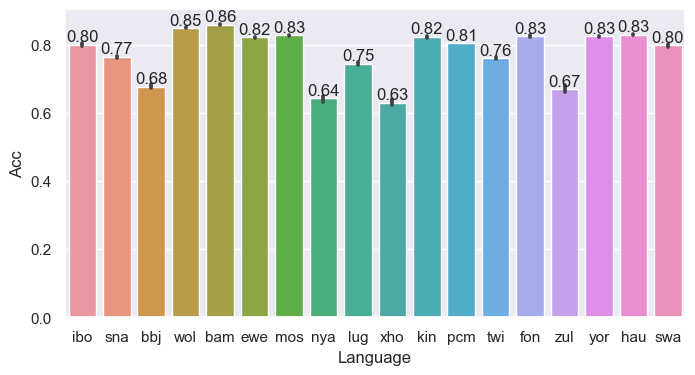

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ress = result_df.reset_index().rename(columns={"level_0":  "Language", "level_1": "Metric", "weighted avg": "Acc"})
ress = ress.drop_duplicates()
sns.set()

plt.figure(figsize=(8, 4))
ax = sns.barplot(ress[ress.Metric != 'support'], x="Language", y="Acc")
plt.bar_label(ax.containers[0], fmt='%.2f');

In [ ]:
from utils import get_tokenizer_training_corpus

lang = 'ewe'
data_dir = os.path.join(DATA_DIR, lang)
data = [" ".join(s) for s in get_tokenizer_training_corpus(data_dir)]
data

['CEMAC : Dukplɔla siwo le hatsotso sia me wɔ ɖoɖo ku ɖe nutoame ƒe ganyawo ŋu le tsɔme .',
 'Dukplɔla kple dudɔnunɔla tatɔ siwo le Titina Afrika duwo ƒe Ƒuƒoƒo hena Gadzimɔnunyawo ( CEMAC ) me do go nyitsɔ kuɖagbe le aɖaŋuɖemɔtakpekpe aɖe me .',
 'Gododoa ƒe tanyagãe nye : Tamebubu du siwo siwo le hatsotsoa me la ƒe ganyawo ŋu .',
 'CAN 2022 : Asamoah Gyan le Maroc vɔm .',
 'Ghana bɔlƒola xɔŋkɔa , Asamoah Gyan ƒo nu hã kuɖe tsatsiã si wowɔ hena ƒuƒoƒomenɔnɔ le CAN 2022 me eye wotrɔ ŋku tɔxɛ ɖe ƒuƒoƒo si wokpɔ be eyae nye sesẽtɔ wu la ŋu .',
 "CAN 2022 : Samuel Eto'o ƒo nu ku ɖe Cameroun ƒe dzɔgbe nyuiwo ŋu .",
 'Cameroun sie nye du si le CAN 2022 ƒe zime la , le ƒuƒoƒo me kple Burkina , Ethiopie kpakple Cap .',
 'Ƒoƒoƒo sia , Dzata ( Lions ) ate ŋu kpe edzi faa .',
 "Gake , Samuel Eto'o be naneke mekpɔ dzɔ haɖe ke o .",
 'Burkina Faso dziɖuɖua ɖee ɖe go be wowu hlɔ̃dola 58 aɖewo le aʋahoho ɖe wo ŋu le Arbinda kple Gorgadji dome , wɔna sia na ame gbɔlo kple Kpeɖeŋunala kpakple gbad

In [ ]:
model.predict(data[1])

['VERB',
 'VERB',
 'VERB',
 'PROPN',
 'VERB',
 'VERB',
 'VERB',
 'AUX',
 'VERB',
 'VERB',
 'ADJ',
 'PROPN',
 'VERB',
 'VERB',
 'PROPN',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'PUNCT',
 'NOUN',
 'ADV']